Aleksandra Bednarczuk

# Survey on Municipal Services of Barcelona's City

Source of the data: 

https://opendata-ajuntament.barcelona.cat/data/en/dataset/esm-bcn-evo

https://opendata-ajuntament.barcelona.cat/doc/BackOff_DescCompDefCamps/EnquestaServeisMunicipals_BCN/2019_Any/2019_r19006_ESM_Questionari_v1_0.pdf

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 1.1. Reading the data

In [2]:
survey = pd.read_csv('../data/survey/2019_r19006_esm_evolucio_bdd_v1_0/2019_r19006_esm_evolucio_bdd_v1_0.csv', low_memory=False)

In [3]:
survey.head()

,Unnamed: 0,ID,ANY,NOM_DISTRICTE,NOM_BARRI,DATA_ENQ,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,RES_HAB,PADRO,...,DEM_BARRI_N1,CONSULTA_DIARI_Q01_N1,CONSULTA_DIARI_Q02_N1,VEURE_TELE_Q01_N1,VEURE_TELE_Q02_N1,VEURE_TELE_Q03_N1,HAB_COTXE_PART_1A4,US30D_XARXES_Q06,US30D_XARXES_Q07,PMI_1A3_2017
0,1,198900001,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN
1,2,198900002,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ALTRES,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
2,3,198900003,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
3,4,198900004,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,EL PERIÓDICO,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
4,5,198900005,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN


In [4]:
del survey['Unnamed: 0']

In [5]:
survey.shape

(135813, 285)

In [6]:
for i in survey.columns.tolist():
    print(i, survey[i].unique(), "\n")

ID [198900001 198900002 198900003 ... 201907061 201907062 201907063] 

ANY [1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019] 

NOM_DISTRICTE ['CIUTAT VELLA' 'SANT MARTÍ' 'EIXAMPLE' 'SANTS - MONTJUÏC' 'LES CORTS'
 'SARRIÀ - SANT GERVASI' 'GRÀCIA' 'HORTA - GUINARDÓ' 'NOU BARRIS'
 'SANT ANDREU'] 

NOM_BARRI [nan 'EL RAVAL' 'EL BARRI GÒTIC' 'LA BARCELONETA'
 'SANT PERE, SANTA CATERINA I LA RIBERA' 'EL FORT PIENC'
 'LA SAGRADA FAMÍLIA' "LA DRETA DE L'EIXAMPLE"
 "L'ANTIGA ESQUERRA DE L'EIXAMPLE" "LA NOVA ESQUERRA DE L'EIXAMPLE"
 'SANT ANTONI' 'EL POBLE SEC' 'LA MARINA DEL PRAT VERMELL'
 'LA MARINA DE PORT' 'LA FONT DE LA GUATLLA' 'HOSTAFRANCS' 'LA BORDETA'
 'SANTS-BADAL' 'SANTS' 'LES CORTS' 'LA MATERNITAT I SANT RAMON'
 'PEDRALBES' 'VALLVIDRERA, EL TIBIDABO I LES PLANES' 'SARRIÀ'
 'LES TRES TORRES' 'SANT GERVASI-LA BONANOVA' 'EL PUTXET I EL FARRÓ'
 'SANT GERVASI-GALVANY' 'VALLCARCA I 

VAL_ENLLUM ['6' '10 = EXCEL·LENT GESTIÓ' '5' '7' '8' '4' '0 = PÈSSIMA GESTIÓ' '1' '2'
 '9' 'NO HO SAP' '3' 'NO CONTESTA' nan] 

VAL_URBA ['4' '6' '5' '7' '0 = PÈSSIMA GESTIÓ' '2' '3' '1' '8' 'NO HO SAP'
 '10 = EXCEL·LENT GESTIÓ' '9' 'NO CONTESTA' nan] 

VAL_ASFALT ['6' '10 = EXCEL·LENT GESTIÓ' '7' '8' '4' '0 = PÈSSIMA GESTIÓ' '3' '1' '5'
 '2' '9' 'NO HO SAP' 'NO CONTESTA' nan] 

VAL_FACANES [nan '5' '3' '6' '7' '4' '10 = EXCEL·LENT GESTIÓ' '0 = PÈSSIMA GESTIÓ' '2'
 '8' '9' 'NO HO SAP' '1' 'NO CONTESTA'] 

VAL_CIRCUL ['0 = PÈSSIMA GESTIÓ' '3' '1' '4' '5' '6' '2' '7' '8' 'NO HO SAP'
 '10 = EXCEL·LENT GESTIÓ' '9' 'NO CONTESTA' nan] 

VAL_APARCA ['0 = PÈSSIMA GESTIÓ' '3' '1' '5' '4' '2' '9' '7' '8' 'NO HO SAP' '6'
 '10 = EXCEL·LENT GESTIÓ' 'NO CONTESTA' nan] 

VAL_BUS ['7' '5' '8' '4' '2' '9' '6' '10 = EXCEL·LENT GESTIÓ' '3'
 '0 = PÈSSIMA GESTIÓ' 'NO HO SAP' '1' 'NO CONTESTA' nan] 

VAL_METRO ['7' '5' '9' '8' '6' '2' 'NO HO SAP' '10 = EXCEL·LENT GESTIÓ' '3' '4'
 '0 = PÈSSIMA GESTIÓ' '1' 'N

HAB_INTERNET [nan 'NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP' 'NO VOL / NO NECESSITA'
 "NO S'HO POT PERMETRE"] 

HAB_TV [nan 'SÍ' 'NO VOL / NO NECESSITA' "NO S'HO POT PERMETRE" 'NO CONTESTA'] 

HAB_PLATPAG [nan 'NO VOL / NO NECESSITA' "NO S'HO POT PERMETRE" 'SÍ' 'NO CONTESTA'
 'NO HO SAP'] 

HAB_RENTAPLATS ['NO' 'SÍ' 'NO CONTESTA' nan 'NO HO SAP' 'NO VOL / NO NECESSITA'
 "NO S'HO POT PERMETRE"] 

HAB_RENTADORA [nan 'SÍ' 'NO VOL / NO NECESSITA' "NO S'HO POT PERMETRE" 'NO CONTESTA'] 

HAB_COTXE_PART ['NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP' 'NO VOL / NO NECESSITA'
 "NO S'HO POT PERMETRE"] 

LLAR_MUTUA [nan 'NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP' "NO S'HO POT PERMETRE"
 'NO VOL / NO NECESSITA'] 

HAB_TREBDOM [nan "NO S'HO POT PERMETRE" 'NO CONTESTA' 'NO VOL / NO NECESSITA' 'SÍ'] 

PMS_VACANCES [nan 'NO' 'NO HO SAP' 'SÍ' 'NO CONTESTA'] 

PMS_ALIM [nan 'SÍ' 'NO' 'NO CONTESTA' 'NO HO SAP'] 

PMS_IMPREVIST650 [nan 'NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP'] 

PMS_ENERGIA [nan 'SÍ' 'NO' 'NO HO SAP' 'NO CONTESTA'] 

H

CLASSESOC_ENT [nan 'CLASSE MITJANA-MITJANA' 'CLASSE MITJANA-BAIXA' 'CLASSE BAIXA'
 'NO HO SAP' 'CLASSE MITJANA-ALTA' 'CLASSE ALTA' 'NO CONTESTA'] 

FREQ_CONSULTA_PREMSA_1A5 ['MAI' 'DE TANT EN TANT' 'CADA DIA' 'GAIREBÉ MAI' 'NO CONTESTA' nan
 'NOMÉS ELS CAPS DE SETMANA' 'NO HO SAP'] 

CONSULTA_DIARI_Q01 [nan 'ALTRES' 'EL PERIÓDICO (EN CASTELLÀ)' 'LA VANGUARDIA (EN CASTELLÀ)'
 'EL PUNT AVUI' 'DIARIS ESPORTIUS' 'EL PAÍS' 'DIARIS COMARCALS/LOCALS'
 'NO CONTESTA' 'NO HO SAP' 'ABC' 'EL MUNDO' 'EL PERIÓDICO (EN CATALÀ)'
 'DIARI PAPER GRATUÏT (20 MINUTOS)' 'LA RAZÓN' 'DIARIS INTERNACIONALS'
 'PÚBLICO' 'DIARIS ECONÒMICS' 'ARA' 'LA VANGUARDIA (EN CATALÀ)'
 'DIARIS DIGITALS PURS' 'ALTRES DIARIS INTERNACIONALS' 'ELDIARIO.ES'
 'SPORT' 'ALTRES ESPORTIUS' "ALTRES D'INFORMACIÓ GENERAL DIGITALS PURS"
 'VILAWEB' 'AS' 'ELNACIONAL.CAT' 'THE GUARDIAN' 'LE MONDE' 'MARCA '
 'DIRECTE.CAT' 'EL MUNDO DEPORTIVO' 'CONFIDENCIAL' 'NEW YORK TIMES'
 'EXPANSIÓN' 'NACIÓ DIGITAL' 'EL ECONOMISTA' 'ALTRES ECONÒMICS'
 'E-N

CAST_ENTEN [nan 'SÍ' 'NO'] 

CAST_PARLA [nan 'SÍ' 'NO'] 

CAST_ESCRIU [nan 'SÍ' 'NO' 'NO CONTESTA'] 

ANGLES_ENTEN [nan 'SÍ' 'NO' 'NO CONTESTA'] 

ANGLES_PARLA [nan 'SÍ' 'NO' 'NO CONTESTA'] 

ANGLES_ESCRIU [nan 'SÍ' 'NO' 'NO CONTESTA'] 

ESTUDIS_1A6 ['OBLIGATORIS' 'NO HA ACABAT ELS ESTUDIS OBLIGATORIS'
 'BAT.SUP. BUP,FP2,COU,MP2,MP3' 'BAT.ELE. EGB,FP1,ESO' 'UNIVERSITARIS'
 'NO CONTESTA' 'SECUNDARIS GENERALS' 'SECUNDARIS PROFESSIONALS'
 'POST UNIVERSITARIS'] 

U4S_POE [nan 'SÍ' 'NO' 'NO CONTESTA'] 

PMI_1A3 [nan 'SÍ' 'NO' 'AMB UNA ALTRA PERSONA A PARTS IGUALS'] 

PROF_ACT_A [nan 'MÉS DE 3 TREBALLADORS' 'NO CONTESTA'
 'NO TÉ TREBALLADORS, ÉS AUTÒNOM' "D'1 A 3 TREBALLADORS"] 

PROF_ACT_B [nan "EMPLEAT ADMINISTRATIU D'OFICINA, SERVEIS, COMERCIALS"
 'TREBALLADORS DE RESTAURACIÓ, COMERÇ, SERVEIS PERSONALS, SEGURETAT'
 'PROFESSIONAL / TÈCNIC / COMANDAMENT INTERMEDI'
 'TREBALLADOR/OBRER INDÚSTRIA I CONSTRUCCIÓ' 'DIRECTIU / GERENT'
 'NO CONTESTA'] 

BCN_TREB [nan 'SÍ' 'NO' 'NO CONTESTA'] 

DIST

PROF_ACT [nan 'PROFESSIONAL / TÈCNIC / COMANDAMENT INTERMEDI'
 'TREBALLADOR/OBRER INDÚSTRIA I CONSTRUCCIÓ'
 'TREBALLADORS DE RESTAURACIÓ, COMERÇ, SERVEIS PERSONALS, SEGURETAT'
 'AUTÒNOM / EMPRESARI AMB 3 O MENYS TREBALLADORS'
 "EMPLEAT ADMINISTRATIU D'OFICINA, SERVEIS, COMERCIALS" 'NO CONTESTA'
 'DIRECTIU / GERENT / EMPRESARI AMB MÉS DE 3 TREBALLADORS'] 

BCN_TREB_1A4 [nan 'TREBALLA A BARCELONA A UN DISTRICTE DIFERENT AL DE RESIDÈNCIA'
 'TREBALLA A BARCELONA AL MATEIX DISTRICTE DE RESIDÈNCIA'
 'TREBALLA FORA DE BARCELONA' 'NO CONTESTA'
 'TREBALLA A BARCELONA PERÒ NO ESPECIFICA DISTRICTE'] 

PROF_ABANS [nan 'TREBALLADORS DE RESTAURACIÓ, COMERÇ, SERVEIS PERSONALS, SEGURETAT'
 'NO HA TREBALLAT MAI' 'TREBALLADOR/OBRER INDÚSTRIA I CONSTRUCCIÓ'
 'AUTÒNOM / EMPRESARI AMB 3 O MENYS TREBALLADORS'
 "EMPLEAT ADMINISTRATIU D'OFICINA, SERVEIS, COMERCIALS"
 'PROFESSIONAL / TÈCNIC / COMANDAMENT INTERMEDI'
 'DIRECTIU / GERENT / EMPRESARI AMB MÉS DE 3 TREBALLADORS' 'NO CONTESTA'] 

HAB_RES_1A4 ['QUATRE

HAB_COTXE_PART_1A4 ['CAP' 'UN' 'DOS' 'NS/NC' 'TRES' 'QUATRE O MÉS' nan] 

US30D_XARXES_Q06 [nan 'ALTRES XARXES' 'ALTRES NO XARXES' 'INSTAGRAM' 'GOOGLEPLUS'
 'PINTEREST' 'LINKEDIN'] 

US30D_XARXES_Q07 [nan 'PINTEREST'] 

PMI_1A3_2017 [nan 'ENTREVISTAT/ADA' 'UNA ALTRA PERSONA DE LA LLAR'
 'UNA ALTRA PERSONA DE FORA DE LA LLAR'] 



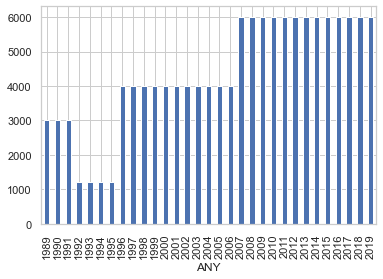

In [7]:
survey.groupby(['ANY']).size().plot.bar()

The sample size has varied over time: from 1989 to 1991 it included 3,000 interviews, from 1992 to 1995 - 1,200, from 1996 to 2006 - 4,000, and since 2007 it includes 6,000 interviews. The dataset is limited to most recent version of the survey, starting from 2007.

In [8]:
survey = survey.query('ANY >= 2007')

In [9]:
survey.shape

(78013, 285)

In [10]:
# survey.query('ANY == 2019 and EDAT1899_1A6 == "DE 65 ANYS I MÉS"').groupby(['TRANSP_MOU']).size()

In [11]:
# survey.query('ANY == 2019 and EDAT1899_1A6 == "DE 65 ANYS I MÉS"').groupby(['PROB_BCN_N1']).size()

# 1.2. Subsetting the DataFrame to only relevant columns (survey questions)

In [12]:
# Reading questions dataset with a flag indicating if the question is relevant for further analysis
questions = pd.read_excel('../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Preguntes_v1_0.xlsx')

In [13]:
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
0,ID,0,IDENTIFICADOR DE L'ENQUESTA,SURVEY IDENTIFIER,numeric
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
3,NOM_BARRI,0,BARRI,BARRI,factor
4,GRANBARRI,0,GRAN BARRI,GRAN BARRI,factor


In [14]:
questions.shape

(285, 5)

In [15]:
# Filtering out unnecessary questions
questions = questions.query('Flag == 1')
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
6,SEXE,1,SEXE,SEX,factor
7,EDAT1899_1A6,1,TRAMS D'EDAT,AGE,factor
8,NACIO_ACT_UE,1,NACIONALITAT ACTUAL - AGRUPADA,WHAT IS YOUR NATIONALITY?,factor


In [16]:
questions.shape

(68, 5)

In [17]:
# Dictionary with Catalan and Spanish names/descriptions of questions
df = questions[['Nom_variable', 'Question']]
questions_dict = {}
for i in range(len(df)):
    questions_dict[df.iloc[i].Nom_variable] = df.iloc[i].Question
questions_dict

{'ANY': 'SURVEY YEAR',
 'NOM_DISTRICTE': 'DISTRICT',
 'SEXE': 'SEX',
 'EDAT1899_1A6': 'AGE',
 'NACIO_ACT_UE': 'WHAT IS YOUR NATIONALITY?',
 'SITLABORAL': 'WHAT IS YOUR WORK SITUATION?',
 'TMP_RES_BCN_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?',
 'TMP_RES_BARRI_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?',
 'EVO1A_BCN': 'DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?',
 'FUTUR_BCN': 'FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR WORSEN?',
 'SATISF_RES_BCN_0A10': 'ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?',
 'PROB_BCN_N1': 'COULD YOU TELL ME WHAT IS THE MOST SERIOUS PROBLEM THE CITY OF BARCELONA HAS AT THE MOMENT? - GROUPED',
 'PROB_PERS_N1': 'WHAT IS THE PROBLEM THAT AFFECTS YOU THE MOST? - GROUPED',
 'VAL_GESTMUNI': 'ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY

In [18]:
relevant_questions = list(questions.Nom_variable.unique())

In [19]:
# Filtering the table by choosing only those questions which are relevant for further analysis
survey = survey[relevant_questions]

Potentially relevant variables were preliminary chosen based on the survey questionnaire and metadata with questions available on the Open Data BCN website. Below, the number of NA values for each question marked as "relevant" is being calculated. This way it is checked if questions marked as relevant were used during the whole period of analysis or if they were introduced in the recent editions of the survey. It is being done in order to avoid variables with too many NA values.

In [20]:
temp_dict = {}
temp_dict['Questions'] = survey.columns.tolist()
for year in range(2007,2020):
    temp_list = []
    #print(year)
    df = survey.query('ANY >= @year')
    for i in survey.columns.tolist():
        temp_list.append(df[i].isna().sum())
    temp_dict[year] = temp_list

In [21]:
count_nans = pd.DataFrame.from_dict(temp_dict).set_index('Questions')

In [22]:
count_nans = count_nans.loc[count_nans.index.isin(questions.Nom_variable)]

In [23]:
count_nans[(count_nans.T != 0).any()]

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Questions,,,,,,,,,,,,,
VAL_SOROLL,6000,0,0,0,0,0,0,0,0,0,0,0,0
VAL_TRAM,60013,54013,48000,42000,36000,30000,24000,18000,12000,6000,0,0,0
VAL_BICING,6000,0,0,0,0,0,0,0,0,0,0,0,0
VAL_SPEIS,66013,60013,54000,48000,42000,36000,30000,24000,18000,12000,6000,0,0
VAL_CC,42013,36013,30000,24000,18000,12000,6000,0,0,0,0,0,0
US_ASSOCIA_BARRI,66013,60013,54000,48000,42000,36000,30000,24000,18000,12000,6000,0,0
HAB_TREBDOM,66013,60013,54000,48000,42000,36000,30000,24000,18000,12000,6000,0,0
HAB_REGIM_1A5,66013,60013,54000,48000,42000,36000,30000,24000,18000,12000,6000,0,0
PROB_LLAR_ECON_1A6,66013,60013,54000,48000,42000,36000,30000,24000,18000,12000,6000,0,0


In [24]:
count_nans[(count_nans.T != 0).any()].shape

(11, 13)

11 out of 68 questions marked as relevant have some NA values during the period of analysis. According to literature review, variables describing health might be relevant determinants of residentail satisfaction and willingness to move. The dataset does not have explicit question about health status of the citizens, however it asks about recognized disability of interviewee or his/her family. We will treat this variable as health status description. That is why we need to use only the 2019 edition of the survey, as it is the first year when the questions about disability were used.

In [25]:
survey = survey.query('ANY == 2019').dropna(axis='columns')

In [26]:
survey.head()

,ANY,NOM_DISTRICTE,SEXE,EDAT1899_1A6,NACIO_ACT_UE,SITLABORAL,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,FUTUR_BCN,...,PROB_LLAR_ECON_1A6,CLASSESOC_ENT,SENTPERTI,LLOC_NAIX_1A4,LLENGUA_HAB,ESTUDIS_1A6,RESUM_PARENTIU,HAB_RES_1A4,TE_CERT_DISCAP,HAB_CERT_DISC
129813,2019,SANTS - MONTJUÏC,HOME,DE 25 A 34 ANYS,ESPANYOLA,ESTUDIANT,MÉS DE 2 ANYS I FINS A 5 ANYS,MÉS DE 2 ANYS I FINS A 5 ANYS,HA EMPITJORAT,EMPITJORARÀ,...,AMB CERTA DIFICULTAT,CLASSE MITJANA-BAIXA,ÚNICAMENT CATALÀ,RESTA D'ESPANYA,CASTELLÀ,UNIVERSITARIS,ALTRES SITUACIONS,TRES,NO,NO
129814,2019,SANTS - MONTJUÏC,HOME,DE 35 A 44 ANYS,RESTA PAÏSOS,ATURAT/ADA / BUSCA FEINA,MÉS DE 10 ANYS,MÉS DE 5 ANYS I FINS A 10 ANYS,HA EMPITJORAT,MILLORARÀ,...,AMB CERTA DIFICULTAT,CLASSE MITJANA-BAIXA,TAN ESPANYOL COM CATALÀ,ESTRANGER,CASTELLÀ,POST UNIVERSITARIS,PARELLA AMB FILLS,QUATRE O MÉS,NO CONTESTA,NO
129815,2019,SANTS - MONTJUÏC,HOME,DE 35 A 44 ANYS,ESPANYOLA,TREBALLA PER COMPTE D'ALTRI (ASSALARIAT/ADA),SEMPRE HA VISCUT A LA CIUTAT,MÉS DE 5 ANYS I FINS A 10 ANYS,HA MILLORAT,MILLORARÀ,...,AMB MOLTA DIFICULTAT,CLASSE MITJANA-BAIXA,TAN ESPANYOL COM CATALÀ,BARCELONA CIUTAT,CATALÀ,SECUNDARIS GENERALS,PERSONA SOLA,UNA,NO,NO
129816,2019,SANTS - MONTJUÏC,HOME,DE 65 ANYS I MÉS,ESPANYOLA,JUBILAT/ADA / PENSIONISTA / INCAPACITAT/ADA LA...,MÉS DE 10 ANYS,MÉS DE 10 ANYS,ESTÀ IGUAL,CONTINUARÀ IGUAL,...,AMB FACILITAT,CLASSE MITJANA-MITJANA,ÚNICAMENT CATALÀ,ESTRANGER,CATALÀ,SECUNDARIS GENERALS,PARELLA SOLA,DUES,NO,NO
129817,2019,SANTS - MONTJUÏC,HOME,DE 35 A 44 ANYS,ESPANYOLA,"TREBALLA PER COMPTE PROPI (EMPRESARI, AUTÒNOM)",SEMPRE HA VISCUT A LA CIUTAT,MÉS DE 5 ANYS I FINS A 10 ANYS,HA EMPITJORAT,MILLORARÀ,...,AMB CERTA FACILITAT,CLASSE MITJANA-BAIXA,TAN ESPANYOL COM CATALÀ,BARCELONA CIUTAT,CATALÀ,POST UNIVERSITARIS,PARELLA SOLA,DUES,NO,NO


In [27]:
survey.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'SITLABORAL',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'PROB_BCN_N1',
 'PROB_PERS_N1',
 'VAL_GESTMUNI',
 'DEM_BCN_MUNI_N1',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'TRANSP_MOU',
 'VAL_TRANSP_1A5',
 'VAL_TRANSP_BARRI_1A5',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_0A10',
 'PROB_BARRI_N1',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI',
 'DEM_BARRI_N1',
 'US_ASSOCIA_BARRI',
 'HAB_COTXE_PART',
 'HAB_TREBDOM',
 'HAB_REGIM_1A5',
 'HAB_M2_1A14',
 'LLAR_INGRESSOS_1A10',
 'PROB_LLAR_ECON_1A6',
 'CLASSESOC_ENT',
 'SENTP

Now the dataset includes 68 variables.

In [28]:
# Reading responses dataset with a flag indicating if the response relates to the question
# which was tagged as relevant for further analysis or not
responses = pd.read_excel('../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Respostes_v1_0.xlsx')

In [29]:
responses.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [30]:
responses.shape

(4529, 4)

In [31]:
responses = responses.query('Flag == 1')
responses.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [32]:
responses.shape

(859, 4)

# 1.3. Translating the data from Catalan to English

As the survey was conducted in Catalan or Spanish and the answers are recorded in Catalan it needs to be translated into English for better understanding of the responses. The survey was initially translated on metadata tables with questions (*Preguntas*) and answers (*Respostes*). Below, I create a dictionary *translating_responses* with question name (*Nom_variable*) as a key and *temp_dict* as a value. *Temp_dict* is a nested dictionary, with Catalan answer as a key and English translation of this answer as a value.

In [33]:
translating_responses = {}
for i in responses.Nom_variable.unique():
    temp_dict = {}
    temp_dict[str(np.nan)] = np.nan
    df = responses.query('Nom_variable == @i')
    for j in range(len(df)):
        temp_dict[str(df.iloc[j].Resposta)] = df.iloc[j].Answer
    translating_responses[i] = temp_dict

In [34]:
survey['VAL_BUS'].unique()

array(['7', '9', '8', 'NO HO SAP', '6', '10 = EXCEL·LENT GESTIÓ', '5',
       '0 = PÈSSIMA GESTIÓ', '4', '3', '1', '2', 'NO CONTESTA'],
      dtype=object)

In [35]:
translating_responses['VAL_BUS']

{'nan': nan,
 '0 = PÈSSIMA GESTIÓ': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10 = EXCEL·LENT GESTIÓ': 10,
 'NO HO SAP': "I DON'T KNOW",
 'NO CONTESTA': 'NO ANSWER'}

In [36]:
# Using a for loop, the survey is being translated by replacing Catalan version of an answer
# with its English translation using translating_answers dictionary created above.
for column in [i for i in list(survey.columns) if i not in ["ANY", "COST_LLOGUER_NRE", "COST_ESPAI_NRE"]]:
    translate = translating_responses[column]
    for i in survey[column].unique():
        survey[column].replace(i, translate[str(i)], inplace=True)

In [37]:
survey['VAL_BUS'].unique()

array([7, 9, 8, "I DON'T KNOW", 6, 10, 5, 0, 4, 3, 1, 2, 'NO ANSWER'],
      dtype=object)

In [38]:
survey.head()

,ANY,NOM_DISTRICTE,SEXE,EDAT1899_1A6,NACIO_ACT_UE,SITLABORAL,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,FUTUR_BCN,...,PROB_LLAR_ECON_1A6,CLASSESOC_ENT,SENTPERTI,LLOC_NAIX_1A4,LLENGUA_HAB,ESTUDIS_1A6,RESUM_PARENTIU,HAB_RES_1A4,TE_CERT_DISCAP,HAB_CERT_DISC
129813,2019,SANTS - MONTJUÏC,MAN,FROM 25 TO 34 YEARS,SPANISH,STUDENT,MORE THAN 2 YEARS AND UP TO 5 YEARS,MORE THAN 2 YEARS AND UP TO 5 YEARS,IT HAS WORSENED,IT WILL WORSEN,...,WITH SOME DIFFICULTY,MIDDLE-LOW CLASS,ONLY CATALAN,REST OF SPAIN,SPANISH,UNIVERSITY,OTHER SITUATIONS,THREE,NO,NO
129814,2019,SANTS - MONTJUÏC,MAN,FROM 35 TO 44 YEARS,REMAINING COUNTRIES,UNEMPLOYED / LOOKING FOR WORK,MORE THAN 10 YEARS,MORE THAN 5 YEARS AND UP TO 10 YEARS,IT HAS WORSENED,IT WILL IMPROVE,...,WITH SOME DIFFICULTY,MIDDLE-LOW CLASS,"HALF SPANISH, HALF CATALAN",FOREIGN,SPANISH,POST UNIVERSITY,COUPLE WITH CHILDREN,FOUR OR MORE,NO ANSWER,NO
129815,2019,SANTS - MONTJUÏC,MAN,FROM 35 TO 44 YEARS,SPANISH,WORK FOR OTHERS,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 5 YEARS AND UP TO 10 YEARS,IT HAS IMPROVED,IT WILL IMPROVE,...,WITH A LOT OF DIFFICULTY,MIDDLE-LOW CLASS,"HALF SPANISH, HALF CATALAN",BARCELONA CITY,CATALAN,GENERAL SECONDARY,SINGLE,ONE,NO,NO
129816,2019,SANTS - MONTJUÏC,MAN,65 YEARS AND OVER,SPANISH,RETIREMENT / PENSIONER / WORK DISABILITY,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT'S THE SAME,IT WILL STAY THE SAME,...,EASILY,MIDDLE-MIDDLE CLASS,ONLY CATALAN,FOREIGN,CATALAN,GENERAL SECONDARY,COUPLE WITH NO CHILDREN,TWO,NO,NO
129817,2019,SANTS - MONTJUÏC,MAN,FROM 35 TO 44 YEARS,SPANISH,SELF-EMPLOYED,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 5 YEARS AND UP TO 10 YEARS,IT HAS WORSENED,IT WILL IMPROVE,...,RELATIVELY EASILY,MIDDLE-LOW CLASS,"HALF SPANISH, HALF CATALAN",BARCELONA CITY,CATALAN,POST UNIVERSITY,COUPLE WITH NO CHILDREN,TWO,NO,NO


# 1.4. Subsetting the data to responses of people aged 65+ 

In [39]:
survey.shape

(6000, 68)

In [40]:
survey.groupby(['EDAT1899_1A6']).size()

EDAT1899_1A6
65 YEARS AND OVER      1482
FROM 18 TO 24 YEARS     475
FROM 25 TO 34 YEARS    1037
FROM 35 TO 44 YEARS    1148
FROM 45 TO 54 YEARS    1015
FROM 55 TO 64 YEARS     843
dtype: int64

In [41]:
round(survey.groupby(['EDAT1899_1A6']).size() / survey.groupby(['EDAT1899_1A6']).size().sum() * 100,2)

EDAT1899_1A6
65 YEARS AND OVER      24.70
FROM 18 TO 24 YEARS     7.92
FROM 25 TO 34 YEARS    17.28
FROM 35 TO 44 YEARS    19.13
FROM 45 TO 54 YEARS    16.92
FROM 55 TO 64 YEARS    14.05
dtype: float64

In [42]:
# survey_65 = survey.query('EDAT1899_1A6 == "65 YEARS AND OVER"')
survey_65 = survey.copy()

In [43]:
survey_65.shape

(6000, 68)

In [44]:
# Creating a copy of the data subset for further data preparation and features generation
data = survey_65.copy()

In [45]:
survey_65.shape, data.shape

((6000, 68), (6000, 68))

# 1.5. Data preparation

Below, number of functions is defined and used to perform basic exploratory data analysis of each variable. It has functions for calculating numeric and percentage distribution of responses, displaying crosstab of independent variables levels vs dependent variable levels, as well as printing distribution plots. 

In [46]:
def size_num(var):
    return data.groupby([var]).size()

def size_pctg(var):
    return round(data.groupby([var]).size() / data.groupby([var]).size().sum() * 100,2)

def ctab(var):
    return pd.crosstab(data[var], data.Would_live_in_another_neighborhood)

def simple_plot(var):
    df = pd.DataFrame(data.groupby([var]).size()).reset_index().rename(columns= {var: 'x', 0: 'y'})
    if var != 'ANY' and var[:3] != 'VAL' and var[:3] != 'EVO' and var[:5] != 'FUTUR' and var[:6] != 'SATISF':
        df = df.sort_values(by='y', ascending=False)
    plt.figure(figsize=(12,4))
    plt.bar(df['x'].astype(str), df['y'])
    plt.xticks(rotation='vertical')
    for i in range(len(df)):
        plt.annotate(df['y'][i], xy=(str(df['x'][i]),df['y'][i]), ha='center', va='bottom')
    plt.show()

def grouped_plot(var):
    table = pd.crosstab(data[var], data.Would_live_in_another_neighborhood)
    return table.plot(kind='bar')

def stacked_plot(var):
    table = pd.crosstab(data[var], data.Would_live_in_another_neighborhood)
    return table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

## 1.5.1 Dependent variable

Survey question: IF YOU HAD THE POSSIBILITY AND THE RESOURCES TO CHANGE YOUR RESIDENCE, WHERE WOULD YOU LIVE?

In [47]:
y = 'CANVI_LLOC_RES_1A3'

In [48]:
size_num(y)

CANVI_LLOC_RES_1A3
I DON'T KNOW                                           71
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA    1047
I WOULD LIVE OUTSIDE BARCELONA                       1307
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         3574
NO ANSWER                                               1
dtype: int64

In [49]:
size_pctg(y)

CANVI_LLOC_RES_1A3
I DON'T KNOW                                          1.18
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA    17.45
I WOULD LIVE OUTSIDE BARCELONA                       21.78
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         59.57
NO ANSWER                                             0.02
dtype: float64

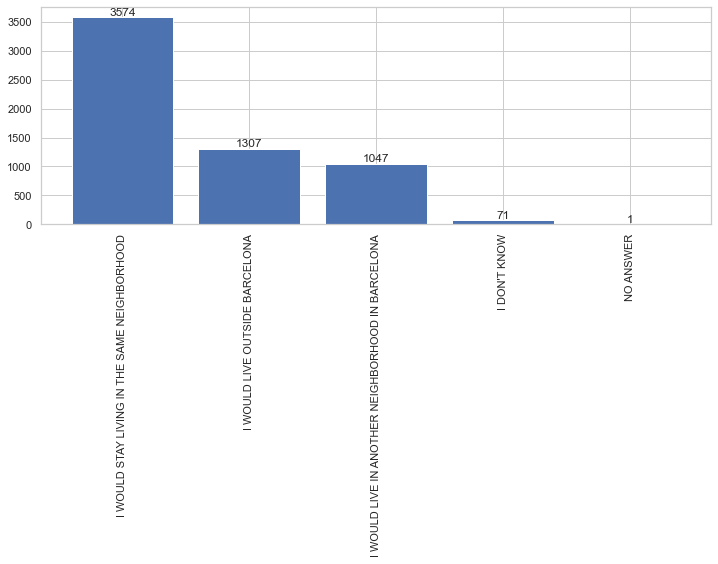

In [50]:
simple_plot(y)

In [51]:
data_prep = {'I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD': 0,
            'I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA': 1,
             'I WOULD LIVE OUTSIDE BARCELONA': np.nan,
             "I DON'T KNOW": np.nan,
             'NO ANSWER': np.nan
            }
data['Would_live_in_another_neighborhood'] = [data_prep[i] for i in data[y]]

In [53]:
count_stay = len(data[data['Would_live_in_another_neighborhood']==0])
count_move = len(data[data['Would_live_in_another_neighborhood']==1])
pct_of_stay = count_stay/(count_stay + count_move)
pct_of_move = count_move/(count_stay + count_move)

print("Number of people who would change their neighborhood or move out from the city:", count_move)
print("Number of people who would stay in their neighborhood:", count_stay)
print("Percentage of people who would change their neighborhood or move out from the city:", round(pct_of_move*100,2), '%')
print("Percentage of people who would stay in their neighborhood:", round(pct_of_stay*100,2), '%')

Number of people who would change their neighborhood or move out from the city: 1047
Number of people who would stay in their neighborhood: 3574
Percentage of people who would change their neighborhood or move out from the city: 22.66 %
Percentage of people who would stay in their neighborhood: 77.34 %


## 1.5.2 Independent variables

First insight into the dataset using cross tabulation of dependent variable and different features:

In [54]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'SITLABORAL',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'PROB_BCN_N1',
 'PROB_PERS_N1',
 'VAL_GESTMUNI',
 'DEM_BCN_MUNI_N1',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'TRANSP_MOU',
 'VAL_TRANSP_1A5',
 'VAL_TRANSP_BARRI_1A5',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_0A10',
 'PROB_BARRI_N1',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI',
 'DEM_BARRI_N1',
 'US_ASSOCIA_BARRI',
 'HAB_COTXE_PART',
 'HAB_TREBDOM',
 'HAB_REGIM_1A5',
 'HAB_M2_1A14',
 'LLAR_INGRESSOS_1A10',
 'PROB_LLAR_ECON_1A6',
 'CLASSESOC_ENT',
 'SENTP

In [55]:
for i in data.columns.tolist():
    display(ctab(i))

Would_live_in_another_neighborhood,0.0,1.0
ANY,,
2019,3574,1047


Would_live_in_another_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,336,155
EIXAMPLE,607,131
GRÀCIA,297,58
HORTA - GUINARDÓ,344,122
LES CORTS,301,41
NOU BARRIS,303,139
SANT ANDREU,260,102
SANT MARTÍ,455,138
SANTS - MONTJUÏC,334,119


Would_live_in_another_neighborhood,0.0,1.0
SEXE,,
MAN,1650,468
WOMAN,1924,579


Would_live_in_another_neighborhood,0.0,1.0
EDAT1899_1A6,,
65 YEARS AND OVER,1065,164
FROM 18 TO 24 YEARS,249,124
FROM 25 TO 34 YEARS,532,272
FROM 35 TO 44 YEARS,656,220
FROM 45 TO 54 YEARS,576,164
FROM 55 TO 64 YEARS,496,103


Would_live_in_another_neighborhood,0.0,1.0
NACIO_ACT_UE,,
OTHER EU,250,116
REMAINING COUNTRIES,465,190
SPANISH,2859,741


Would_live_in_another_neighborhood,0.0,1.0
SITLABORAL,,
HOMEWORK (NOT PAID),188,43
RETIREMENT / PENSIONER / WORK DISABILITY,1215,191
SELF-EMPLOYED,417,134
STUDENT,223,110
UNEMPLOYED / LOOKING FOR WORK,246,86
WORK FOR OTHERS,1285,483


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BCN_1A6,,
FROM 6 MONTHS TO 2 YEARS,262,123
I HAVE ALWAYS LIVED IN THE CITY,1375,365
MORE THAN 10 YEARS,1408,323
MORE THAN 2 YEARS AND UP TO 5 YEARS,289,140
MORE THAN 5 YEARS AND UP TO 10 YEARS,240,96


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,419,228
I HAVE ALWAYS LIVED IN THE BARRI,544,110
LESS THAN SIX MONTHS,102,66
MORE THAN 10 YEARS,1743,352
MORE THAN 2 YEARS AND UP TO 5 YEARS,405,188
MORE THAN 5 YEARS AND UP TO 10 YEARS,361,103


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,112,34
IT HAS IMPROVED,1219,357
IT HAS WORSENED,1523,463
IT'S THE SAME,716,192
NO ANSWER,4,1


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,477,89
IT WILL IMPROVE,2319,696
IT WILL STAY THE SAME,113,35
IT WILL WORSEN,659,226
NO ANSWER,6,1


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BCN_0A10,,
0,8,6
1,1,2
2,6,3
3,16,4
4,35,12
5,157,54
6,233,95
7,646,230
8,1157,333


Would_live_in_another_neighborhood,0.0,1.0
PROB_BCN_N1,,
ACCESS TO THE HOUSE,419,160
AUTONOMOUS POLITICAL MANAGEMENT,4,3
BENEFITS AND GRANTS,7,2
CIRCULATION / TRAFFIC,217,47
CITY MODEL,34,7
COMMERCE,42,9
CORRUPTION AND FRAUD,7,0
DRUGS,22,14
ECONOMIC PROBLEMS,73,23


Would_live_in_another_neighborhood,0.0,1.0
PROB_PERS_N1,,
ACCESS TO THE HOUSE,262,110
AUTONOMOUS POLITICAL MANAGEMENT,2,1
BENEFITS AND GRANTS,139,30
CIRCULATION / TRAFFIC,79,24
CITY MODEL,14,4
COMMERCE,7,2
CORRUPTION AND FRAUD,17,2
DRUGS,13,3
ECONOMIC PROBLEMS,192,64


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTMUNI,,
0,76,22
1,26,7
2,62,18
3,121,27
4,237,58
5,578,163
6,588,207
7,783,230
8,649,187


Would_live_in_another_neighborhood,0.0,1.0
DEM_BCN_MUNI_N1,,
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION,49,17
CHANGING THE CITY MODEL,94,40
CONTROLING / ELIMINATING CORRUPTION AND FRAUD,1,1
CONTROLING / ELIMINATING PROSTITUTION,1,0
ERADICATING THE DRUGS,10,6
EVERYTHING,3,0
FACILITATING ACCESS TO HOUSING,434,155
FIGHTING TERRORISM,2,0
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS,102,32


Would_live_in_another_neighborhood,0.0,1.0
VAL_ESCOMBRARIES,,
0,35,8
1,14,4
2,24,11
3,53,20
4,93,29
5,269,70
6,324,119
7,677,194
8,1094,322


Would_live_in_another_neighborhood,0.0,1.0
VAL_NETEJA,,
0,79,23
1,25,9
2,78,26
3,124,37
4,228,73
5,425,116
6,463,138
7,688,214
8,798,230


Would_live_in_another_neighborhood,0.0,1.0
VAL_SOROLL,,
0,106,39
1,38,18
2,121,33
3,183,68
4,322,120
5,600,144
6,497,151
7,577,194
8,594,142


Would_live_in_another_neighborhood,0.0,1.0
VAL_VERD,,
0,63,24
1,21,8
2,76,16
3,129,31
4,215,72
5,456,146
6,477,136
7,706,192
8,759,232


Would_live_in_another_neighborhood,0.0,1.0
VAL_ENLLUM,,
0,37,6
1,6,6
2,34,14
3,80,25
4,158,38
5,356,102
6,416,154
7,782,228
8,1016,260


Would_live_in_another_neighborhood,0.0,1.0
VAL_URBA,,
0,53,16
1,12,8
2,35,10
3,100,32
4,179,42
5,383,112
6,476,168
7,719,221
8,782,219


Would_live_in_another_neighborhood,0.0,1.0
VAL_ASFALT,,
0,75,24
1,23,5
2,59,21
3,129,30
4,270,59
5,494,155
6,505,158
7,767,210
8,725,222


Would_live_in_another_neighborhood,0.0,1.0
VAL_FACANES,,
0,38,14
1,11,7
2,33,15
3,58,17
4,122,35
5,450,120
6,511,164
7,800,238
8,787,215


Would_live_in_another_neighborhood,0.0,1.0
VAL_CIRCUL,,
0,117,24
1,36,13
2,131,28
3,262,77
4,409,128
5,608,182
6,614,178
7,556,178
8,427,128


Would_live_in_another_neighborhood,0.0,1.0
VAL_APARCA,,
0,317,92
1,93,41
2,257,66
3,385,119
4,516,150
5,540,157
6,369,108
7,249,72
8,200,45


Would_live_in_another_neighborhood,0.0,1.0
VAL_BUS,,
0,50,9
1,17,5
2,42,15
3,68,22
4,123,31
5,232,78
6,311,88
7,618,192
8,996,291


Would_live_in_another_neighborhood,0.0,1.0
VAL_METRO,,
0,15,12
1,7,4
2,16,6
3,31,14
4,72,34
5,186,70
6,337,121
7,698,192
8,1065,309


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRAM,,
0,16,4
1,3,0
2,10,4
3,14,6
4,22,15
5,126,41
6,177,70
7,364,105
8,517,155


Would_live_in_another_neighborhood,0.0,1.0
VAL_BICING,,
0,107,21
1,22,8
2,43,14
3,69,20
4,84,25
5,190,54
6,175,54
7,326,125
8,484,165


Would_live_in_another_neighborhood,0.0,1.0
VAL_GUB,,
0,112,31
1,24,15
2,79,29
3,124,45
4,195,61
5,425,149
6,444,118
7,621,172
8,561,167


Would_live_in_another_neighborhood,0.0,1.0
VAL_SPEIS,,
0,10,2
2,7,3
3,11,8
4,30,8
5,94,30
6,143,50
7,347,101
8,765,195
9,438,134


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR,,
0,137,31
1,48,22
2,138,55
3,255,70
4,421,129
5,580,143
6,534,179
7,554,155
8,474,137


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR_BARRI,,
0,129,50
1,36,26
2,110,41
3,203,66
4,329,118
5,470,151
6,440,130
7,574,166
8,679,151


Would_live_in_another_neighborhood,0.0,1.0
VAL_ESPORT,,
0,48,19
1,10,8
2,36,11
3,69,22
4,116,39
5,267,79
6,299,94
7,559,168
8,588,183


Would_live_in_another_neighborhood,0.0,1.0
VAL_SIAC,,
0,38,15
1,5,5
2,30,11
3,53,24
4,92,27
5,232,87
6,357,88
7,583,186
8,733,213


Would_live_in_another_neighborhood,0.0,1.0
VAL_CSS,,
0,45,22
1,6,6
2,28,6
3,37,23
4,85,25
5,174,70
6,191,78
7,378,86
8,473,124


Would_live_in_another_neighborhood,0.0,1.0
VAL_CULT,,
0,8,4
1,4,0
2,12,8
3,29,12
4,53,18
5,161,50
6,285,82
7,606,175
8,879,283


Would_live_in_another_neighborhood,0.0,1.0
VAL_FESTESPOP,,
0,25,11
1,4,2
2,25,8
3,46,11
4,79,38
5,222,42
6,304,109
7,638,205
8,889,255


Would_live_in_another_neighborhood,0.0,1.0
VAL_MERCAT,,
0,23,4
1,6,3
2,17,10
3,41,9
4,66,25
5,189,46
6,267,85
7,663,193
8,994,297


Would_live_in_another_neighborhood,0.0,1.0
VAL_BIBLIO,,
0,10,1
1,1,0
2,10,3
3,12,7
4,21,9
5,93,23
6,151,55
7,445,119
8,815,252


Would_live_in_another_neighborhood,0.0,1.0
VAL_CC,,
0,6,5
1,1,0
2,10,0
3,9,3
4,21,8
5,90,31
6,155,52
7,437,136
8,638,203


Would_live_in_another_neighborhood,0.0,1.0
TRANSP_MOU,,
BICYCLE,128,48
BICYCLE (BICING),102,41
BUS,1077,276
CAR,264,86
METRO / CATALAN RAILWAYS (FGC) URBAN,1238,434
MOTORCYCLE,260,83
OTHERS,11,2
SKATEBOARD / ELECTRIC SKATEBOARD,23,10
TAXI,59,5


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_1A5,,
I DON'T KNOW,32,3
LITTLE EQUIPPED,260,67
NO ANSWER,1,0
NORMAL,195,39
NOTHING EQUIPPED,9,5
PRETTY EQUIPPED,2003,572
VERY GIFTED,1074,361


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A5,,
I DON'T KNOW,12,3
LITTLE EQUIPPED,436,159
NORMAL,184,71
NOTHING EQUIPPED,41,20
PRETTY EQUIPPED,1831,493
VERY GIFTED,1070,301


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,93,55
IT HAS IMPROVED,1648,407
IT HAS WORSENED,759,321
IT'S THE SAME,1073,264
NO ANSWER,1,0


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,391,91
IT WILL IMPROVE,2383,666
IT WILL STAY THE SAME,296,76
IT WILL WORSEN,503,214
NO ANSWER,1,0


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BARRI_0A10,,
0,4,8
1,1,1
2,2,21
3,8,9
4,11,34
5,58,77
6,142,129
7,397,250
8,1179,307


Would_live_in_another_neighborhood,0.0,1.0
PROB_BARRI_N1,,
ACCESS TO THE HOUSE,258,60
BENEFITS AND GRANTS,2,1
CAMP NOU,11,4
CIRCULATION / TRAFFIC,106,18
CITY MODEL,57,15
COMMERCE,80,27
DRUGS,52,42
ECONOMIC PROBLEMS,21,11
EQUIPMENT AND SERVICES,86,25


Would_live_in_another_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,68,12
"NEITHER THE BEST, NOR THE WORST",865,466
NO ANSWER,1,2
ONE OF THE BEST,2544,379
ONE OF THE WORST,96,188


Would_live_in_another_neighborhood,0.0,1.0
CANVI_LLOC_RES_1A3,,
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA,0,1047
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD,3574,0


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTBARRI,,
0,58,24
1,17,4
2,47,19
3,74,34
4,168,79
5,424,142
6,494,196
7,791,221
8,799,164


Would_live_in_another_neighborhood,0.0,1.0
DEM_BARRI_N1,,
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION,43,26
CHANGING THE CITY MODEL,47,22
CONTROLING / ELIMINATING PROSTITUTION,0,2
ELIMINATING / REDUCING THE DISORDERS OF THE CAMP NOU,7,3
ERADICATING THE DRUGS,2,11
EVERYTHING,0,1
FACILITATING ACCESS TO HOUSING,186,46
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS,16,3
I DON'T KNOW,416,95


Would_live_in_another_neighborhood,0.0,1.0
US_ASSOCIA_BARRI,,
NO,3034,935
NO ANSWER,0,1
YES,540,111


Would_live_in_another_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T KNOW,0,1
I DON'T WANT / I DON'T NEED,1200,333
IT'S NOT POSSIBLE,420,173
NO ANSWER,3,3
YES,1951,537


Would_live_in_another_neighborhood,0.0,1.0
HAB_TREBDOM,,
I DON'T WANT / I DON'T NEED,1966,574
IT'S NOT POSSIBLE,665,249
NO ANSWER,4,2
YES,939,222


Would_live_in_another_neighborhood,0.0,1.0
HAB_REGIM_1A5,,
ANOTHER SITUATION,4,0
I DON'T KNOW,2,0
IN FREE ASSIGNMENT,57,19
NO ANSWER,13,2
OCCUPYING,7,5
OWN,1935,456
RENT A ROOM,32,19
RENT A WHOLE PLACE,1524,546


Would_live_in_another_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,147,36
FROM 111 TO 120 M2,115,21
FROM 121 TO 130 M2,56,14
FROM 131 TO 140 M2,50,10
FROM 141 TO 150 M2,48,6
FROM 151 TO 160 M2,22,2
FROM 161 TO 170 M2,16,2
FROM 51 TO 60 M2,406,160
FROM 61 TO 70 M2,651,191


Would_live_in_another_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",562,176
"FROM 1,501 TO 2,000 EUROS",480,160
"FROM 2,001 TO 2,500 EUROS",423,137
"FROM 2,501 TO 3,000 EUROS",365,107
"FROM 3,001 TO 5,000 EUROS",450,125
"FROM 5,001 TO 7,000 EUROS",118,30
"FROM 500 TO 1,000 EUROS",429,131
"FROM 7,001 TO 9,000 EUROS",31,9
I DON'T KNOW,235,55


Would_live_in_another_neighborhood,0.0,1.0
PROB_LLAR_ECON_1A6,,
EASILY,848,226
I DON'T KNOW,15,5
NO ANSWER,42,11
RELATIVELY EASILY,1069,296
VERY EASILY,138,32
WITH A LOT OF DIFFICULTY,249,97
WITH DIFFICULTY,392,130
WITH SOME DIFFICULTY,821,250


Would_live_in_another_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,20,5
I DON'T KNOW,109,25
LOW CLASS,291,104
MIDDLE-HIGH CLASS,299,86
MIDDLE-LOW CLASS,940,320
MIDDLE-MIDDLE CLASS,1881,499
NO ANSWER,34,8


Would_live_in_another_neighborhood,0.0,1.0
SENTPERTI,,
"HALF SPANISH, HALF CATALAN",1267,329
I DON'T KNOW,121,41
MORE CATALAN THAN SPANISH,754,223
MORE SPANISH THAN CATALAN,199,77
NO ANSWER,102,37
ONLY CATALAN,645,156
ONLY SPANISH,249,89
OTHER,237,95


Would_live_in_another_neighborhood,0.0,1.0
LLOC_NAIX_1A4,,
BARCELONA CITY,1573,434
FOREIGN,965,374
NO ANSWER,2,1
REST OF CATALONIA,357,91
REST OF SPAIN,677,147


Would_live_in_another_neighborhood,0.0,1.0
LLENGUA_HAB,,
CATALAN,1421,330
NO ANSWER,5,0
OTHER,224,82
SPANISH,1924,635


Would_live_in_another_neighborhood,0.0,1.0
ESTUDIS_1A6,,
COMPULSORY STUDIES NOT FINISHED,103,16
GENERAL SECONDARY,678,237
MANDATORY,733,166
NO ANSWER,10,0
POST UNIVERSITY,496,147
PROFESSIONAL SECONDARY,592,150
UNIVERSITY,962,331


Would_live_in_another_neighborhood,0.0,1.0
RESUM_PARENTIU,,
COUPLE WITH CHILDREN,1153,308
COUPLE WITH NO CHILDREN,971,275
OTHER FAMILY,163,45
OTHER SITUATIONS,246,135
SINGLE,685,162
SINGLE-PARENT WITH CHILDREN,356,122


Would_live_in_another_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,828,270
ONE,685,162
THREE,768,232
TWO,1293,383


Would_live_in_another_neighborhood,0.0,1.0
TE_CERT_DISCAP,,
NO,3222,966
NO ANSWER,6,1
YES,346,80


Would_live_in_another_neighborhood,0.0,1.0
HAB_CERT_DISC,,
NO,2908,882
YES,666,165


Would_live_in_another_neighborhood,0.0,1.0
Would_live_in_another_neighborhood,,
0.0,3574,0
1.0,0,1047


In [56]:
for i in data.columns.tolist():
    display(size_pctg(i))

ANY
2019    100.0
dtype: float64

NOM_DISTRICTE
CIUTAT VELLA             10.25
EIXAMPLE                 15.38
GRÀCIA                    7.70
HORTA - GUINARDÓ         10.25
LES CORTS                 7.23
NOU BARRIS               10.25
SANT ANDREU               8.17
SANT MARTÍ               12.82
SANTS - MONTJUÏC         10.25
SARRIÀ - SANT GERVASI     7.70
dtype: float64

SEXE
MAN      46.8
WOMAN    53.2
dtype: float64

EDAT1899_1A6
65 YEARS AND OVER      24.70
FROM 18 TO 24 YEARS     7.92
FROM 25 TO 34 YEARS    17.28
FROM 35 TO 44 YEARS    19.13
FROM 45 TO 54 YEARS    16.92
FROM 55 TO 64 YEARS    14.05
dtype: float64

NACIO_ACT_UE
OTHER EU                7.38
REMAINING COUNTRIES    13.25
SPANISH                79.37
dtype: float64

SITLABORAL
HOMEWORK (NOT PAID)                          4.72
RETIREMENT / PENSIONER / WORK DISABILITY    28.87
SELF-EMPLOYED                               11.97
STUDENT                                      6.90
UNEMPLOYED / LOOKING FOR WORK                7.63
WORK FOR OTHERS                             39.92
dtype: float64

TMP_RES_BCN_1A6
FROM 6 MONTHS TO 2 YEARS                 7.67
I HAVE ALWAYS LIVED IN THE CITY         38.05
MORE THAN 10 YEARS                      38.12
MORE THAN 2 YEARS AND UP TO 5 YEARS      8.82
MORE THAN 5 YEARS AND UP TO 10 YEARS     7.35
dtype: float64

TMP_RES_BARRI_1A6
FROM 6 MONTHS TO 2 YEARS                13.22
I HAVE ALWAYS LIVED IN THE BARRI        14.73
LESS THAN SIX MONTHS                     3.33
MORE THAN 10 YEARS                      45.53
MORE THAN 2 YEARS AND UP TO 5 YEARS     12.67
MORE THAN 5 YEARS AND UP TO 10 YEARS    10.52
dtype: float64

EVO1A_BCN
I DON'T KNOW        3.05
IT HAS IMPROVED    32.48
IT HAS WORSENED    45.18
IT'S THE SAME      19.18
NO ANSWER           0.10
dtype: float64

FUTUR_BCN
I DON'T KNOW             12.63
IT WILL IMPROVE          62.43
IT WILL STAY THE SAME     3.47
IT WILL WORSEN           21.33
NO ANSWER                 0.13
dtype: float64

SATISF_RES_BCN_0A10
0                0.62
1                0.13
2                0.50
3                0.95
4                1.97
5                6.28
6                8.30
7               20.02
8               30.05
9               12.13
10              18.93
I DON'T KNOW     0.12
dtype: float64

PROB_BCN_N1
ACCESS TO THE HOUSE                           11.72
AUTONOMOUS POLITICAL MANAGEMENT                0.13
BENEFITS AND GRANTS                            0.17
CIRCULATION / TRAFFIC                          5.80
CITY MODEL                                     1.07
COMMERCE                                       0.93
CORRUPTION AND FRAUD                           0.18
DRUGS                                          0.77
ECONOMIC PROBLEMS                              2.07
EQUIPMENT AND SERVICES                         1.70
FINANCIAL CUTS                                 0.07
GREEN SPACES                                   0.33
I DON'T KNOW                                   4.48
INEQUALITY / IMBALANCE / TERRITORIAL MODEL     0.17
INSECURITY                                    17.92
LACE FROM CATALONIA TO SPAIN                   4.53
MAINTENANCE                                    0.52
MALE AND DOMESTIC VIOLENCE                     0.03
MASSIFICATION                                  1.78


PROB_PERS_N1
ACCESS TO THE HOUSE                            7.98
AUTONOMOUS POLITICAL MANAGEMENT                0.13
BENEFITS AND GRANTS                            3.47
CAMP NOU                                       0.02
CIRCULATION / TRAFFIC                          2.22
CITY MODEL                                     0.38
COMMERCE                                       0.20
CORRUPTION AND FRAUD                           0.43
DRUGS                                          0.43
ECONOMIC PROBLEMS                              5.73
EQUIPMENT AND SERVICES                         4.10
EVERYTHING                                     0.13
FINANCIAL CUTS                                 0.47
GREEN SPACES                                   0.23
I DON'T KNOW                                   5.67
INEQUALITY / IMBALANCE / TERRITORIAL MODEL     0.08
INSECURITY                                     8.08
LACE FROM CATALONIA TO SPAIN                   5.32
LEISURE AREAS                                  0.03

VAL_GESTMUNI
0                2.88
1                0.72
2                2.02
3                3.43
4                6.85
5               16.40
6               17.27
7               21.88
8               17.05
9                5.22
10               4.87
I DON'T KNOW     1.38
NO ANSWER        0.03
dtype: float64

DEM_BCN_MUNI_N1
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION     1.48
CHANGING THE CITY MODEL                                         3.10
CONTROLING / ELIMINATING CORRUPTION AND FRAUD                   0.03
CONTROLING / ELIMINATING PROSTITUTION                           0.02
ERADICATING THE DRUGS                                           0.33
EVERYTHING                                                      0.05
FACILITATING ACCESS TO HOUSING                                 12.18
FIGHTING TERRORISM                                              0.03
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS            2.88
I DON'T KNOW                                                    8.23
IMPROVING CIRCULATION / TRAFFIC                                 4.95
IMPROVING MAINTENANCE                                           2.42
IMPROVING MUNICIPAL POLITICAL MANAGEMENT                        4.98
IMPROVING POLITICAL ASPECTS                                     4.77
IMPROVING POLLUTIO

VAL_ESCOMBRARIES
0                1.13
1                0.42
2                0.85
3                1.63
4                3.07
5                7.75
6               10.23
7               19.05
8               29.50
9               12.73
10              13.23
I DON'T KNOW     0.38
NO ANSWER        0.02
dtype: float64

VAL_NETEJA
0                2.70
1                0.73
2                2.23
3                3.80
4                7.05
5               12.08
6               13.82
7               18.95
8               21.28
9                9.17
10               7.95
I DON'T KNOW     0.22
NO ANSWER        0.02
dtype: float64

VAL_SOROLL
0                4.13
1                1.33
2                3.78
3                5.98
4                9.90
5               16.27
6               13.87
7               16.15
8               15.08
9                5.27
10               4.90
I DON'T KNOW     3.25
NO ANSWER        0.08
dtype: float64

VAL_VERD
0                2.38
1                0.68
2                2.25
3                3.87
4                6.73
5               13.57
6               13.55
7               19.13
8               20.65
9                7.85
10               6.57
I DON'T KNOW     2.73
NO ANSWER        0.03
dtype: float64

VAL_ENLLUM
0                1.23
1                0.27
2                1.23
3                2.37
4                4.33
5               10.38
6               12.87
7               21.95
8               26.60
9                9.17
10               8.07
I DON'T KNOW     1.50
NO ANSWER        0.03
dtype: float64

VAL_URBA
0                1.83
1                0.55
2                1.30
3                3.28
4                5.20
5               11.25
6               14.28
7               20.18
8               20.80
9                6.73
10               5.70
I DON'T KNOW     8.85
NO ANSWER        0.03
dtype: float64

VAL_ASFALT
0                2.50
1                0.67
2                1.97
3                3.92
4                7.90
5               14.23
6               14.60
7               20.42
8               19.77
9                6.53
10               5.72
I DON'T KNOW     1.77
NO ANSWER        0.02
dtype: float64

VAL_FACANES
0                1.40
1                0.42
2                1.15
3                1.93
4                3.65
5               13.48
6               14.80
7               22.12
8               20.70
9                6.42
10               5.00
I DON'T KNOW     8.67
NO ANSWER        0.27
dtype: float64

VAL_CIRCUL
0                3.93
1                1.27
2                4.22
3                7.93
4               11.92
5               17.60
6               16.82
7               14.62
8               11.18
9                3.62
10               3.27
I DON'T KNOW     3.62
NO ANSWER        0.02
dtype: float64

VAL_APARCA
0               10.97
1                2.98
2                7.50
3               11.52
4               14.28
5               14.50
6                9.78
7                6.60
8                4.65
9                1.25
10               1.20
I DON'T KNOW    14.53
NO ANSWER        0.23
dtype: float64

VAL_BUS
0                1.53
1                0.52
2                1.32
3                1.98
4                3.43
5                7.03
6                9.22
7               17.33
8               27.72
9               12.55
10               9.95
I DON'T KNOW     7.40
NO ANSWER        0.02
dtype: float64

VAL_METRO
0                0.75
1                0.27
2                0.52
3                1.07
4                2.62
5                6.27
6               10.22
7               19.87
8               28.72
9               12.90
10               9.25
I DON'T KNOW     7.53
NO ANSWER        0.03
dtype: float64

VAL_TRAM
0                0.53
1                0.07
2                0.32
3                0.52
4                0.82
5                4.07
6                5.57
7               10.22
8               14.17
9                6.20
10               4.93
I DON'T KNOW    52.32
NO ANSWER        0.28
dtype: float64

VAL_BICING
0                3.17
1                0.67
2                1.22
3                1.92
4                2.68
5                5.43
6                5.17
7                9.82
8               13.90
9                6.65
10               6.22
I DON'T KNOW    42.98
NO ANSWER        0.18
dtype: float64

VAL_GUB
0                3.77
1                0.92
2                2.73
3                3.83
4                5.82
5               12.98
6               12.43
7               16.68
8               15.10
9                5.13
10               6.10
I DON'T KNOW    14.27
NO ANSWER        0.23
dtype: float64

VAL_SPEIS
0                0.27
1                0.02
2                0.33
3                0.45
4                1.03
5                2.82
6                4.13
7               10.07
8               20.67
9               12.23
10              16.13
I DON'T KNOW    31.75
NO ANSWER        0.10
dtype: float64

VAL_SEGUR
0                4.68
1                1.72
2                4.47
3                7.35
4               12.18
5               15.33
6               15.12
7               15.28
8               12.43
9                4.73
10               3.78
I DON'T KNOW     2.82
NO ANSWER        0.10
dtype: float64

VAL_SEGUR_BARRI
0                4.80
1                1.58
2                3.72
3                6.12
4                9.85
5               13.17
6               12.52
7               15.85
8               17.33
9                7.27
10               6.15
I DON'T KNOW     1.57
NO ANSWER        0.08
dtype: float64

VAL_ESPORT
0                1.93
1                0.42
2                0.98
3                2.32
4                3.65
5                7.88
6                9.05
7               15.72
8               16.28
9                5.43
10               4.73
I DON'T KNOW    31.43
NO ANSWER        0.17
dtype: float64

VAL_SIAC
0                1.32
1                0.28
2                0.90
3                1.82
4                2.70
5                7.48
6                9.97
7               16.65
8               19.83
9                9.03
10               7.27
I DON'T KNOW    22.68
NO ANSWER        0.07
dtype: float64

VAL_CSS
0                1.45
1                0.33
2                0.88
3                1.57
4                2.62
5                5.48
6                6.18
7               10.37
8               12.23
9                4.68
10               5.18
I DON'T KNOW    48.85
NO ANSWER        0.17
dtype: float64

VAL_CULT
0                0.37
1                0.12
2                0.58
3                0.95
4                1.60
5                5.10
6                8.35
7               17.17
8               24.58
9               10.62
10               7.42
I DON'T KNOW    23.05
NO ANSWER        0.10
dtype: float64

VAL_FESTESPOP
0                1.10
1                0.17
2                0.82
3                1.43
4                2.62
5                6.30
6                9.55
7               18.20
8               24.35
9               10.57
10               9.33
I DON'T KNOW    15.48
NO ANSWER        0.08
dtype: float64

VAL_MERCAT
0                0.83
1                0.20
2                0.60
3                1.03
4                2.20
5                5.48
6                7.98
7               18.22
8               28.47
9               13.00
10               9.50
I DON'T KNOW    12.40
NO ANSWER        0.08
dtype: float64

VAL_BIBLIO
0                0.23
1                0.05
2                0.27
3                0.45
4                0.70
5                2.82
6                4.95
7               12.58
8               22.95
9               13.65
10              11.25
I DON'T KNOW    29.92
NO ANSWER        0.18
dtype: float64

VAL_CC
0                0.28
1                0.02
2                0.23
3                0.28
4                0.72
5                2.93
6                4.73
7               12.57
8               18.13
9                7.75
10               5.65
I DON'T KNOW    46.60
NO ANSWER        0.10
dtype: float64

TRANSP_MOU
BICYCLE                                  3.90
BICYCLE (BICING)                         2.70
BUS                                     27.92
CAR                                      8.75
METRO / CATALAN RAILWAYS (FGC) URBAN    35.83
MOTORCYCLE                               8.38
OTHERS                                   0.35
SKATEBOARD / ELECTRIC SKATEBOARD         0.67
TAXI                                     1.27
TRAIN (RENFE / FGC INTERURBAN)           0.73
TRAM (TRAM, TRAMBAIX, TRAMBESÒS)         0.63
WALKING                                  8.87
dtype: float64

VAL_TRANSP_1A5
I DON'T KNOW         0.72
LITTLE EQUIPPED      7.70
NO ANSWER            0.02
NORMAL               5.00
NOTHING EQUIPPED     0.52
PRETTY EQUIPPED     55.78
VERY GIFTED         30.27
dtype: float64

VAL_TRANSP_BARRI_1A5
I DON'T KNOW         0.38
LITTLE EQUIPPED     13.10
NO ANSWER            0.02
NORMAL               5.73
NOTHING EQUIPPED     1.37
PRETTY EQUIPPED     50.65
VERY GIFTED         28.75
dtype: float64

EVO1A_BARRI
I DON'T KNOW        3.07
IT HAS IMPROVED    42.43
IT HAS WORSENED    25.58
IT'S THE SAME      28.85
NO ANSWER           0.07
dtype: float64

FUTUR_BARRI
I DON'T KNOW             11.15
IT WILL IMPROVE          63.62
IT WILL STAY THE SAME     8.05
IT WILL WORSEN           17.17
NO ANSWER                 0.02
dtype: float64

SATISF_RES_BARRI_0A10
0                0.45
1                0.10
2                0.62
3                0.73
4                1.55
5                3.90
6                7.17
7               15.28
8               31.22
9               19.40
10              19.47
I DON'T KNOW     0.05
NO ANSWER        0.07
dtype: float64

PROB_BARRI_N1
ACCESS TO THE HOUSE                            6.40
BENEFITS AND GRANTS                            0.05
CAMP NOU                                       0.37
CIRCULATION / TRAFFIC                          2.63
CITY MODEL                                     1.58
COMMERCE                                       2.18
DRUGS                                          1.90
ECONOMIC PROBLEMS                              0.63
EQUIPMENT AND SERVICES                         2.50
EVERYTHING                                     0.02
FINANCIAL CUTS                                 0.02
GREEN SPACES                                   1.53
I DON'T KNOW                                   9.63
INEQUALITY / IMBALANCE / TERRITORIAL MODEL     0.28
INSECURITY                                    19.23
LACE FROM CATALONIA TO SPAIN                   0.15
LEISURE AREAS                                  0.43
MAINTENANCE                                    2.33
MALE AND DOMESTIC VIOLENCE                     0.0

COMPARA_BARRI
I DON'T KNOW                        1.75
NEITHER THE BEST, NOR THE WORST    30.90
NO ANSWER                           0.10
ONE OF THE BEST                    60.12
ONE OF THE WORST                    7.13
dtype: float64

CANVI_LLOC_RES_1A3
I DON'T KNOW                                          1.18
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA    17.45
I WOULD LIVE OUTSIDE BARCELONA                       21.78
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         59.57
NO ANSWER                                             0.02
dtype: float64

VAL_GESTBARRI
0                2.25
1                0.67
2                1.93
3                2.87
4                5.73
5               13.05
6               15.17
7               21.25
8               19.68
9                6.25
10               5.08
I DON'T KNOW     5.98
NO ANSWER        0.08
dtype: float64

DEM_BARRI_N1
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION     1.58
CHANGING THE CITY MODEL                                         1.70
CONTROLING / ELIMINATING PROSTITUTION                           0.05
ELIMINATING / REDUCING THE DISORDERS OF THE CAMP NOU            0.18
ERADICATING THE DRUGS                                           0.35
EVERYTHING                                                      0.02
FACILITATING ACCESS TO HOUSING                                  5.00
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS            0.38
I DON'T KNOW                                                   10.82
IMPROVING AUTONOMOUS POLITICAL MANAGEMENT                       0.02
IMPROVING CIRCULATION / TRAFFIC                                 3.33
IMPROVING MAINTENANCE                                           6.52
IMPROVING MUNICIPAL POLITICAL MANAGEMENT                        1.62
IMPROVING POLITICAL ASPECTS                                     1.42
IMPROVING POLLUTION A

US_ASSOCIA_BARRI
NO           85.90
NO ANSWER     0.05
YES          14.05
dtype: float64

HAB_COTXE_PART
I DON'T KNOW                    0.02
I DON'T WANT / I DON'T NEED    31.20
IT'S NOT POSSIBLE              12.52
NO ANSWER                       0.15
YES                            56.12
dtype: float64

HAB_TREBDOM
I DON'T WANT / I DON'T NEED    56.03
IT'S NOT POSSIBLE              20.38
NO ANSWER                       0.20
YES                            23.38
dtype: float64

HAB_REGIM_1A5
ANOTHER SITUATION      0.07
I DON'T KNOW           0.07
IN FREE ASSIGNMENT     1.93
NO ANSWER              0.42
OCCUPYING              0.27
OWN                   52.45
RENT A ROOM            1.13
RENT A WHOLE PLACE    43.67
dtype: float64

HAB_M2_1A14
FROM 101 TO 110 M2     3.75
FROM 111 TO 120 M2     2.92
FROM 121 TO 130 M2     1.48
FROM 131 TO 140 M2     1.13
FROM 141 TO 150 M2     1.12
FROM 151 TO 160 M2     0.50
FROM 161 TO 170 M2     0.37
FROM 51 TO 60 M2      12.42
FROM 61 TO 70 M2      18.62
FROM 71 TO 80 M2      16.77
FROM 81 TO 90 M2      12.40
FROM 91 TO 100 M2      9.03
I DON'T KNOW           8.15
MORE THAN 170 M2       1.48
NO ANSWER              0.65
UP TO 50 M2            9.22
dtype: float64

LLAR_INGRESSOS_1A10
FROM 1,001 TO 1,500 EUROS    15.87
FROM 1,501 TO 2,000 EUROS    13.95
FROM 2,001 TO 2,500 EUROS    12.28
FROM 2,501 TO 3,000 EUROS    10.70
FROM 3,001 TO 5,000 EUROS    12.32
FROM 5,001 TO 7,000 EUROS     2.87
FROM 500 TO 1,000 EUROS      11.82
FROM 7,001 TO 9,000 EUROS     0.83
I DON'T KNOW                  5.92
LESS THAN 500 EUROS           2.77
MORE THAN 9,000 EUROS         1.02
NO ANSWER                     9.67
dtype: float64

PROB_LLAR_ECON_1A6
EASILY                      22.62
I DON'T KNOW                 0.43
NO ANSWER                    1.32
RELATIVELY EASILY           29.50
VERY EASILY                  3.40
WITH A LOT OF DIFFICULTY     7.60
WITH DIFFICULTY             11.75
WITH SOME DIFFICULTY        23.38
dtype: float64

CLASSESOC_ENT
HIGH CLASS              0.52
I DON'T KNOW            2.97
LOW CLASS               9.02
MIDDLE-HIGH CLASS       8.08
MIDDLE-LOW CLASS       28.45
MIDDLE-MIDDLE CLASS    49.85
NO ANSWER               1.12
dtype: float64

SENTPERTI
HALF SPANISH, HALF CATALAN    35.12
I DON'T KNOW                   3.27
MORE CATALAN THAN SPANISH     20.82
MORE SPANISH THAN CATALAN      5.87
NO ANSWER                      3.13
ONLY CATALAN                  17.32
ONLY SPANISH                   7.10
OTHER                          7.38
dtype: float64

LLOC_NAIX_1A4
BARCELONA CITY       44.23
FOREIGN              27.42
NO ANSWER             0.05
REST OF CATALONIA    10.23
REST OF SPAIN        18.07
dtype: float64

LLENGUA_HAB
CATALAN      37.83
NO ANSWER     0.12
OTHER         6.25
SPANISH      55.80
dtype: float64

ESTUDIS_1A6
COMPULSORY STUDIES NOT FINISHED     2.62
GENERAL SECONDARY                  19.63
MANDATORY                          18.98
NO ANSWER                           0.32
POST UNIVERSITY                    13.83
PROFESSIONAL SECONDARY             17.22
UNIVERSITY                         27.40
dtype: float64

RESUM_PARENTIU
COUPLE WITH CHILDREN           32.10
COUPLE WITH NO CHILDREN        27.10
OTHER FAMILY                    4.57
OTHER SITUATIONS                7.73
SINGLE                         17.47
SINGLE-PARENT WITH CHILDREN    11.03
dtype: float64

HAB_RES_1A4
FOUR OR MORE    24.18
ONE             17.47
THREE           21.82
TWO             36.53
dtype: float64

TE_CERT_DISCAP
NO           90.47
NO ANSWER     0.23
YES           9.30
dtype: float64

HAB_CERT_DISC
NO     81.67
YES    18.33
dtype: float64

Would_live_in_another_neighborhood
0.0    77.34
1.0    22.66
dtype: float64

In the tables above we can see that elderly people of Barcelona rarely use: parkings, Bicing (city bicycle service in Barcelona), sport centres, centres of citizen information and services, centres of social services, cultural activities, popular festivals, public libraries (in all those cases more than 50% of respondents said that they don't use those services). Therefore when they rate those services, they often answer "I don't know".

In [57]:
additional_sample_description = ['NACIO_ACT_UE',
                                 'LLOC_NAIX_1A4',
                      'SITLABORAL',
                      'CLASSESOC_ENT',
                      'RESUM_PARENTIU',
                      'PROB_BCN_N1',
                      'PROB_BARRI_N1',
                      'PROB_PERS_N1', 
                      'DEM_BCN_MUNI_N1',
                      'DEM_BARRI_N1',
                      'TRANSP_MOU',
                      'SENTPERTI',
                      'LLENGUA_HAB',
                      'ESTUDIS_1A6']

In [58]:
city_services = ['VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'VAL_SEGUR',
 'VAL_GESTMUNI']

In [59]:
independent_variables = [
                    # socio-demographic variables
                    'NOM_DISTRICTE', # district
                    'SEXE', # gender
                    # housing
                    'HAB_COTXE_PART', # mobility (car)
                    'HAB_TREBDOM', # support (housework help)
                    'HAB_REGIM_1A5', # housing
                    'HAB_M2_1A14', # housing
                    'HAB_RES_1A4', # family and housing
                    # financial situation
                    'LLAR_INGRESSOS_1A10', # financial situation
                    'PROB_LLAR_ECON_1A6', # financial situation
                    # health
                    'TE_CERT_DISCAP', # disability 
                    'HAB_CERT_DISC', # disability
                    # neighbourghood & city
                    'TMP_RES_BARRI_1A6', # time living in barri
                     'EVO1A_BCN', # evolution - city
                     'EVO1A_BARRI', # evolution - barri
                     'FUTUR_BCN', # future - city
                     'FUTUR_BARRI', # future - barri
                     'SATISF_RES_BCN_0A10', # satisfaction - city
                     'SATISF_RES_BARRI_0A10', # satisfaction - barri
                     'VAL_SEGUR',
                     'VAL_SEGUR_BARRI',
                     'VAL_GESTMUNI', # city management - city
                     'VAL_GESTBARRI', # city management - barri
                     'COMPARA_BARRI', # barri comparison
                     'US_ASSOCIA_BARRI', # barri associations
                     'VAL_TRANSP_1A5', # rate: means of transport - city
                     'VAL_TRANSP_BARRI_1A5'] # rate: means of transport - barri

In [60]:
len(additional_sample_description)

14

In [61]:
len(city_services)

26

In [62]:
len(independent_variables)

26

In [63]:
set(data.columns.tolist()) - set(additional_sample_description) - set(city_services) - set(independent_variables)

{'ANY',
 'CANVI_LLOC_RES_1A3',
 'EDAT1899_1A6',
 'TMP_RES_BCN_1A6',
 'Would_live_in_another_neighborhood'}

In [64]:
print("Independent variables: \n")
for i in independent_variables:
    print(i, ":", questions_dict[i])

Independent variables: 

NOM_DISTRICTE : DISTRICT
SEXE : SEX
HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR
HAB_TREBDOM : DO YOU HAVE: REMUNERATED PERSON TO HELP WITH HOMEWORK OR FAMILY CARE
HAB_REGIM_1A5 : DO YOU OWN OR DO YOU RENT YOUR HOUSE/FLAT/ROOM?
HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED
HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED
LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED
PROB_LLAR_ECON_1A6 : IN RELATION TO THE TOTAL INCOME OF YOUR HOME, HOW DO YOU USUALLY ARRIVE AT THE END OF THE MONTH?
TE_CERT_DISCAP : DO YOU HAVE ANY RECOGNIZED DEGREE OF DISABILITY?
HAB_CERT_DISC : DO YOU LIVE WITH A PERSON WITH RECOGNIZED DEGREE OF DISABILITY?
TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST Y

In [65]:
print("Additional sample description: \n")
for i in additional_sample_description:
    print(i, ":", questions_dict[i])

Additional sample description: 

NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?
LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?
SITLABORAL : WHAT IS YOUR WORK SITUATION?
CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?
RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?
PROB_BCN_N1 : COULD YOU TELL ME WHAT IS THE MOST SERIOUS PROBLEM THE CITY OF BARCELONA HAS AT THE MOMENT? - GROUPED
PROB_BARRI_N1 : WHAT IS THE MOST SERIOUS PROBLEM YOUR NEIGHBORHOOD HAS AT THE MOMENT? - GROUPED
PROB_PERS_N1 : WHAT IS THE PROBLEM THAT AFFECTS YOU THE MOST? - GROUPED
DEM_BCN_MUNI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO FOR THE CITY? - GROUPED
DEM_BARRI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO IN YOUR NEIGHBORHOOD? - GROUPED
TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?
SENTPERTI : BELONGING - SPANISH VS CATALAN
LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?
ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


#### Independent variables

NOM_DISTRICTE : DISTRICT


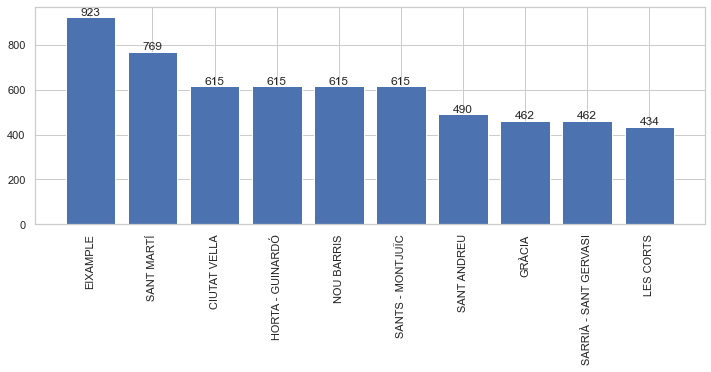

SEXE : SEX


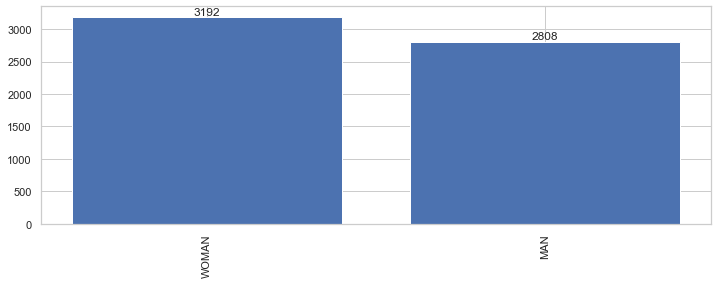

HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR


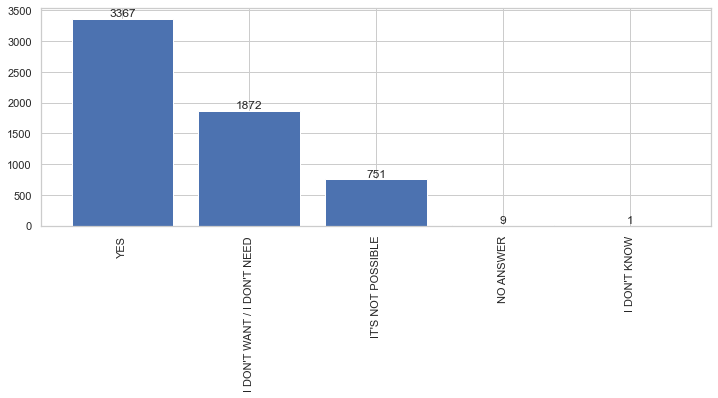

HAB_TREBDOM : DO YOU HAVE: REMUNERATED PERSON TO HELP WITH HOMEWORK OR FAMILY CARE


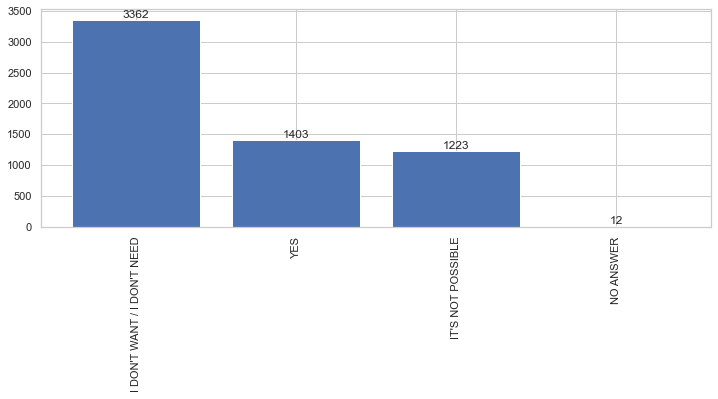

HAB_REGIM_1A5 : DO YOU OWN OR DO YOU RENT YOUR HOUSE/FLAT/ROOM?


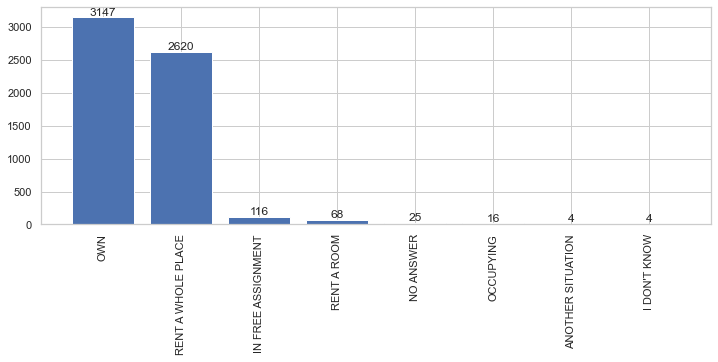

HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED


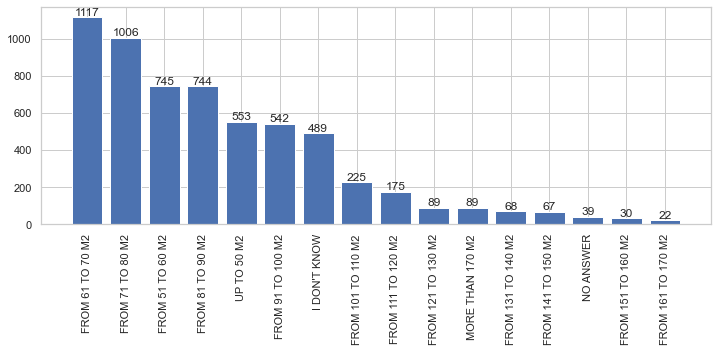

HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED


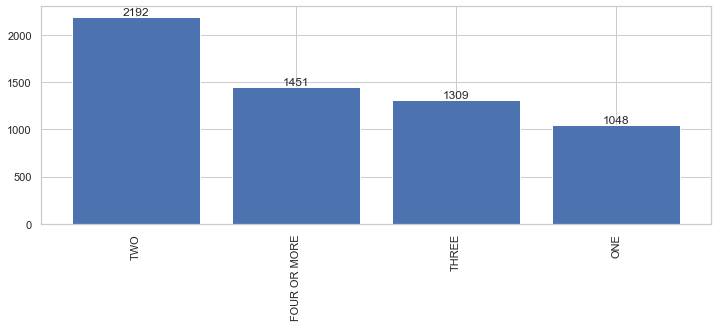

LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED


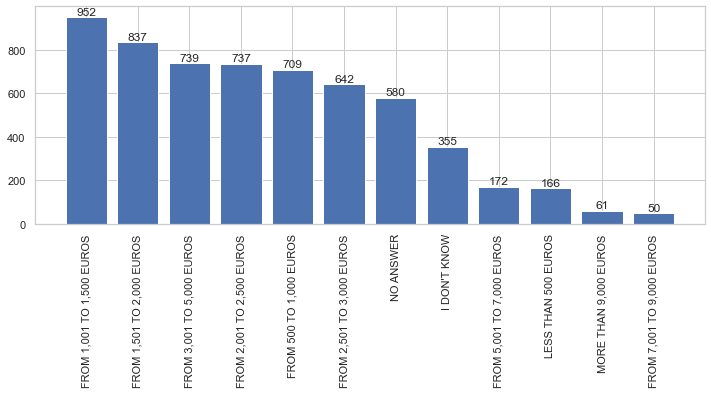

PROB_LLAR_ECON_1A6 : IN RELATION TO THE TOTAL INCOME OF YOUR HOME, HOW DO YOU USUALLY ARRIVE AT THE END OF THE MONTH?


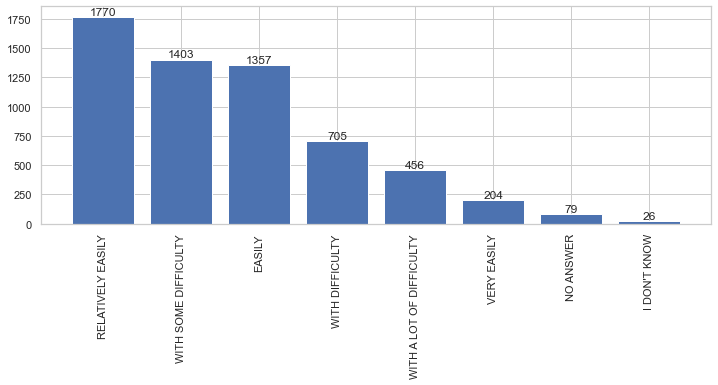

TE_CERT_DISCAP : DO YOU HAVE ANY RECOGNIZED DEGREE OF DISABILITY?


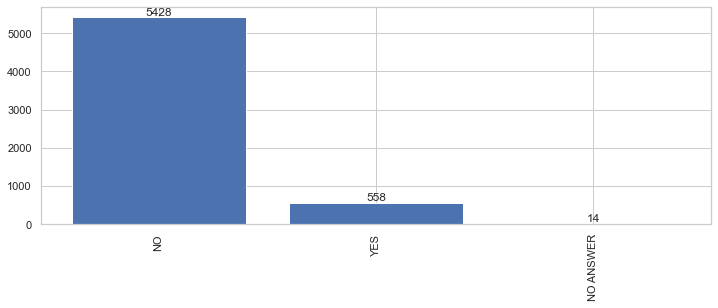

HAB_CERT_DISC : DO YOU LIVE WITH A PERSON WITH RECOGNIZED DEGREE OF DISABILITY?


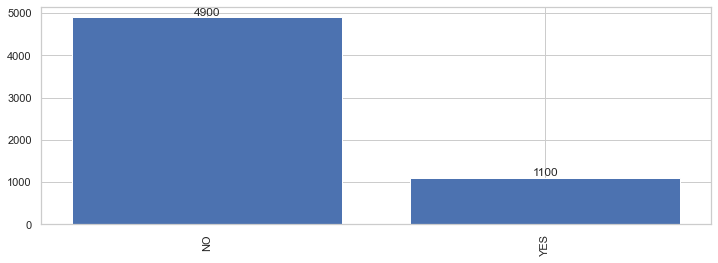

TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?


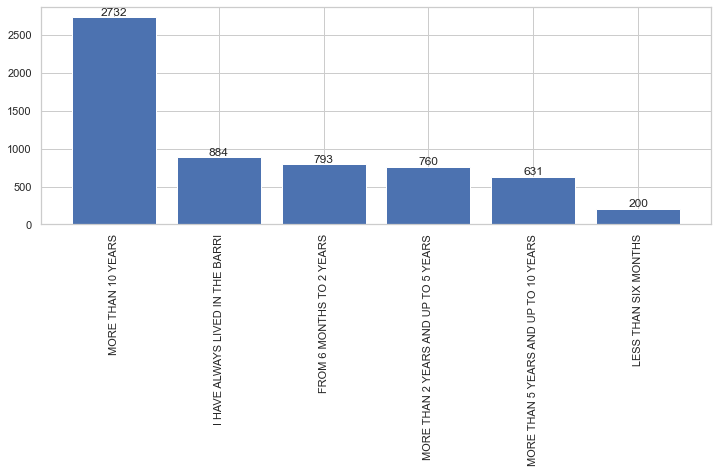

EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?


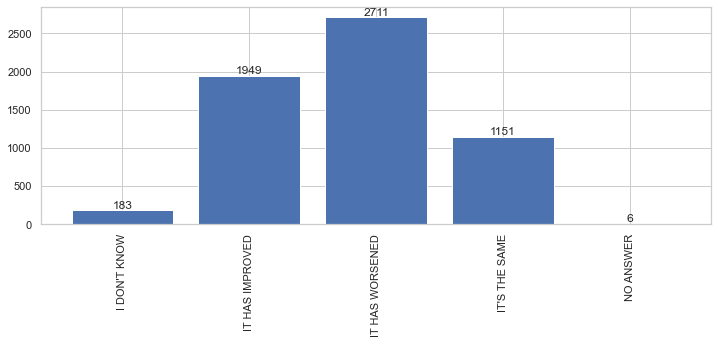

EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?


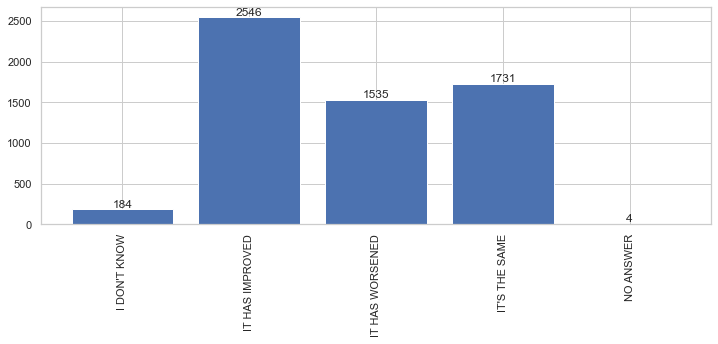

FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR WORSEN?


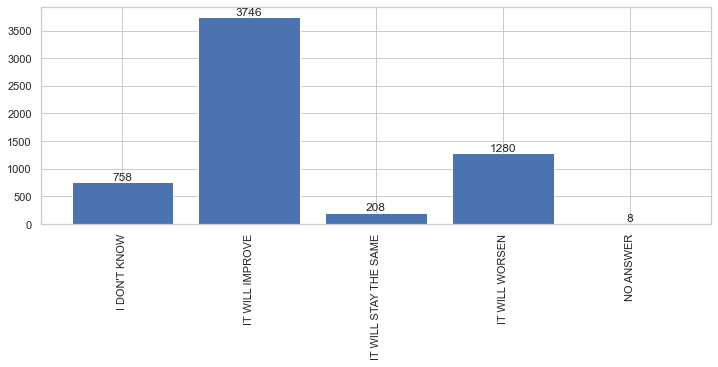

FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR WORSEN?


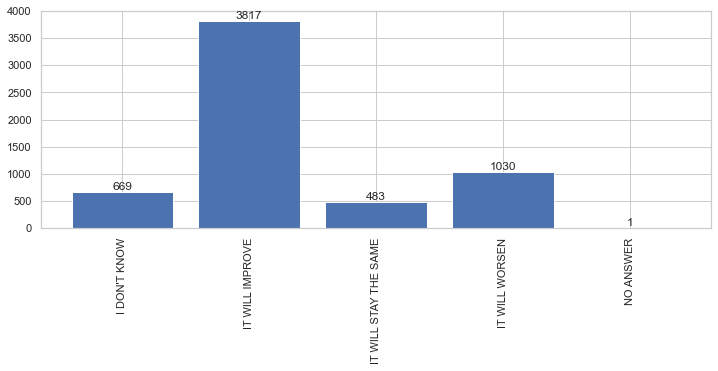

SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?


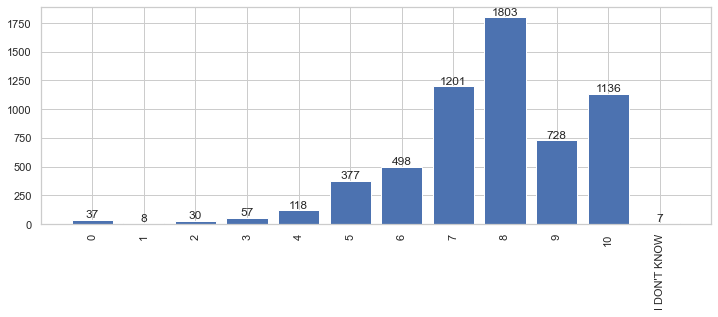

SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?


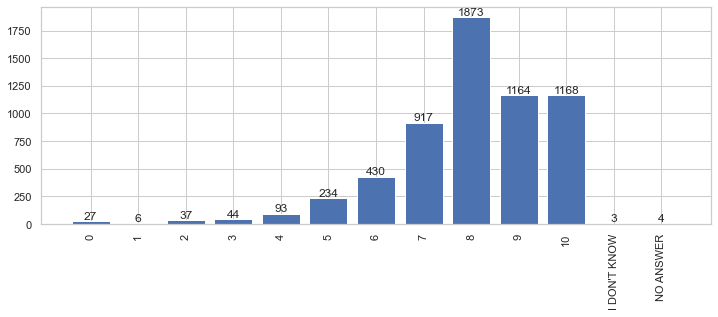

VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


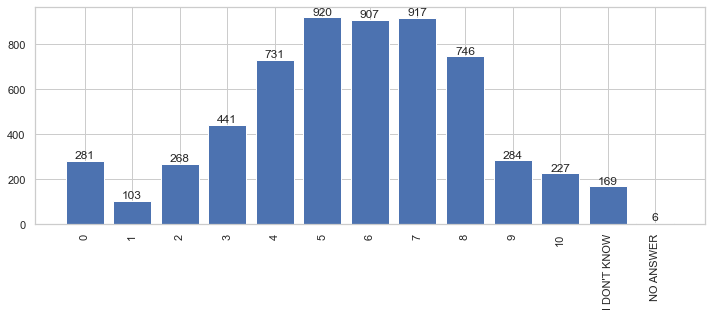

VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD


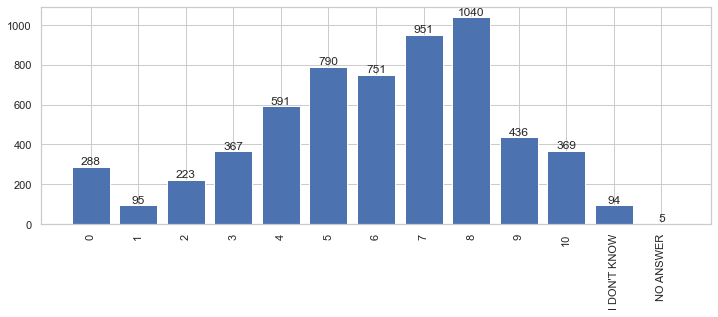

VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


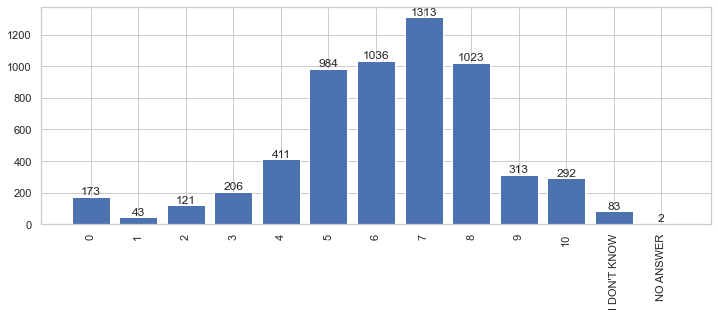

VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?


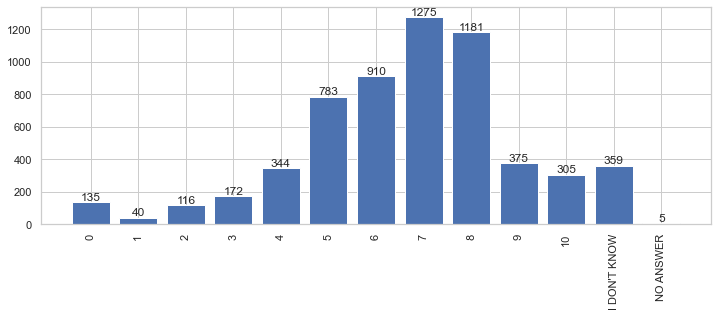

COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?


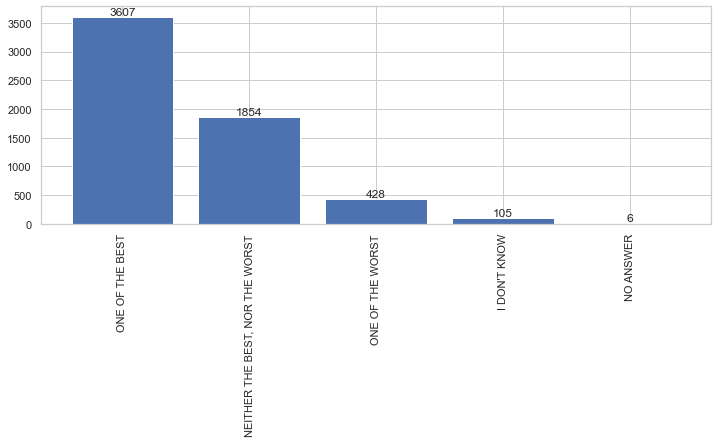

US_ASSOCIA_BARRI : DO YOU PARTICIPATE IN ANY ASSOCIATION OR ENTITY IN YOUR NEIGHBORHOOD?


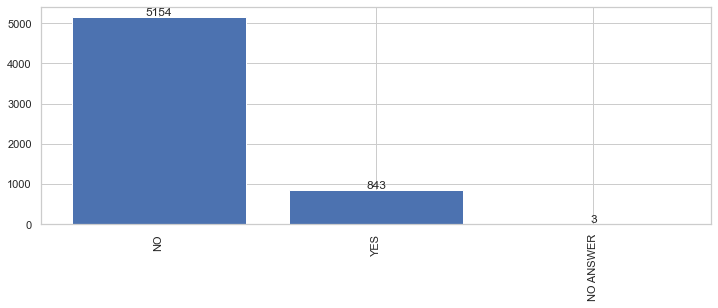

VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


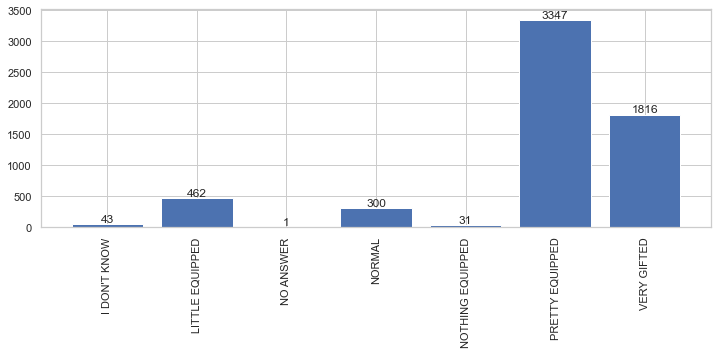

VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


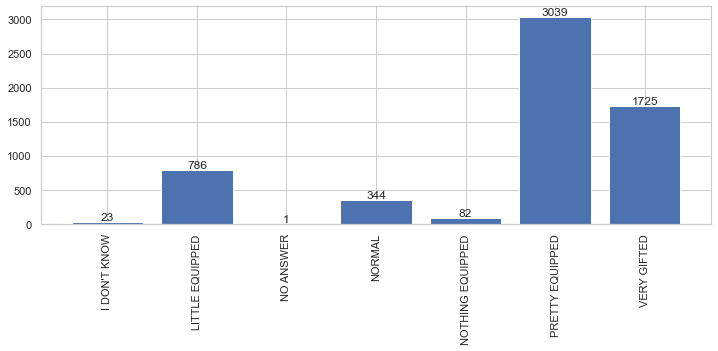

In [66]:
for i in independent_variables:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [67]:
for i in independent_variables:
    print(i, ":", questions_dict[i])
    display(size_pctg(i))

NOM_DISTRICTE : DISTRICT


NOM_DISTRICTE
CIUTAT VELLA             10.25
EIXAMPLE                 15.38
GRÀCIA                    7.70
HORTA - GUINARDÓ         10.25
LES CORTS                 7.23
NOU BARRIS               10.25
SANT ANDREU               8.17
SANT MARTÍ               12.82
SANTS - MONTJUÏC         10.25
SARRIÀ - SANT GERVASI     7.70
dtype: float64

SEXE : SEX


SEXE
MAN      46.8
WOMAN    53.2
dtype: float64

HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR


HAB_COTXE_PART
I DON'T KNOW                    0.02
I DON'T WANT / I DON'T NEED    31.20
IT'S NOT POSSIBLE              12.52
NO ANSWER                       0.15
YES                            56.12
dtype: float64

HAB_TREBDOM : DO YOU HAVE: REMUNERATED PERSON TO HELP WITH HOMEWORK OR FAMILY CARE


HAB_TREBDOM
I DON'T WANT / I DON'T NEED    56.03
IT'S NOT POSSIBLE              20.38
NO ANSWER                       0.20
YES                            23.38
dtype: float64

HAB_REGIM_1A5 : DO YOU OWN OR DO YOU RENT YOUR HOUSE/FLAT/ROOM?


HAB_REGIM_1A5
ANOTHER SITUATION      0.07
I DON'T KNOW           0.07
IN FREE ASSIGNMENT     1.93
NO ANSWER              0.42
OCCUPYING              0.27
OWN                   52.45
RENT A ROOM            1.13
RENT A WHOLE PLACE    43.67
dtype: float64

HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED


HAB_M2_1A14
FROM 101 TO 110 M2     3.75
FROM 111 TO 120 M2     2.92
FROM 121 TO 130 M2     1.48
FROM 131 TO 140 M2     1.13
FROM 141 TO 150 M2     1.12
FROM 151 TO 160 M2     0.50
FROM 161 TO 170 M2     0.37
FROM 51 TO 60 M2      12.42
FROM 61 TO 70 M2      18.62
FROM 71 TO 80 M2      16.77
FROM 81 TO 90 M2      12.40
FROM 91 TO 100 M2      9.03
I DON'T KNOW           8.15
MORE THAN 170 M2       1.48
NO ANSWER              0.65
UP TO 50 M2            9.22
dtype: float64

HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED


HAB_RES_1A4
FOUR OR MORE    24.18
ONE             17.47
THREE           21.82
TWO             36.53
dtype: float64

LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED


LLAR_INGRESSOS_1A10
FROM 1,001 TO 1,500 EUROS    15.87
FROM 1,501 TO 2,000 EUROS    13.95
FROM 2,001 TO 2,500 EUROS    12.28
FROM 2,501 TO 3,000 EUROS    10.70
FROM 3,001 TO 5,000 EUROS    12.32
FROM 5,001 TO 7,000 EUROS     2.87
FROM 500 TO 1,000 EUROS      11.82
FROM 7,001 TO 9,000 EUROS     0.83
I DON'T KNOW                  5.92
LESS THAN 500 EUROS           2.77
MORE THAN 9,000 EUROS         1.02
NO ANSWER                     9.67
dtype: float64

PROB_LLAR_ECON_1A6 : IN RELATION TO THE TOTAL INCOME OF YOUR HOME, HOW DO YOU USUALLY ARRIVE AT THE END OF THE MONTH?


PROB_LLAR_ECON_1A6
EASILY                      22.62
I DON'T KNOW                 0.43
NO ANSWER                    1.32
RELATIVELY EASILY           29.50
VERY EASILY                  3.40
WITH A LOT OF DIFFICULTY     7.60
WITH DIFFICULTY             11.75
WITH SOME DIFFICULTY        23.38
dtype: float64

TE_CERT_DISCAP : DO YOU HAVE ANY RECOGNIZED DEGREE OF DISABILITY?


TE_CERT_DISCAP
NO           90.47
NO ANSWER     0.23
YES           9.30
dtype: float64

HAB_CERT_DISC : DO YOU LIVE WITH A PERSON WITH RECOGNIZED DEGREE OF DISABILITY?


HAB_CERT_DISC
NO     81.67
YES    18.33
dtype: float64

TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?


TMP_RES_BARRI_1A6
FROM 6 MONTHS TO 2 YEARS                13.22
I HAVE ALWAYS LIVED IN THE BARRI        14.73
LESS THAN SIX MONTHS                     3.33
MORE THAN 10 YEARS                      45.53
MORE THAN 2 YEARS AND UP TO 5 YEARS     12.67
MORE THAN 5 YEARS AND UP TO 10 YEARS    10.52
dtype: float64

EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?


EVO1A_BCN
I DON'T KNOW        3.05
IT HAS IMPROVED    32.48
IT HAS WORSENED    45.18
IT'S THE SAME      19.18
NO ANSWER           0.10
dtype: float64

EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?


EVO1A_BARRI
I DON'T KNOW        3.07
IT HAS IMPROVED    42.43
IT HAS WORSENED    25.58
IT'S THE SAME      28.85
NO ANSWER           0.07
dtype: float64

FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR WORSEN?


FUTUR_BCN
I DON'T KNOW             12.63
IT WILL IMPROVE          62.43
IT WILL STAY THE SAME     3.47
IT WILL WORSEN           21.33
NO ANSWER                 0.13
dtype: float64

FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR WORSEN?


FUTUR_BARRI
I DON'T KNOW             11.15
IT WILL IMPROVE          63.62
IT WILL STAY THE SAME     8.05
IT WILL WORSEN           17.17
NO ANSWER                 0.02
dtype: float64

SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?


SATISF_RES_BCN_0A10
0                0.62
1                0.13
2                0.50
3                0.95
4                1.97
5                6.28
6                8.30
7               20.02
8               30.05
9               12.13
10              18.93
I DON'T KNOW     0.12
dtype: float64

SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?


SATISF_RES_BARRI_0A10
0                0.45
1                0.10
2                0.62
3                0.73
4                1.55
5                3.90
6                7.17
7               15.28
8               31.22
9               19.40
10              19.47
I DON'T KNOW     0.05
NO ANSWER        0.07
dtype: float64

VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


VAL_SEGUR
0                4.68
1                1.72
2                4.47
3                7.35
4               12.18
5               15.33
6               15.12
7               15.28
8               12.43
9                4.73
10               3.78
I DON'T KNOW     2.82
NO ANSWER        0.10
dtype: float64

VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD


VAL_SEGUR_BARRI
0                4.80
1                1.58
2                3.72
3                6.12
4                9.85
5               13.17
6               12.52
7               15.85
8               17.33
9                7.27
10               6.15
I DON'T KNOW     1.57
NO ANSWER        0.08
dtype: float64

VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


VAL_GESTMUNI
0                2.88
1                0.72
2                2.02
3                3.43
4                6.85
5               16.40
6               17.27
7               21.88
8               17.05
9                5.22
10               4.87
I DON'T KNOW     1.38
NO ANSWER        0.03
dtype: float64

VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?


VAL_GESTBARRI
0                2.25
1                0.67
2                1.93
3                2.87
4                5.73
5               13.05
6               15.17
7               21.25
8               19.68
9                6.25
10               5.08
I DON'T KNOW     5.98
NO ANSWER        0.08
dtype: float64

COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?


COMPARA_BARRI
I DON'T KNOW                        1.75
NEITHER THE BEST, NOR THE WORST    30.90
NO ANSWER                           0.10
ONE OF THE BEST                    60.12
ONE OF THE WORST                    7.13
dtype: float64

US_ASSOCIA_BARRI : DO YOU PARTICIPATE IN ANY ASSOCIATION OR ENTITY IN YOUR NEIGHBORHOOD?


US_ASSOCIA_BARRI
NO           85.90
NO ANSWER     0.05
YES          14.05
dtype: float64

VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


VAL_TRANSP_1A5
I DON'T KNOW         0.72
LITTLE EQUIPPED      7.70
NO ANSWER            0.02
NORMAL               5.00
NOTHING EQUIPPED     0.52
PRETTY EQUIPPED     55.78
VERY GIFTED         30.27
dtype: float64

VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


VAL_TRANSP_BARRI_1A5
I DON'T KNOW         0.38
LITTLE EQUIPPED     13.10
NO ANSWER            0.02
NORMAL               5.73
NOTHING EQUIPPED     1.37
PRETTY EQUIPPED     50.65
VERY GIFTED         28.75
dtype: float64

In [68]:
for i in independent_variables:
    print(i, ":", questions_dict[i])
    display(ctab(i))

NOM_DISTRICTE : DISTRICT


Would_live_in_another_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,336,155
EIXAMPLE,607,131
GRÀCIA,297,58
HORTA - GUINARDÓ,344,122
LES CORTS,301,41
NOU BARRIS,303,139
SANT ANDREU,260,102
SANT MARTÍ,455,138
SANTS - MONTJUÏC,334,119


SEXE : SEX


Would_live_in_another_neighborhood,0.0,1.0
SEXE,,
MAN,1650,468
WOMAN,1924,579


HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR


Would_live_in_another_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T KNOW,0,1
I DON'T WANT / I DON'T NEED,1200,333
IT'S NOT POSSIBLE,420,173
NO ANSWER,3,3
YES,1951,537


HAB_TREBDOM : DO YOU HAVE: REMUNERATED PERSON TO HELP WITH HOMEWORK OR FAMILY CARE


Would_live_in_another_neighborhood,0.0,1.0
HAB_TREBDOM,,
I DON'T WANT / I DON'T NEED,1966,574
IT'S NOT POSSIBLE,665,249
NO ANSWER,4,2
YES,939,222


HAB_REGIM_1A5 : DO YOU OWN OR DO YOU RENT YOUR HOUSE/FLAT/ROOM?


Would_live_in_another_neighborhood,0.0,1.0
HAB_REGIM_1A5,,
ANOTHER SITUATION,4,0
I DON'T KNOW,2,0
IN FREE ASSIGNMENT,57,19
NO ANSWER,13,2
OCCUPYING,7,5
OWN,1935,456
RENT A ROOM,32,19
RENT A WHOLE PLACE,1524,546


HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,147,36
FROM 111 TO 120 M2,115,21
FROM 121 TO 130 M2,56,14
FROM 131 TO 140 M2,50,10
FROM 141 TO 150 M2,48,6
FROM 151 TO 160 M2,22,2
FROM 161 TO 170 M2,16,2
FROM 51 TO 60 M2,406,160
FROM 61 TO 70 M2,651,191


HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,828,270
ONE,685,162
THREE,768,232
TWO,1293,383


LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",562,176
"FROM 1,501 TO 2,000 EUROS",480,160
"FROM 2,001 TO 2,500 EUROS",423,137
"FROM 2,501 TO 3,000 EUROS",365,107
"FROM 3,001 TO 5,000 EUROS",450,125
"FROM 5,001 TO 7,000 EUROS",118,30
"FROM 500 TO 1,000 EUROS",429,131
"FROM 7,001 TO 9,000 EUROS",31,9
I DON'T KNOW,235,55


PROB_LLAR_ECON_1A6 : IN RELATION TO THE TOTAL INCOME OF YOUR HOME, HOW DO YOU USUALLY ARRIVE AT THE END OF THE MONTH?


Would_live_in_another_neighborhood,0.0,1.0
PROB_LLAR_ECON_1A6,,
EASILY,848,226
I DON'T KNOW,15,5
NO ANSWER,42,11
RELATIVELY EASILY,1069,296
VERY EASILY,138,32
WITH A LOT OF DIFFICULTY,249,97
WITH DIFFICULTY,392,130
WITH SOME DIFFICULTY,821,250


TE_CERT_DISCAP : DO YOU HAVE ANY RECOGNIZED DEGREE OF DISABILITY?


Would_live_in_another_neighborhood,0.0,1.0
TE_CERT_DISCAP,,
NO,3222,966
NO ANSWER,6,1
YES,346,80


HAB_CERT_DISC : DO YOU LIVE WITH A PERSON WITH RECOGNIZED DEGREE OF DISABILITY?


Would_live_in_another_neighborhood,0.0,1.0
HAB_CERT_DISC,,
NO,2908,882
YES,666,165


TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,419,228
I HAVE ALWAYS LIVED IN THE BARRI,544,110
LESS THAN SIX MONTHS,102,66
MORE THAN 10 YEARS,1743,352
MORE THAN 2 YEARS AND UP TO 5 YEARS,405,188
MORE THAN 5 YEARS AND UP TO 10 YEARS,361,103


EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,112,34
IT HAS IMPROVED,1219,357
IT HAS WORSENED,1523,463
IT'S THE SAME,716,192
NO ANSWER,4,1


EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,93,55
IT HAS IMPROVED,1648,407
IT HAS WORSENED,759,321
IT'S THE SAME,1073,264
NO ANSWER,1,0


FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR WORSEN?


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,477,89
IT WILL IMPROVE,2319,696
IT WILL STAY THE SAME,113,35
IT WILL WORSEN,659,226
NO ANSWER,6,1


FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR WORSEN?


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,391,91
IT WILL IMPROVE,2383,666
IT WILL STAY THE SAME,296,76
IT WILL WORSEN,503,214
NO ANSWER,1,0


SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BCN_0A10,,
0,8,6
1,1,2
2,6,3
3,16,4
4,35,12
5,157,54
6,233,95
7,646,230
8,1157,333


SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BARRI_0A10,,
0,4,8
1,1,1
2,2,21
3,8,9
4,11,34
5,58,77
6,142,129
7,397,250
8,1179,307


VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR,,
0,137,31
1,48,22
2,138,55
3,255,70
4,421,129
5,580,143
6,534,179
7,554,155
8,474,137


VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR_BARRI,,
0,129,50
1,36,26
2,110,41
3,203,66
4,329,118
5,470,151
6,440,130
7,574,166
8,679,151


VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTMUNI,,
0,76,22
1,26,7
2,62,18
3,121,27
4,237,58
5,578,163
6,588,207
7,783,230
8,649,187


VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTBARRI,,
0,58,24
1,17,4
2,47,19
3,74,34
4,168,79
5,424,142
6,494,196
7,791,221
8,799,164


COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?


Would_live_in_another_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,68,12
"NEITHER THE BEST, NOR THE WORST",865,466
NO ANSWER,1,2
ONE OF THE BEST,2544,379
ONE OF THE WORST,96,188


US_ASSOCIA_BARRI : DO YOU PARTICIPATE IN ANY ASSOCIATION OR ENTITY IN YOUR NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
US_ASSOCIA_BARRI,,
NO,3034,935
NO ANSWER,0,1
YES,540,111


VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_1A5,,
I DON'T KNOW,32,3
LITTLE EQUIPPED,260,67
NO ANSWER,1,0
NORMAL,195,39
NOTHING EQUIPPED,9,5
PRETTY EQUIPPED,2003,572
VERY GIFTED,1074,361


VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A5,,
I DON'T KNOW,12,3
LITTLE EQUIPPED,436,159
NORMAL,184,71
NOTHING EQUIPPED,41,20
PRETTY EQUIPPED,1831,493
VERY GIFTED,1070,301


Definitions:
* satisfied = very or fairly satisfied - on a scale 0-10 respondents are satisfied if they rate something as 7-10

In [126]:
# EDAT1899_1A6
x = 'EDAT1899_1A6'
data[x].unique()

array(['FROM 25 TO 34 YEARS', 'FROM 35 TO 44 YEARS', '65 YEARS AND OVER',
       'FROM 45 TO 54 YEARS', 'FROM 18 TO 24 YEARS',
       'FROM 55 TO 64 YEARS'], dtype=object)

In [127]:
data['Age_group'] = data[x]

In [69]:
# NOM_DISTRICTE : DISTRICT
x = 'NOM_DISTRICTE'
data[x].unique()

array(['SANTS - MONTJUÏC', 'SANT ANDREU', 'SARRIÀ - SANT GERVASI',
       'NOU BARRIS', 'CIUTAT VELLA', 'HORTA - GUINARDÓ', 'EIXAMPLE',
       'GRÀCIA', 'LES CORTS', 'SANT MARTÍ'], dtype=object)

In [70]:
data['District'] = data[x]

In [71]:
# SEXE : SEX
x = 'SEXE'
data[x].unique()

array(['MAN', 'WOMAN'], dtype=object)

In [72]:
data_prep = {'WOMAN': 1,
            'MAN': 0}
data['Woman'] = [data_prep[i] for i in data[x]]

In [73]:
# HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR
x = 'HAB_COTXE_PART'
data[x].unique()

array(["I DON'T WANT / I DON'T NEED", "IT'S NOT POSSIBLE", 'YES',
       'NO ANSWER', "I DON'T KNOW"], dtype=object)

In [76]:
data_prep = {'YES': 1, 
             "I DON'T WANT / I DON'T NEED": 0, 
             "IT'S NOT POSSIBLE": 0,
             "I DON'T KNOW": 0,
            "NO ANSWER": np.nan}
data['Car'] = [data_prep[i] for i in data[x]]

In [77]:
# HAB_TREBDOM : DO YOU HAVE: REMUNERATED PERSON TO HELP WITH HOMEWORK OR FAMILY CARE
x = 'HAB_TREBDOM'
data[x].unique()

array(["I DON'T WANT / I DON'T NEED", "IT'S NOT POSSIBLE", 'YES',
       'NO ANSWER'], dtype=object)

In [78]:
data_prep = {"I DON'T WANT / I DON'T NEED": 0, 
             'YES': 1, 
             "IT'S NOT POSSIBLE": 0,
             'NO ANSWER': np.nan} 
data['Support_with_housework'] = [data_prep[i] for i in data[x]]

In [79]:
# HAB_REGIM_1A5 : DO YOU OWN OR DO YOU RENT YOUR HOUSE/FLAT/ROOM?
x = 'HAB_REGIM_1A5'
data[x].unique()

array(['RENT A ROOM', 'RENT A WHOLE PLACE', 'OWN', 'NO ANSWER',
       'IN FREE ASSIGNMENT', 'OCCUPYING', 'ANOTHER SITUATION',
       "I DON'T KNOW"], dtype=object)

In [82]:
data_prep = {'OWN': 1, 
             'NO ANSWER': np.nan, 
             'RENT A WHOLE PLACE': 0, 
             'RENT A ROOM': 0,
             'IN FREE ASSIGNMENT': np.nan,
             'ANOTHER SITUATION': np.nan,
            'OCCUPYING': np.nan,
            "I DON'T KNOW": np.nan} 
data['Owner'] = [data_prep[i] for i in data[x]]

In [83]:
# HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED
x = 'HAB_M2_1A14'
data[x].unique()

array(['FROM 71 TO 80 M2', 'FROM 81 TO 90 M2', 'FROM 51 TO 60 M2',
       'FROM 91 TO 100 M2', 'FROM 101 TO 110 M2', "I DON'T KNOW",
       'FROM 61 TO 70 M2', 'UP TO 50 M2', 'MORE THAN 170 M2',
       'FROM 111 TO 120 M2', 'FROM 121 TO 130 M2', 'FROM 141 TO 150 M2',
       'FROM 131 TO 140 M2', 'NO ANSWER', 'FROM 151 TO 160 M2',
       'FROM 161 TO 170 M2'], dtype=object)

In [84]:
data_prep = {'UP TO 50 M2': '< 50 M2', 
             'FROM 51 TO 60 M2': '51-100 M2', 
             'FROM 61 TO 70 M2': '51-100 M2', 
             'FROM 71 TO 80 M2': '51-100 M2', 
             'FROM 81 TO 90 M2': '51-100 M2', 
             'FROM 91 TO 100 M2': '51-100 M2', 
             'FROM 101 TO 120 M2': '101-150 M2', 
             'FROM 101 TO 110 M2': '101-150 M2',
             'FROM 111 TO 120 M2': '101-150 M2', 
             'FROM 121 TO 150 M2': '101-150 M2', 
             'FROM 121 TO 130 M2': '101-150 M2',
             'FROM 131 TO 140 M2': '101-150 M2', 
             'FROM 141 TO 150 M2': '101-150 M2', 
             'FROM 151 TO 160 M2': '> 150 M2',
             'FROM 161 TO 170 M2': '> 150 M2',
             'MORE THAN 150 M2': '> 150 M2',
             'MORE THAN 170 M2': '> 150 M2',
             'NO ANSWER': np.nan,
             "I DON'T KNOW": "I DON'T KNOW"} 
data['House_size'] = [data_prep[i] for i in data[x]]

In [85]:
# HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED
x = 'HAB_RES_1A4'
data[x].unique()

array(['THREE', 'FOUR OR MORE', 'ONE', 'TWO'], dtype=object)

In [86]:
data_prep = {'ONE': "ONE",
            'TWO': 'TWO',
            'THREE': 'THREE OR MORE',
            'FOUR OR MORE': 'THREE OR MORE'} 
data['No_of_people_in_the_house'] = [data_prep[i] for i in data[x]]

In [87]:
# PROB_LLAR_ECON_1A6 : IN RELATION TO THE TOTAL INCOME OF YOUR HOME, HOW DO YOU USUALLY ARRIVE AT THE END OF THE MONTH?
x = 'PROB_LLAR_ECON_1A6'
data[x].unique()

array(['WITH SOME DIFFICULTY', 'WITH A LOT OF DIFFICULTY', 'EASILY',
       'RELATIVELY EASILY', 'WITH DIFFICULTY', 'NO ANSWER',
       "I DON'T KNOW", 'VERY EASILY'], dtype=object)

In [88]:
data_prep = {'EASILY': 'GOOD', 
             'WITH DIFFICULTY': 'BAD', 
             'WITH SOME DIFFICULTY': 'BAD',
             'RELATIVELY EASILY': 'GOOD', 
             'VERY EASILY': 'GOOD', 
             'WITH A LOT OF DIFFICULTY': 'BAD',
             'NO ANSWER': np.nan, 
             "I DON'T KNOW": np.nan} 
data['Financial_situation'] = [data_prep[i] for i in data[x]]

In [89]:
# TE_CERT_DISCAP : DO YOU HAVE ANY RECOGNIZED DEGREE OF DISABILITY?
x = 'TE_CERT_DISCAP'
data[x].unique()

array(['NO', 'NO ANSWER', 'YES'], dtype=object)

In [90]:
data_prep = {'NO': 0, 
             'YES': 1, 
             'NO ANSWER': np.nan} 
data['Disability'] = [data_prep[i] for i in data[x]]

In [91]:
# HAB_CERT_DISC : DO YOU LIVE WITH A PERSON WITH RECOGNIZED DEGREE OF DISABILITY?
x = 'HAB_CERT_DISC'
data[x].unique()

array(['NO', 'YES'], dtype=object)

In [92]:
data_prep = {'NO': 0, 
             'YES': 1}
data['Living_with_disabled_person'] = [data_prep[i] for i in data[x]]

In [93]:
# TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
x = 'TMP_RES_BARRI_1A6'
data[x].unique()

array(['MORE THAN 2 YEARS AND UP TO 5 YEARS',
       'MORE THAN 5 YEARS AND UP TO 10 YEARS', 'MORE THAN 10 YEARS',
       'I HAVE ALWAYS LIVED IN THE BARRI', 'LESS THAN SIX MONTHS',
       'FROM 6 MONTHS TO 2 YEARS'], dtype=object)

In [94]:
data_prep = {'I HAVE ALWAYS LIVED IN THE BARRI': 'I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD',
             'MORE THAN 10 YEARS': 'MORE THAN 10 YEARS', 
             'MORE THAN 5 YEARS AND UP TO 10 YEARS': 'LESS THAN 10 YEARS',
             'MORE THAN 2 YEARS AND UP TO 5 YEARS': 'LESS THAN 10 YEARS', 
             'FROM 6 MONTHS TO 2 YEARS': 'LESS THAN 10 YEARS',
             'LESS THAN SIX MONTHS': 'LESS THAN 10 YEARS',
             'NO ANSWER': np.nan}
data['Time_living_in_barri'] = [data_prep[i] for i in data[x]]

In [95]:
# EVO1A_BARRI : DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?
x = 'EVO1A_BARRI'
data[x].unique()

array(['IT HAS WORSENED', "IT'S THE SAME", 'IT HAS IMPROVED',
       "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [96]:
data_prep = {"IT HAS WORSENED": "IT HAS WORSENED", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": "IT IS THE SAME",
             'NO ANSWER': np.nan}
data['Barri_evolution'] = [data_prep[i] for i in data[x]]

In [97]:
# EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
x = 'EVO1A_BCN'
data[x].unique()

array(['IT HAS WORSENED', 'IT HAS IMPROVED', "IT'S THE SAME",
       "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [98]:
data_prep = {"IT HAS WORSENED": "IT HAS WORSENED", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": "IT IS THE SAME",
             'NO ANSWER': np.nan}
data['BCN_evolution'] = [data_prep[i] for i in data[x]]

In [99]:
# FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?
x = 'FUTUR_BARRI'
data[x].unique()

array(['IT WILL WORSEN', 'IT WILL IMPROVE', "I DON'T KNOW",
       'IT WILL STAY THE SAME', 'NO ANSWER'], dtype=object)

In [100]:
data_prep = {'IT WILL WORSEN': "IT WILL WORSEN", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": "IT WILL STAY THE SAME", 
             'NO ANSWER': np.nan}
data['Barri_future'] = [data_prep[i] for i in data[x]]

In [101]:
# AND FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
x = 'FUTUR_BCN'
data[x].unique()

array(['IT WILL WORSEN', 'IT WILL IMPROVE', 'IT WILL STAY THE SAME',
       "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [102]:
data_prep = {'IT WILL WORSEN': "IT WILL WORSEN", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": "IT WILL STAY THE SAME", 
             'NO ANSWER': np.nan}
data['BCN_future'] = [data_prep[i] for i in data[x]]

In [103]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD? - GROUPED
x = 'SATISF_RES_BARRI_0A10'
data[x].unique()

array([8, 9, 7, 6, 5, 10, 4, 3, 2, 0, 1, "I DON'T KNOW", 'NO ANSWER'],
      dtype=object)

In [104]:
data_prep = {0: 'NOT SATISFIED',
             1: 'NOT SATISFIED',
             2: 'NOT SATISFIED',
             3: 'NOT SATISFIED',
             4: 'FAIRLY SATISFIED',
             5: 'FAIRLY SATISFIED',
             6: 'FAIRLY SATISFIED', 
             7: 'SATISFIED',
             8: 'SATISFIED',
             9: 'SATISFIED', 
             10: 'SATISFIED',  
             "I DON'T KNOW": "FAIRLY SATISFIED", 
             'NO ANSWER': np.nan}
data['Barri_satisfaction'] = [data_prep[i] for i in data[x]]

In [105]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN BARCELONA?
x = 'SATISF_RES_BCN_0A10'
data[x].unique()

array([6, 10, 8, 7, 9, 5, 4, 0, 3, 2, "I DON'T KNOW", 1], dtype=object)

In [106]:
data_prep = {0: 'NOT SATISFIED',
             1: 'NOT SATISFIED',
             2: 'NOT SATISFIED',
             3: 'NOT SATISFIED',
             4: 'FAIRLY SATISFIED',
             5: 'FAIRLY SATISFIED',
             6: 'FAIRLY SATISFIED', 
             7: 'SATISFIED',
             8: 'SATISFIED',
             9: 'SATISFIED', 
             10: 'SATISFIED',  
             "I DON'T KNOW": "FAIRLY SATISFIED", 
             'NO ANSWER': np.nan}
data['BCN_satisfaction'] = [data_prep[i] for i in data[x]]

In [107]:
# CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD
x = 'VAL_SEGUR_BARRI'
data[x].unique()

array([4, 8, 2, 5, 7, 6, "I DON'T KNOW", 0, 3, 10, 9, 1, 'NO ANSWER'],
      dtype=object)

In [108]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD", 
             'NO ANSWER': np.nan}
data['Barri_security'] = [data_prep[i] for i in data[x]]

In [109]:
# CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE
x = 'VAL_SEGUR'
data[x].unique()

array([4, 9, 8, 3, 5, 7, 1, 10, 0, 6, 2, 'NO ANSWER', "I DON'T KNOW"],
      dtype=object)

In [110]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD", 
             'NO ANSWER': np.nan}
data['BCN_security'] = [data_prep[i] for i in data[x]]

In [111]:
# ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?
x = 'VAL_GESTBARRI'
data[x].unique()

array(["I DON'T KNOW", 8, 6, 5, 9, 7, 10, 1, 4, 3, 2, 0, 'NO ANSWER'],
      dtype=object)

In [112]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD", 
             'NO ANSWER': np.nan}
data['Barri_management'] = [data_prep[i] for i in data[x]]

In [113]:
# ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?
x = 'VAL_GESTMUNI'
data[x].unique()

array([0, 7, 8, 5, 6, 9, "I DON'T KNOW", 2, 10, 1, 4, 3, 'NO ANSWER'],
      dtype=object)

In [114]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD", 
             'NO ANSWER': np.nan}
data['BCN_management'] = [data_prep[i] for i in data[x]]

In [115]:
# DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?
x = 'COMPARA_BARRI'
data[x].unique()

array(['ONE OF THE BEST', 'NEITHER THE BEST, NOR THE WORST',
       "I DON'T KNOW", 'ONE OF THE WORST', 'NO ANSWER'], dtype=object)

In [116]:
data_prep = {'NEITHER THE BEST, NOR THE WORST': 'NEITHER THE BEST, NOR THE WORST', 
             'ONE OF THE BEST': 'ONE OF THE BEST',
             'ONE OF THE WORST': 'ONE OF THE WORST', 
             "I DON'T KNOW": "NEITHER THE BEST, NOR THE WORST", 
             'NO ANSWER': np.nan}
data['Barri_comparison'] = [data_prep[i] for i in data[x]]

In [117]:
# DO YOU PARTICIPATE IN ANY ASSOCIATION OR ENTITY IN YOUR NEIGHBORHOOD?
x = 'US_ASSOCIA_BARRI'
data[x].unique()

array(['NO', 'YES', 'NO ANSWER'], dtype=object)

In [118]:
data_prep = {'YES': 1,
            'NO': 0,
            'NO ANSWER': np.nan}
data['Barri_association'] = [data_prep[i] for i in data[x]]

In [119]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED?
x = 'VAL_TRANSP_BARRI_1A5'
data[x].unique()

array(['VERY GIFTED', 'PRETTY EQUIPPED', 'LITTLE EQUIPPED', 'NORMAL',
       'NOTHING EQUIPPED', "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [120]:
data_prep = {'VERY GIFTED': 'GOOD', 
             'PRETTY EQUIPPED': 'GOOD', 
             'NORMAL': 'NEITHER BAD, NOR GOOD', 
             'LITTLE EQUIPPED': 'BAD', 
             'NOTHING EQUIPPED': 'BAD', 
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD",
             'NO ANSWER': np.nan}
data['Barri_transport'] = [data_prep[i] for i in data['VAL_TRANSP_BARRI_1A5']]

In [121]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED?
x = 'VAL_TRANSP_1A5'
data[x].unique()

array(['VERY GIFTED', 'PRETTY EQUIPPED', 'LITTLE EQUIPPED',
       "I DON'T KNOW", 'NORMAL', 'NOTHING EQUIPPED', 'NO ANSWER'],
      dtype=object)

In [122]:
data_prep = {'VERY GIFTED': 'GOOD', 
             'PRETTY EQUIPPED': 'GOOD', 
             'NORMAL': 'NEITHER BAD, NOR GOOD', 
             'LITTLE EQUIPPED': 'BAD', 
             'NOTHING EQUIPPED': 'BAD', 
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD",
             'NO ANSWER': np.nan}
data['BCN_transport'] = [data_prep[i] for i in data['VAL_TRANSP_1A5']]

In [123]:
# PROB_BARRI_N1 : WHAT IS THE MOST SERIOUS PROBLEM YOUR NEIGHBORHOOD HAS AT THE MOMENT? - GROUPED
x = 'PROB_BARRI_N1'
data[x].unique()

array(['CITY MODEL', 'NOISE', 'CIRCULATION / TRAFFIC',
       'NEGATIVE SOCIAL AND CIVIL VALUES', 'INSECURITY', "I DON'T KNOW",
       'TOURISM', 'MAINTENANCE', 'ACCESS TO THE HOUSE',
       'TRANSPORT, INFRASTRUCTURE AND MOBILITY',
       'POLLUTION AND THE ENVIRONMENT',
       'UNEMPLOYMENT / WORKING CONDITIONS', 'URBANISM', 'NOTHING',
       'PROBLEMS ASSOCIATED WITH IMMIGRATION', 'OCUPES', 'GREEN SPACES',
       'STREETS CLEANING', 'PARKING', 'MASSIFICATION', 'CAMP NOU',
       'EQUIPMENT AND SERVICES', 'COMMERCE',
       'SOCIAL PROBLEMS: POVERTY, INEQUALITY, ...',
       'INEQUALITY / IMBALANCE / TERRITORIAL MODEL', 'WORKS',
       'PUBLIC ADMINISTRATION MANAGEMENT', 'NO ANSWER', 'OTHERS', 'DRUGS',
       'MALE AND DOMESTIC VIOLENCE', 'ECONOMIC PROBLEMS',
       'POLITICAL ASPECTS', 'LEISURE AREAS',
       'PERSONAL PROBLEMS AND CONCERNS', 'PROSTITUTION',
       'LACE FROM CATALONIA TO SPAIN', 'TAXES AND FINES',
       'MUNICIPAL POLITICAL MANAGEMENT', 'BENEFITS AND GRANTS',
    

In [124]:
barri_problem_with_security = []
barri_problem_with_streets_cleaning = []
barri_problem_with_mobility = []

for j in range(len(data)):
    if data.iloc[j][x] == 'INSECURITY':
        barri_problem_with_security.append(1)
        barri_problem_with_streets_cleaning.append(0)
        barri_problem_with_mobility.append(0)
    elif data.iloc[j][x] == 'STREETS CLEANING':
        barri_problem_with_security.append(0)
        barri_problem_with_streets_cleaning.append(1)
        barri_problem_with_mobility.append(0)
    elif data.iloc[j][x] == 'TRANSPORT, INFRASTRUCTURE AND MOBILITY':
        barri_problem_with_security.append(0)
        barri_problem_with_streets_cleaning.append(0)
        barri_problem_with_mobility.append(1)
    else:
        barri_problem_with_security.append(0)
        barri_problem_with_streets_cleaning.append(0)
        barri_problem_with_mobility.append(0)

In [125]:
data['Barri_problem_with_security'] = barri_problem_with_security
data['Barri_problem_with_streets_cleaning'] = barri_problem_with_streets_cleaning
data['Barri_problem_with_mobility'] = barri_problem_with_mobility

#### Additonal sample description

NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?


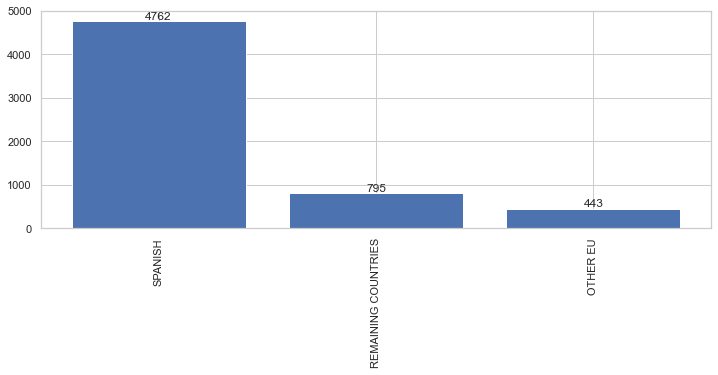

LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?


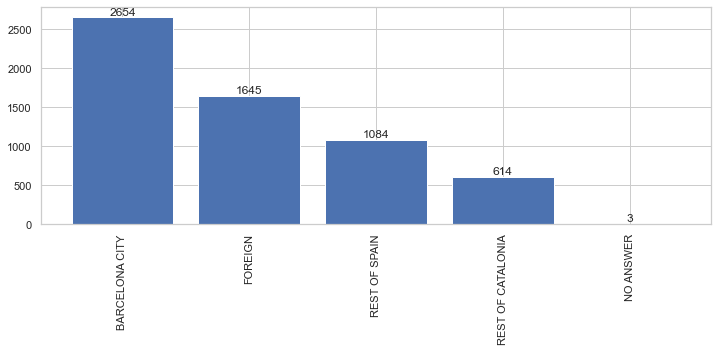

SITLABORAL : WHAT IS YOUR WORK SITUATION?


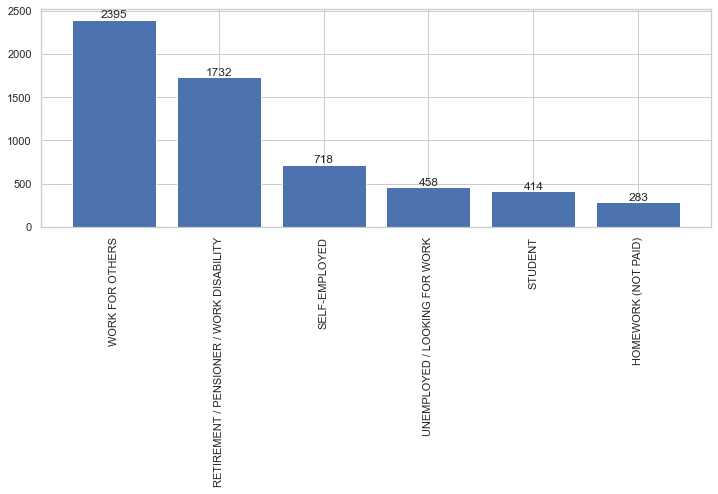

CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?


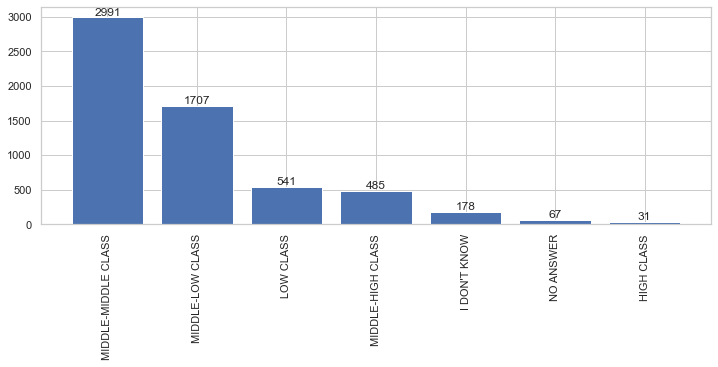

RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?


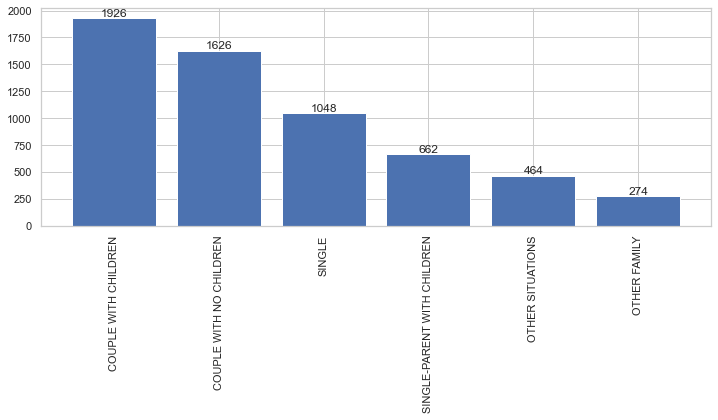

PROB_BCN_N1 : COULD YOU TELL ME WHAT IS THE MOST SERIOUS PROBLEM THE CITY OF BARCELONA HAS AT THE MOMENT? - GROUPED


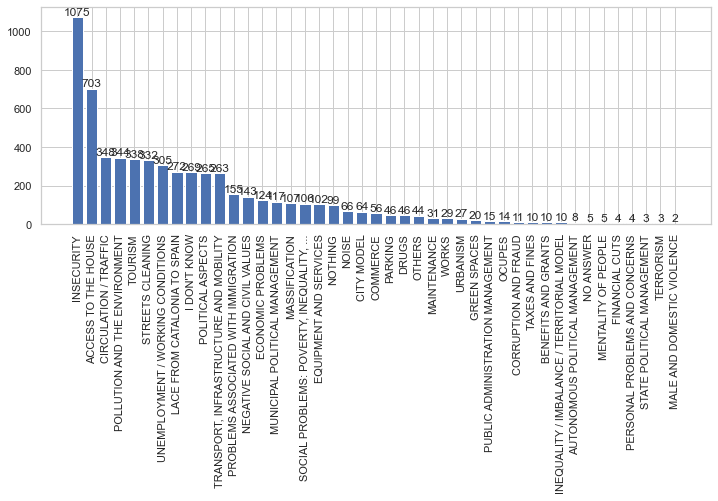

PROB_BARRI_N1 : WHAT IS THE MOST SERIOUS PROBLEM YOUR NEIGHBORHOOD HAS AT THE MOMENT? - GROUPED


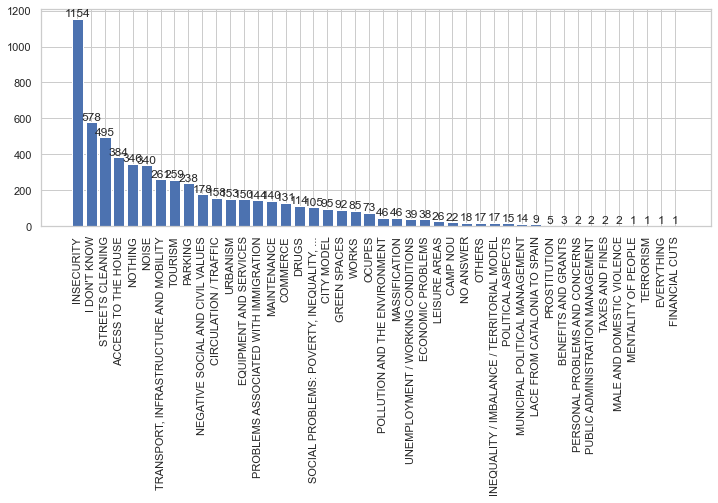

PROB_PERS_N1 : WHAT IS THE PROBLEM THAT AFFECTS YOU THE MOST? - GROUPED


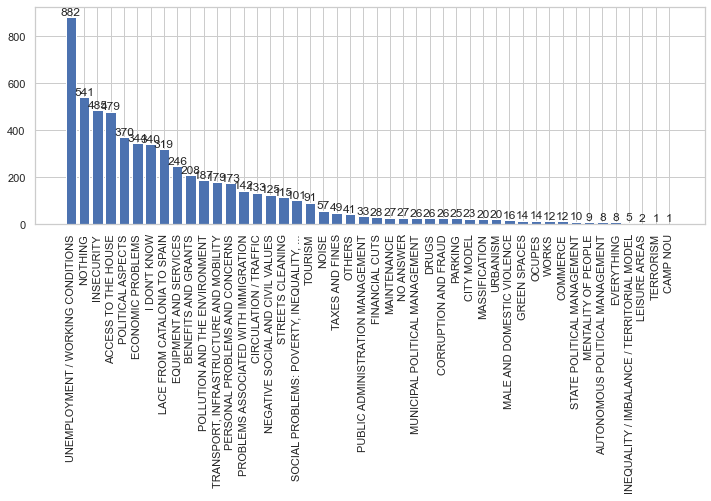

DEM_BCN_MUNI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO FOR THE CITY? - GROUPED


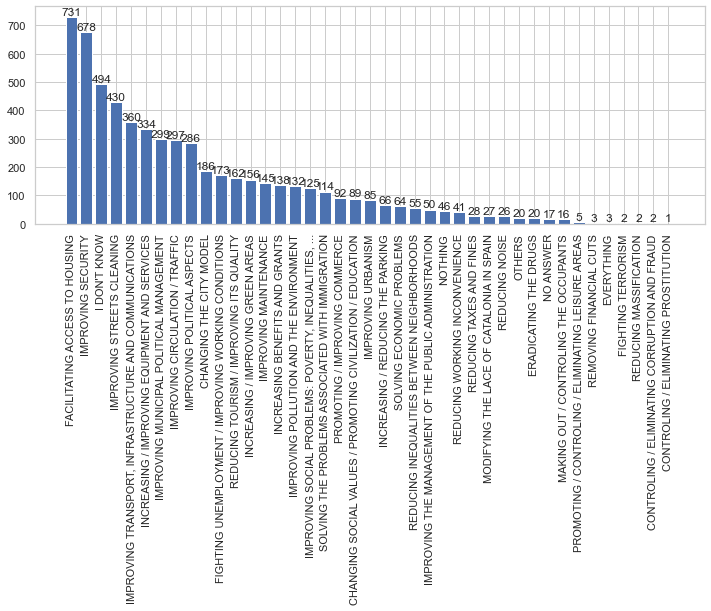

DEM_BARRI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO IN YOUR NEIGHBORHOOD? - GROUPED


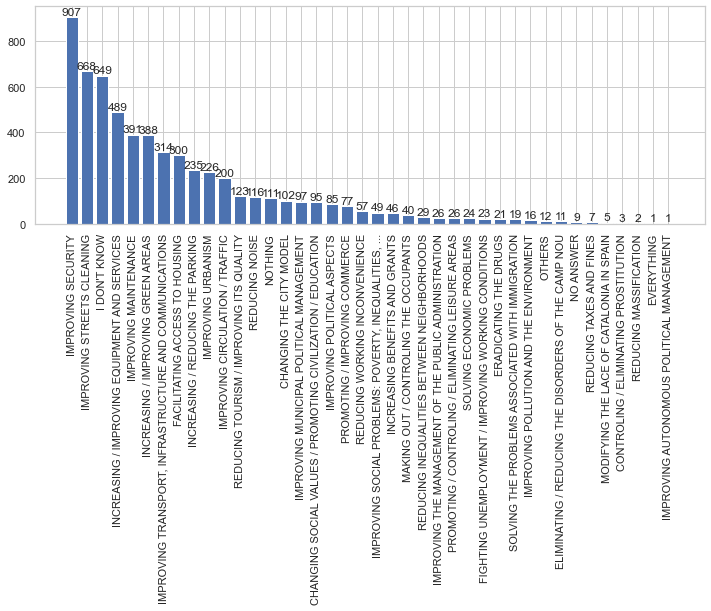

TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?


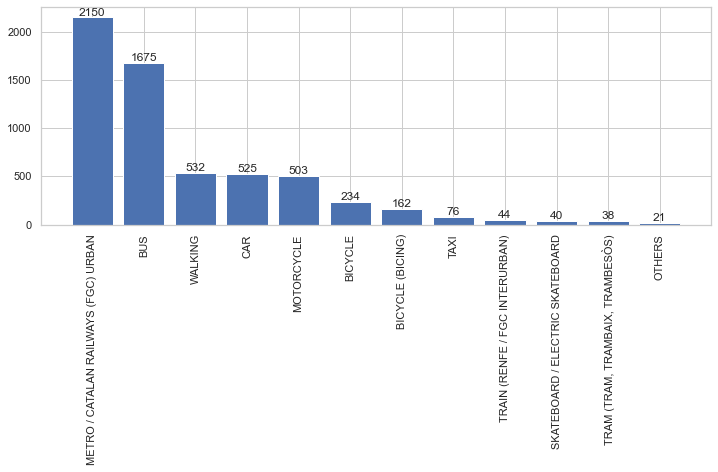

SENTPERTI : BELONGING - SPANISH VS CATALAN


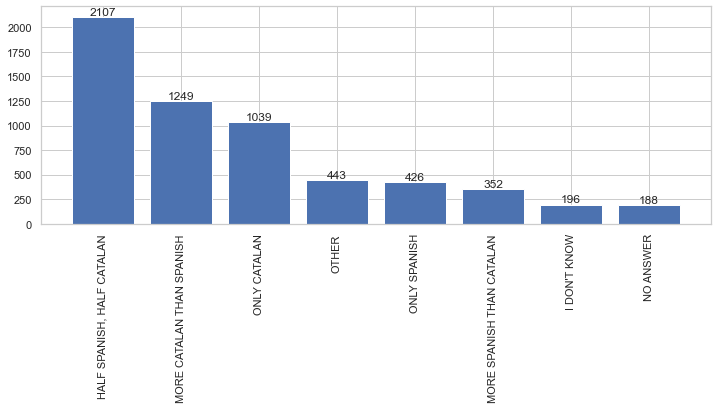

LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?


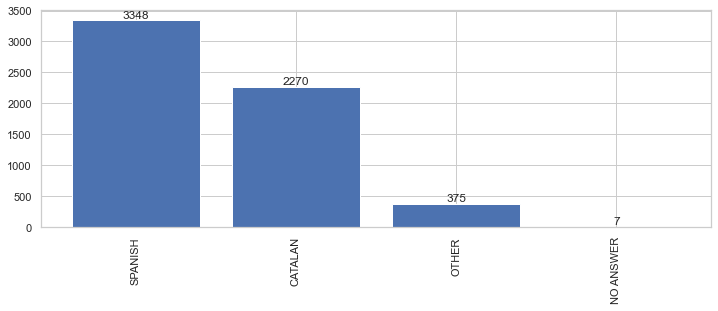

ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


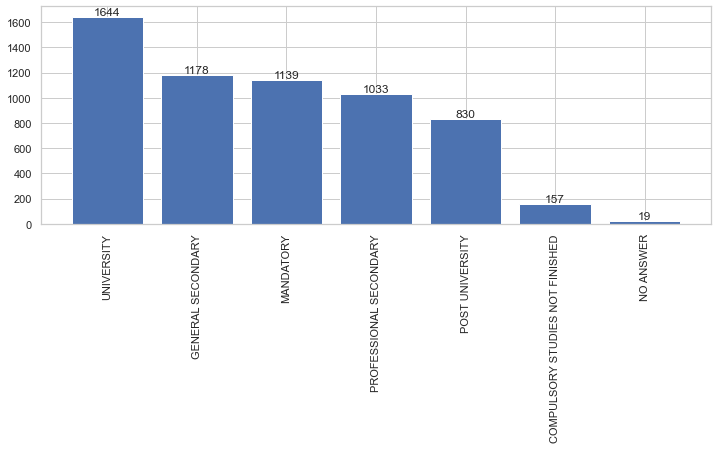

In [128]:
for i in additional_sample_description:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [129]:
for i in additional_sample_description:
    print(i, ":", questions_dict[i])
    display(size_pctg(i))

NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?


NACIO_ACT_UE
OTHER EU                7.38
REMAINING COUNTRIES    13.25
SPANISH                79.37
dtype: float64

LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?


LLOC_NAIX_1A4
BARCELONA CITY       44.23
FOREIGN              27.42
NO ANSWER             0.05
REST OF CATALONIA    10.23
REST OF SPAIN        18.07
dtype: float64

SITLABORAL : WHAT IS YOUR WORK SITUATION?


SITLABORAL
HOMEWORK (NOT PAID)                          4.72
RETIREMENT / PENSIONER / WORK DISABILITY    28.87
SELF-EMPLOYED                               11.97
STUDENT                                      6.90
UNEMPLOYED / LOOKING FOR WORK                7.63
WORK FOR OTHERS                             39.92
dtype: float64

CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?


CLASSESOC_ENT
HIGH CLASS              0.52
I DON'T KNOW            2.97
LOW CLASS               9.02
MIDDLE-HIGH CLASS       8.08
MIDDLE-LOW CLASS       28.45
MIDDLE-MIDDLE CLASS    49.85
NO ANSWER               1.12
dtype: float64

RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?


RESUM_PARENTIU
COUPLE WITH CHILDREN           32.10
COUPLE WITH NO CHILDREN        27.10
OTHER FAMILY                    4.57
OTHER SITUATIONS                7.73
SINGLE                         17.47
SINGLE-PARENT WITH CHILDREN    11.03
dtype: float64

PROB_BCN_N1 : COULD YOU TELL ME WHAT IS THE MOST SERIOUS PROBLEM THE CITY OF BARCELONA HAS AT THE MOMENT? - GROUPED


PROB_BCN_N1
ACCESS TO THE HOUSE                           11.72
AUTONOMOUS POLITICAL MANAGEMENT                0.13
BENEFITS AND GRANTS                            0.17
CIRCULATION / TRAFFIC                          5.80
CITY MODEL                                     1.07
COMMERCE                                       0.93
CORRUPTION AND FRAUD                           0.18
DRUGS                                          0.77
ECONOMIC PROBLEMS                              2.07
EQUIPMENT AND SERVICES                         1.70
FINANCIAL CUTS                                 0.07
GREEN SPACES                                   0.33
I DON'T KNOW                                   4.48
INEQUALITY / IMBALANCE / TERRITORIAL MODEL     0.17
INSECURITY                                    17.92
LACE FROM CATALONIA TO SPAIN                   4.53
MAINTENANCE                                    0.52
MALE AND DOMESTIC VIOLENCE                     0.03
MASSIFICATION                                  1.78


PROB_BARRI_N1 : WHAT IS THE MOST SERIOUS PROBLEM YOUR NEIGHBORHOOD HAS AT THE MOMENT? - GROUPED


PROB_BARRI_N1
ACCESS TO THE HOUSE                            6.40
BENEFITS AND GRANTS                            0.05
CAMP NOU                                       0.37
CIRCULATION / TRAFFIC                          2.63
CITY MODEL                                     1.58
COMMERCE                                       2.18
DRUGS                                          1.90
ECONOMIC PROBLEMS                              0.63
EQUIPMENT AND SERVICES                         2.50
EVERYTHING                                     0.02
FINANCIAL CUTS                                 0.02
GREEN SPACES                                   1.53
I DON'T KNOW                                   9.63
INEQUALITY / IMBALANCE / TERRITORIAL MODEL     0.28
INSECURITY                                    19.23
LACE FROM CATALONIA TO SPAIN                   0.15
LEISURE AREAS                                  0.43
MAINTENANCE                                    2.33
MALE AND DOMESTIC VIOLENCE                     0.0

PROB_PERS_N1 : WHAT IS THE PROBLEM THAT AFFECTS YOU THE MOST? - GROUPED


PROB_PERS_N1
ACCESS TO THE HOUSE                            7.98
AUTONOMOUS POLITICAL MANAGEMENT                0.13
BENEFITS AND GRANTS                            3.47
CAMP NOU                                       0.02
CIRCULATION / TRAFFIC                          2.22
CITY MODEL                                     0.38
COMMERCE                                       0.20
CORRUPTION AND FRAUD                           0.43
DRUGS                                          0.43
ECONOMIC PROBLEMS                              5.73
EQUIPMENT AND SERVICES                         4.10
EVERYTHING                                     0.13
FINANCIAL CUTS                                 0.47
GREEN SPACES                                   0.23
I DON'T KNOW                                   5.67
INEQUALITY / IMBALANCE / TERRITORIAL MODEL     0.08
INSECURITY                                     8.08
LACE FROM CATALONIA TO SPAIN                   5.32
LEISURE AREAS                                  0.03

DEM_BCN_MUNI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO FOR THE CITY? - GROUPED


DEM_BCN_MUNI_N1
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION     1.48
CHANGING THE CITY MODEL                                         3.10
CONTROLING / ELIMINATING CORRUPTION AND FRAUD                   0.03
CONTROLING / ELIMINATING PROSTITUTION                           0.02
ERADICATING THE DRUGS                                           0.33
EVERYTHING                                                      0.05
FACILITATING ACCESS TO HOUSING                                 12.18
FIGHTING TERRORISM                                              0.03
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS            2.88
I DON'T KNOW                                                    8.23
IMPROVING CIRCULATION / TRAFFIC                                 4.95
IMPROVING MAINTENANCE                                           2.42
IMPROVING MUNICIPAL POLITICAL MANAGEMENT                        4.98
IMPROVING POLITICAL ASPECTS                                     4.77
IMPROVING POLLUTIO

DEM_BARRI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO IN YOUR NEIGHBORHOOD? - GROUPED


DEM_BARRI_N1
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION     1.58
CHANGING THE CITY MODEL                                         1.70
CONTROLING / ELIMINATING PROSTITUTION                           0.05
ELIMINATING / REDUCING THE DISORDERS OF THE CAMP NOU            0.18
ERADICATING THE DRUGS                                           0.35
EVERYTHING                                                      0.02
FACILITATING ACCESS TO HOUSING                                  5.00
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS            0.38
I DON'T KNOW                                                   10.82
IMPROVING AUTONOMOUS POLITICAL MANAGEMENT                       0.02
IMPROVING CIRCULATION / TRAFFIC                                 3.33
IMPROVING MAINTENANCE                                           6.52
IMPROVING MUNICIPAL POLITICAL MANAGEMENT                        1.62
IMPROVING POLITICAL ASPECTS                                     1.42
IMPROVING POLLUTION A

TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?


TRANSP_MOU
BICYCLE                                  3.90
BICYCLE (BICING)                         2.70
BUS                                     27.92
CAR                                      8.75
METRO / CATALAN RAILWAYS (FGC) URBAN    35.83
MOTORCYCLE                               8.38
OTHERS                                   0.35
SKATEBOARD / ELECTRIC SKATEBOARD         0.67
TAXI                                     1.27
TRAIN (RENFE / FGC INTERURBAN)           0.73
TRAM (TRAM, TRAMBAIX, TRAMBESÒS)         0.63
WALKING                                  8.87
dtype: float64

SENTPERTI : BELONGING - SPANISH VS CATALAN


SENTPERTI
HALF SPANISH, HALF CATALAN    35.12
I DON'T KNOW                   3.27
MORE CATALAN THAN SPANISH     20.82
MORE SPANISH THAN CATALAN      5.87
NO ANSWER                      3.13
ONLY CATALAN                  17.32
ONLY SPANISH                   7.10
OTHER                          7.38
dtype: float64

LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?


LLENGUA_HAB
CATALAN      37.83
NO ANSWER     0.12
OTHER         6.25
SPANISH      55.80
dtype: float64

ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


ESTUDIS_1A6
COMPULSORY STUDIES NOT FINISHED     2.62
GENERAL SECONDARY                  19.63
MANDATORY                          18.98
NO ANSWER                           0.32
POST UNIVERSITY                    13.83
PROFESSIONAL SECONDARY             17.22
UNIVERSITY                         27.40
dtype: float64

In [130]:
for i in additional_sample_description:
    print(i, ":", questions_dict[i])
    display(ctab(i))

NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?


Would_live_in_another_neighborhood,0.0,1.0
NACIO_ACT_UE,,
OTHER EU,250,116
REMAINING COUNTRIES,465,190
SPANISH,2859,741


LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?


Would_live_in_another_neighborhood,0.0,1.0
LLOC_NAIX_1A4,,
BARCELONA CITY,1573,434
FOREIGN,965,374
NO ANSWER,2,1
REST OF CATALONIA,357,91
REST OF SPAIN,677,147


SITLABORAL : WHAT IS YOUR WORK SITUATION?


Would_live_in_another_neighborhood,0.0,1.0
SITLABORAL,,
HOMEWORK (NOT PAID),188,43
RETIREMENT / PENSIONER / WORK DISABILITY,1215,191
SELF-EMPLOYED,417,134
STUDENT,223,110
UNEMPLOYED / LOOKING FOR WORK,246,86
WORK FOR OTHERS,1285,483


CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?


Would_live_in_another_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,20,5
I DON'T KNOW,109,25
LOW CLASS,291,104
MIDDLE-HIGH CLASS,299,86
MIDDLE-LOW CLASS,940,320
MIDDLE-MIDDLE CLASS,1881,499
NO ANSWER,34,8


RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?


Would_live_in_another_neighborhood,0.0,1.0
RESUM_PARENTIU,,
COUPLE WITH CHILDREN,1153,308
COUPLE WITH NO CHILDREN,971,275
OTHER FAMILY,163,45
OTHER SITUATIONS,246,135
SINGLE,685,162
SINGLE-PARENT WITH CHILDREN,356,122


PROB_BCN_N1 : COULD YOU TELL ME WHAT IS THE MOST SERIOUS PROBLEM THE CITY OF BARCELONA HAS AT THE MOMENT? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
PROB_BCN_N1,,
ACCESS TO THE HOUSE,419,160
AUTONOMOUS POLITICAL MANAGEMENT,4,3
BENEFITS AND GRANTS,7,2
CIRCULATION / TRAFFIC,217,47
CITY MODEL,34,7
COMMERCE,42,9
CORRUPTION AND FRAUD,7,0
DRUGS,22,14
ECONOMIC PROBLEMS,73,23


PROB_BARRI_N1 : WHAT IS THE MOST SERIOUS PROBLEM YOUR NEIGHBORHOOD HAS AT THE MOMENT? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
PROB_BARRI_N1,,
ACCESS TO THE HOUSE,258,60
BENEFITS AND GRANTS,2,1
CAMP NOU,11,4
CIRCULATION / TRAFFIC,106,18
CITY MODEL,57,15
COMMERCE,80,27
DRUGS,52,42
ECONOMIC PROBLEMS,21,11
EQUIPMENT AND SERVICES,86,25


PROB_PERS_N1 : WHAT IS THE PROBLEM THAT AFFECTS YOU THE MOST? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
PROB_PERS_N1,,
ACCESS TO THE HOUSE,262,110
AUTONOMOUS POLITICAL MANAGEMENT,2,1
BENEFITS AND GRANTS,139,30
CIRCULATION / TRAFFIC,79,24
CITY MODEL,14,4
COMMERCE,7,2
CORRUPTION AND FRAUD,17,2
DRUGS,13,3
ECONOMIC PROBLEMS,192,64


DEM_BCN_MUNI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO FOR THE CITY? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
DEM_BCN_MUNI_N1,,
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION,49,17
CHANGING THE CITY MODEL,94,40
CONTROLING / ELIMINATING CORRUPTION AND FRAUD,1,1
CONTROLING / ELIMINATING PROSTITUTION,1,0
ERADICATING THE DRUGS,10,6
EVERYTHING,3,0
FACILITATING ACCESS TO HOUSING,434,155
FIGHTING TERRORISM,2,0
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS,102,32


DEM_BARRI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO IN YOUR NEIGHBORHOOD? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
DEM_BARRI_N1,,
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION,43,26
CHANGING THE CITY MODEL,47,22
CONTROLING / ELIMINATING PROSTITUTION,0,2
ELIMINATING / REDUCING THE DISORDERS OF THE CAMP NOU,7,3
ERADICATING THE DRUGS,2,11
EVERYTHING,0,1
FACILITATING ACCESS TO HOUSING,186,46
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS,16,3
I DON'T KNOW,416,95


TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?


Would_live_in_another_neighborhood,0.0,1.0
TRANSP_MOU,,
BICYCLE,128,48
BICYCLE (BICING),102,41
BUS,1077,276
CAR,264,86
METRO / CATALAN RAILWAYS (FGC) URBAN,1238,434
MOTORCYCLE,260,83
OTHERS,11,2
SKATEBOARD / ELECTRIC SKATEBOARD,23,10
TAXI,59,5


SENTPERTI : BELONGING - SPANISH VS CATALAN


Would_live_in_another_neighborhood,0.0,1.0
SENTPERTI,,
"HALF SPANISH, HALF CATALAN",1267,329
I DON'T KNOW,121,41
MORE CATALAN THAN SPANISH,754,223
MORE SPANISH THAN CATALAN,199,77
NO ANSWER,102,37
ONLY CATALAN,645,156
ONLY SPANISH,249,89
OTHER,237,95


LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?


Would_live_in_another_neighborhood,0.0,1.0
LLENGUA_HAB,,
CATALAN,1421,330
NO ANSWER,5,0
OTHER,224,82
SPANISH,1924,635


ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


Would_live_in_another_neighborhood,0.0,1.0
ESTUDIS_1A6,,
COMPULSORY STUDIES NOT FINISHED,103,16
GENERAL SECONDARY,678,237
MANDATORY,733,166
NO ANSWER,10,0
POST UNIVERSITY,496,147
PROFESSIONAL SECONDARY,592,150
UNIVERSITY,962,331


#### City services - to check satsfaction level

In [131]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN BARCELONA?
x = 'SATISF_RES_BCN_0A10'
data[x].unique()

array([6, 10, 8, 7, 9, 5, 4, 0, 3, 2, "I DON'T KNOW", 1], dtype=object)

In [132]:
data_prep = {0: 0,
             1: 0,
             2: 0,
             3: 0,
             4: 0,
             5: 0,
             6: 0, 
             7: 1,
             8: 1,
             9: 1, 
             10: 1,  
             "I DON'T KNOW": 0, 
             'NO ANSWER': np.nan}
data['Residential_satisfaction'] = [data_prep[i] for i in data[x]]

In [133]:
print("City services: \n")
for i in city_services:
    print(i, ":", questions_dict[i])

City services: 

VAL_ESCOMBRARIES : CITY SERVICES - RATE: GARBAGE COLLECTION
VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING
VAL_SOROLL : CITY SERVICES - RATE: NOISE
VAL_VERD : CITY SERVICES - RATE: GREEN AREAS
VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGHTING
VAL_URBA : CITY SERVICES - RATE: URBANISM
VAL_ASFALT : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION
VAL_FACANES : CITY SERVICES - RATE: FACADES AND BUILDING CONSERVATION
VAL_CIRCUL : CITY SERVICES - RATE: CIRCULATION AND TRAFFIC
VAL_APARCA : CITY SERVICES - RATE: PARKING
VAL_BUS : CITY SERVICES - RATE: BUS
VAL_METRO : CITY SERVICES - RATE: SUBWAY
VAL_TRAM : CITY SERVICES - RATE: TRAM
VAL_BICING : CITY SERVICES - RATE: BICING
VAL_GUB : CITY SERVICES - RATE: MUNICIPAL POLICE
VAL_SPEIS : CITY SERVICES - RATE: FIREFIGHTERS
VAL_ESPORT : CITY SERVICES - RATE: SPORTS FACILITIES
VAL_SIAC : CITY SERVICES - RATE: CITIZEN INFORMATION AND SERVICE SERVICES
VAL_CSS : CITY SERVICES - RATE: SOCIAL SERVICES CENTERS
VAL_CULT : CITY S

VAL_ESCOMBRARIES : CITY SERVICES - RATE: GARBAGE COLLECTION


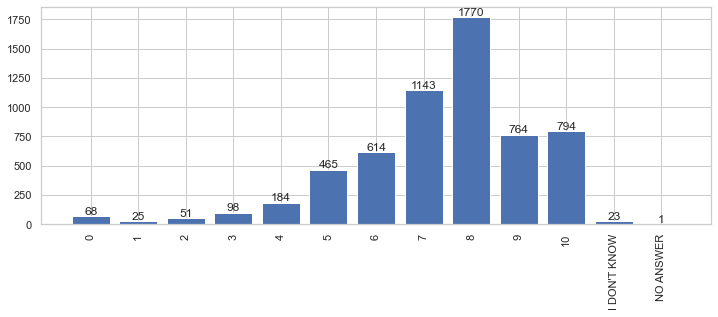

VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING


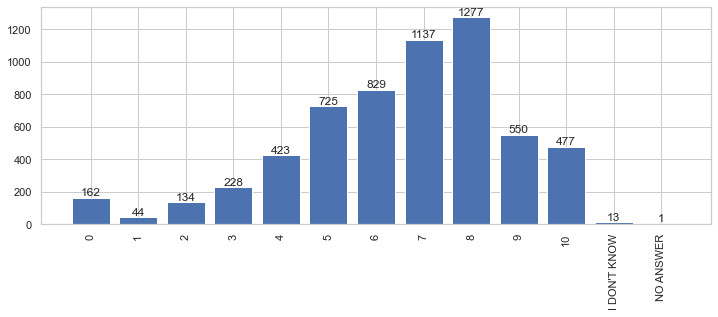

VAL_SOROLL : CITY SERVICES - RATE: NOISE


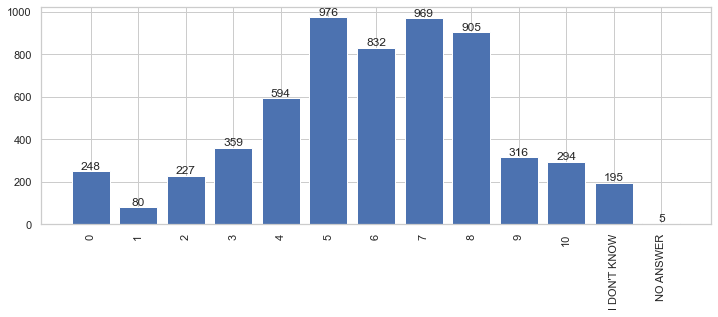

VAL_VERD : CITY SERVICES - RATE: GREEN AREAS


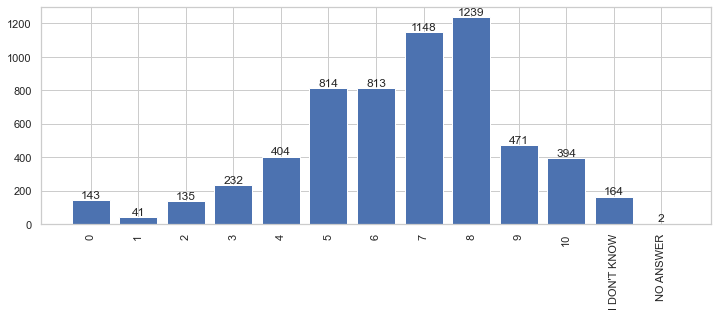

VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGHTING


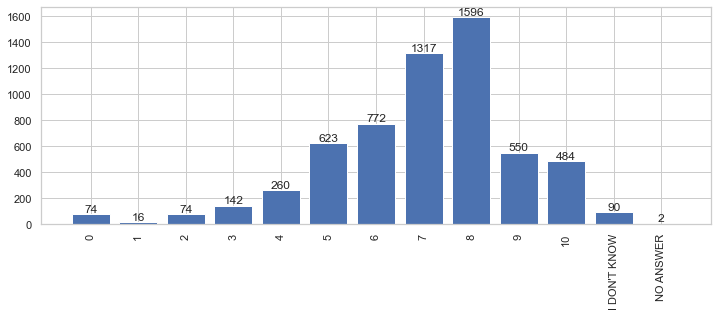

VAL_URBA : CITY SERVICES - RATE: URBANISM


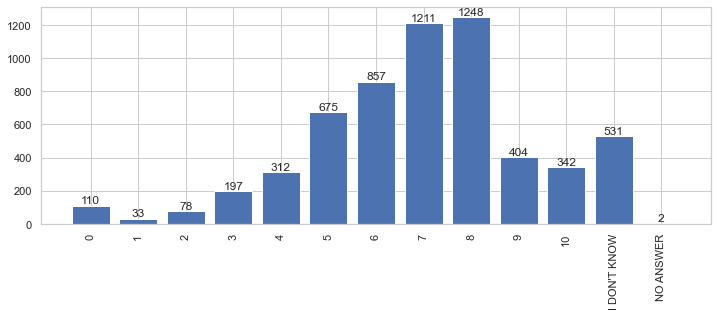

VAL_ASFALT : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION


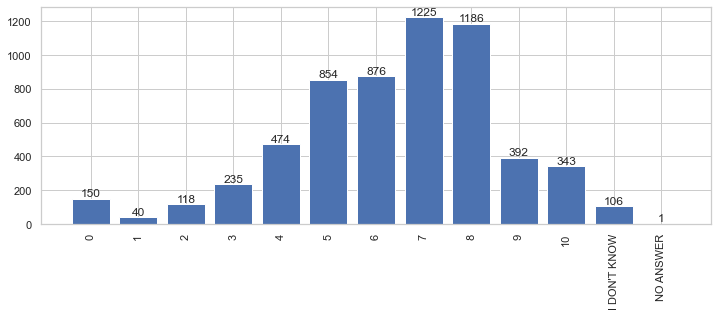

VAL_FACANES : CITY SERVICES - RATE: FACADES AND BUILDING CONSERVATION


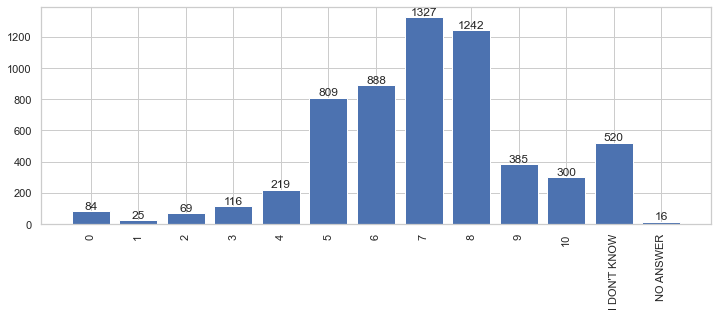

VAL_CIRCUL : CITY SERVICES - RATE: CIRCULATION AND TRAFFIC


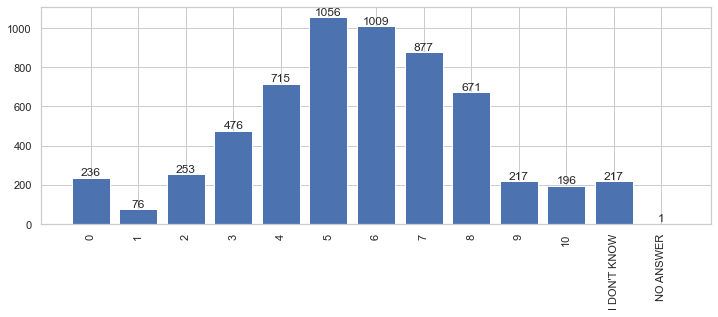

VAL_APARCA : CITY SERVICES - RATE: PARKING


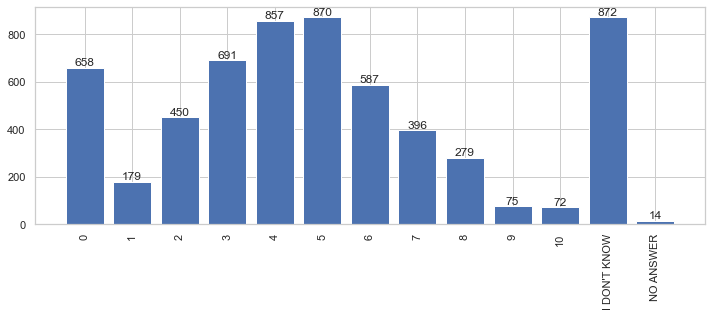

VAL_BUS : CITY SERVICES - RATE: BUS


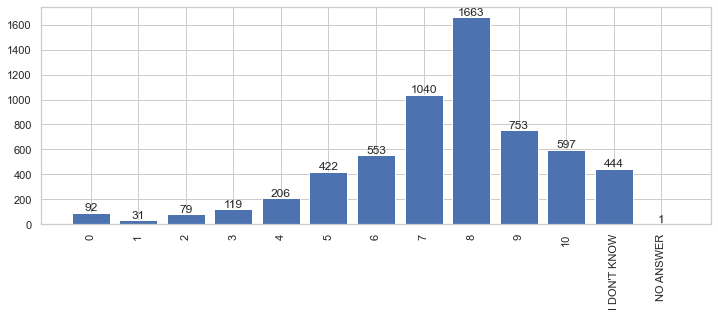

VAL_METRO : CITY SERVICES - RATE: SUBWAY


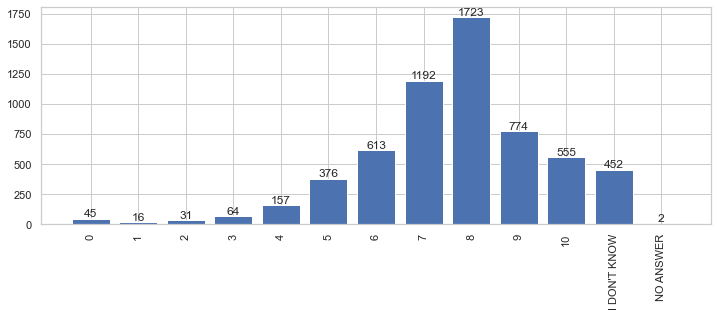

VAL_TRAM : CITY SERVICES - RATE: TRAM


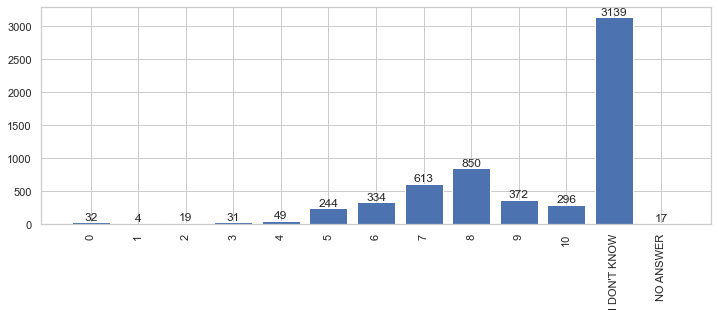

VAL_BICING : CITY SERVICES - RATE: BICING


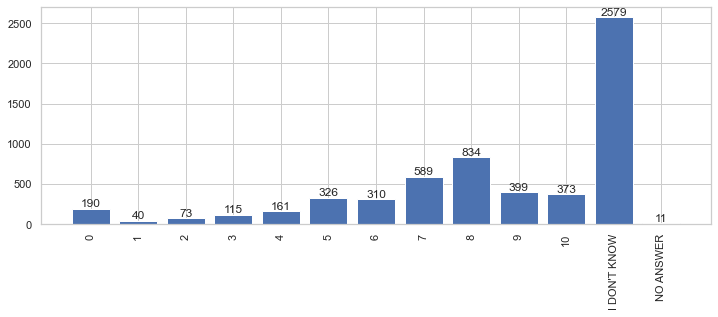

VAL_GUB : CITY SERVICES - RATE: MUNICIPAL POLICE


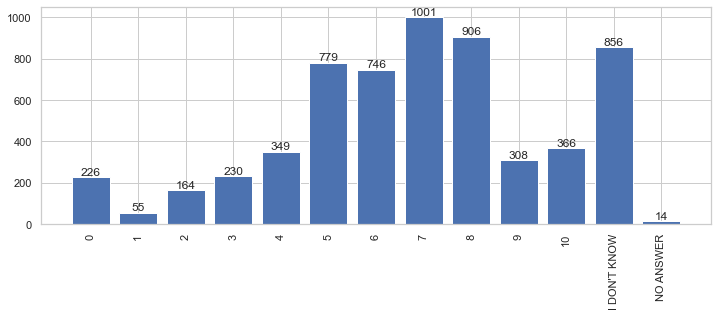

VAL_SPEIS : CITY SERVICES - RATE: FIREFIGHTERS


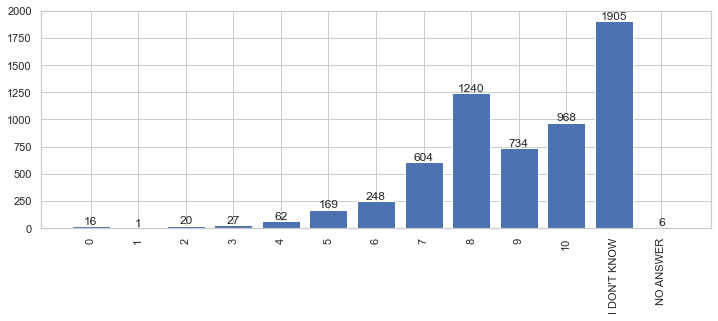

VAL_ESPORT : CITY SERVICES - RATE: SPORTS FACILITIES


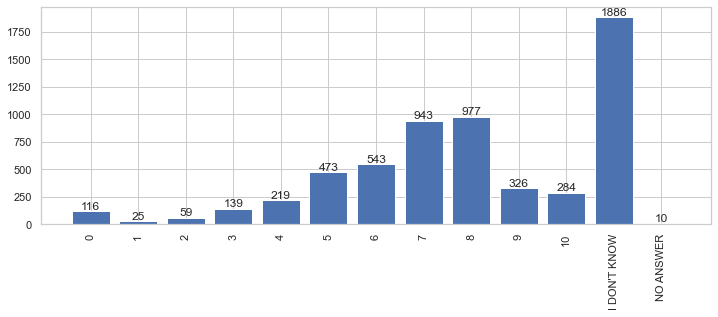

VAL_SIAC : CITY SERVICES - RATE: CITIZEN INFORMATION AND SERVICE SERVICES


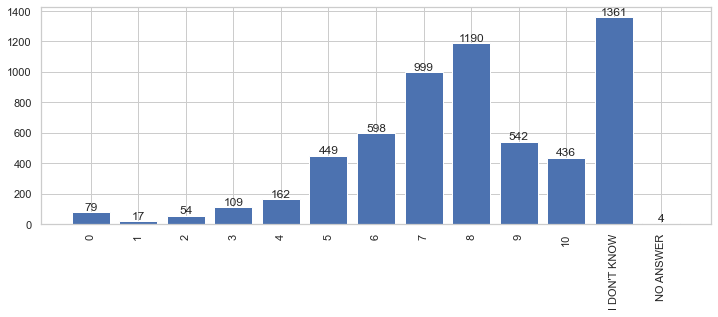

VAL_CSS : CITY SERVICES - RATE: SOCIAL SERVICES CENTERS


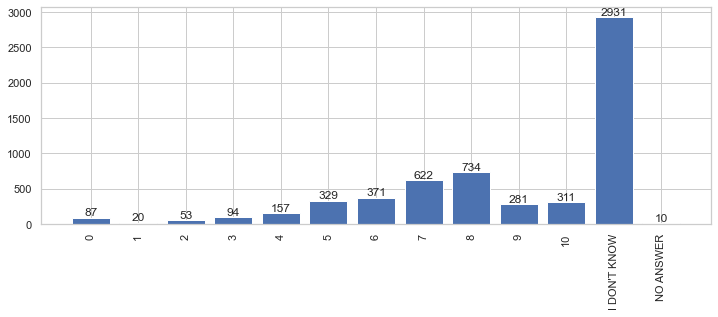

VAL_CULT : CITY SERVICES - RATE: CULTURAL ACTIVITIES


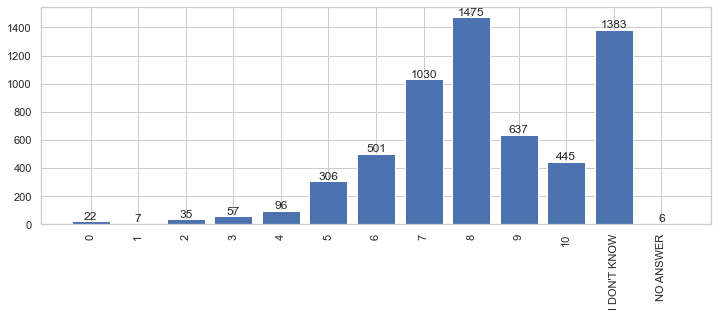

VAL_FESTESPOP : CITY SERVICES - RATE: POPULAR FESTIVALS


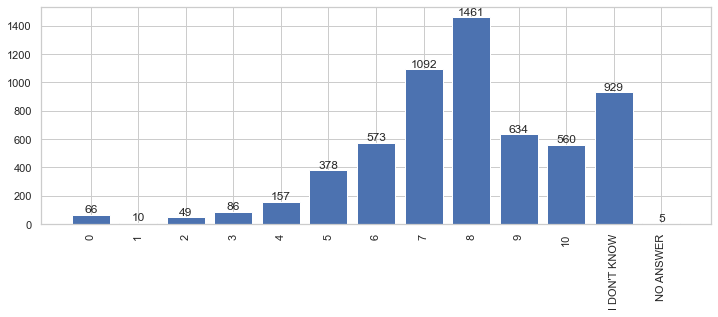

VAL_MERCAT : CITY SERVICES - RATE: MUNICIPAL MARKETS


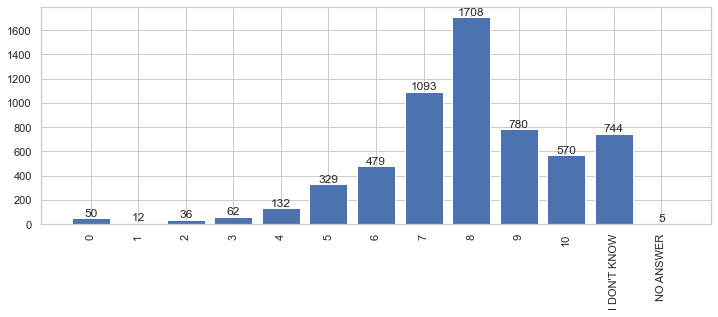

VAL_BIBLIO : CITY SERVICES - RATE: PUBLIC LIBRARIES


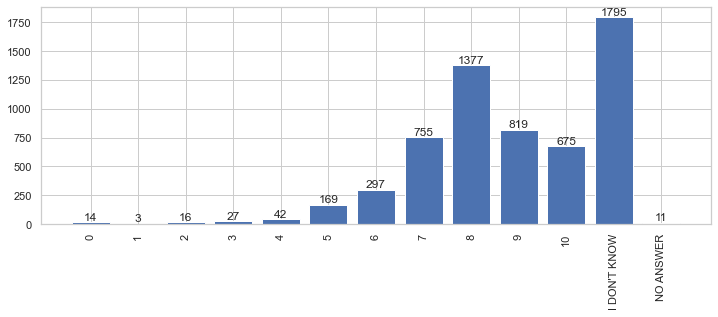

VAL_CC : CITY SERVICES - RATE: CIVIC CENTERS


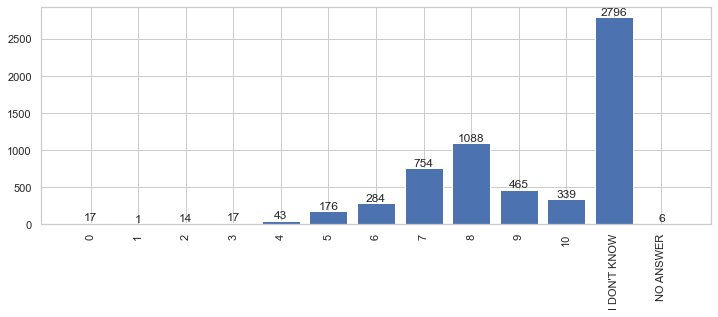

VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


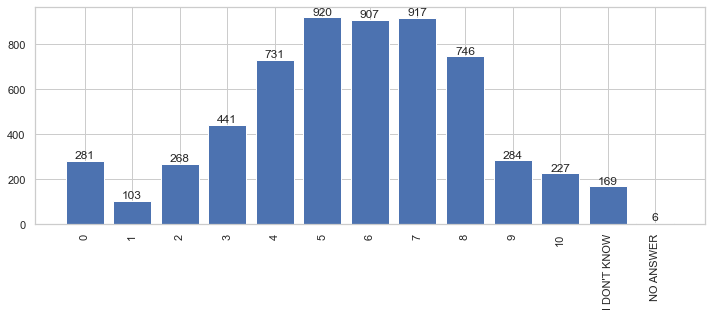

VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


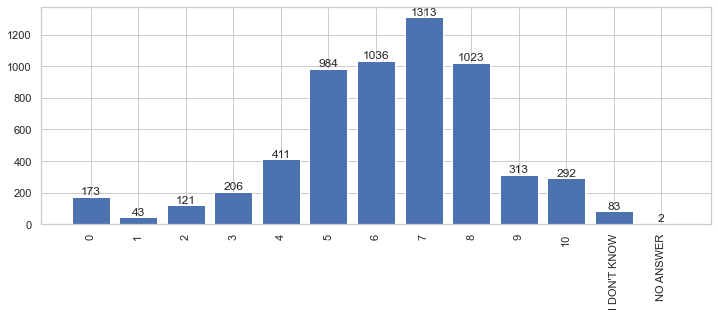

In [135]:
for i in city_services:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [136]:
city_services = ['VAL_ESCOMBRARIES', 'VAL_NETEJA', 'VAL_SOROLL', 'VAL_VERD', 
                 'VAL_ENLLUM', 'VAL_ASFALT', 'VAL_CIRCUL', 'VAL_BUS', 'VAL_METRO', 
                 'VAL_MERCAT', 'VAL_SEGUR']

In [137]:
for i in city_services:
    print(i, ":", questions_dict[i])
    display(size_pctg(i))

VAL_ESCOMBRARIES : CITY SERVICES - RATE: GARBAGE COLLECTION


VAL_ESCOMBRARIES
0                1.13
1                0.42
2                0.85
3                1.63
4                3.07
5                7.75
6               10.23
7               19.05
8               29.50
9               12.73
10              13.23
I DON'T KNOW     0.38
NO ANSWER        0.02
dtype: float64

VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING


VAL_NETEJA
0                2.70
1                0.73
2                2.23
3                3.80
4                7.05
5               12.08
6               13.82
7               18.95
8               21.28
9                9.17
10               7.95
I DON'T KNOW     0.22
NO ANSWER        0.02
dtype: float64

VAL_SOROLL : CITY SERVICES - RATE: NOISE


VAL_SOROLL
0                4.13
1                1.33
2                3.78
3                5.98
4                9.90
5               16.27
6               13.87
7               16.15
8               15.08
9                5.27
10               4.90
I DON'T KNOW     3.25
NO ANSWER        0.08
dtype: float64

VAL_VERD : CITY SERVICES - RATE: GREEN AREAS


VAL_VERD
0                2.38
1                0.68
2                2.25
3                3.87
4                6.73
5               13.57
6               13.55
7               19.13
8               20.65
9                7.85
10               6.57
I DON'T KNOW     2.73
NO ANSWER        0.03
dtype: float64

VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGHTING


VAL_ENLLUM
0                1.23
1                0.27
2                1.23
3                2.37
4                4.33
5               10.38
6               12.87
7               21.95
8               26.60
9                9.17
10               8.07
I DON'T KNOW     1.50
NO ANSWER        0.03
dtype: float64

VAL_ASFALT : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION


VAL_ASFALT
0                2.50
1                0.67
2                1.97
3                3.92
4                7.90
5               14.23
6               14.60
7               20.42
8               19.77
9                6.53
10               5.72
I DON'T KNOW     1.77
NO ANSWER        0.02
dtype: float64

VAL_CIRCUL : CITY SERVICES - RATE: CIRCULATION AND TRAFFIC


VAL_CIRCUL
0                3.93
1                1.27
2                4.22
3                7.93
4               11.92
5               17.60
6               16.82
7               14.62
8               11.18
9                3.62
10               3.27
I DON'T KNOW     3.62
NO ANSWER        0.02
dtype: float64

VAL_BUS : CITY SERVICES - RATE: BUS


VAL_BUS
0                1.53
1                0.52
2                1.32
3                1.98
4                3.43
5                7.03
6                9.22
7               17.33
8               27.72
9               12.55
10               9.95
I DON'T KNOW     7.40
NO ANSWER        0.02
dtype: float64

VAL_METRO : CITY SERVICES - RATE: SUBWAY


VAL_METRO
0                0.75
1                0.27
2                0.52
3                1.07
4                2.62
5                6.27
6               10.22
7               19.87
8               28.72
9               12.90
10               9.25
I DON'T KNOW     7.53
NO ANSWER        0.03
dtype: float64

VAL_MERCAT : CITY SERVICES - RATE: MUNICIPAL MARKETS


VAL_MERCAT
0                0.83
1                0.20
2                0.60
3                1.03
4                2.20
5                5.48
6                7.98
7               18.22
8               28.47
9               13.00
10               9.50
I DON'T KNOW    12.40
NO ANSWER        0.08
dtype: float64

VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


VAL_SEGUR
0                4.68
1                1.72
2                4.47
3                7.35
4               12.18
5               15.33
6               15.12
7               15.28
8               12.43
9                4.73
10               3.78
I DON'T KNOW     2.82
NO ANSWER        0.10
dtype: float64

In [138]:
for i in city_services:
    print(i, ":", questions_dict[i])
    display(ctab(i))

VAL_ESCOMBRARIES : CITY SERVICES - RATE: GARBAGE COLLECTION


Would_live_in_another_neighborhood,0.0,1.0
VAL_ESCOMBRARIES,,
0,35,8
1,14,4
2,24,11
3,53,20
4,93,29
5,269,70
6,324,119
7,677,194
8,1094,322


VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING


Would_live_in_another_neighborhood,0.0,1.0
VAL_NETEJA,,
0,79,23
1,25,9
2,78,26
3,124,37
4,228,73
5,425,116
6,463,138
7,688,214
8,798,230


VAL_SOROLL : CITY SERVICES - RATE: NOISE


Would_live_in_another_neighborhood,0.0,1.0
VAL_SOROLL,,
0,106,39
1,38,18
2,121,33
3,183,68
4,322,120
5,600,144
6,497,151
7,577,194
8,594,142


VAL_VERD : CITY SERVICES - RATE: GREEN AREAS


Would_live_in_another_neighborhood,0.0,1.0
VAL_VERD,,
0,63,24
1,21,8
2,76,16
3,129,31
4,215,72
5,456,146
6,477,136
7,706,192
8,759,232


VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGHTING


Would_live_in_another_neighborhood,0.0,1.0
VAL_ENLLUM,,
0,37,6
1,6,6
2,34,14
3,80,25
4,158,38
5,356,102
6,416,154
7,782,228
8,1016,260


VAL_ASFALT : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION


Would_live_in_another_neighborhood,0.0,1.0
VAL_ASFALT,,
0,75,24
1,23,5
2,59,21
3,129,30
4,270,59
5,494,155
6,505,158
7,767,210
8,725,222


VAL_CIRCUL : CITY SERVICES - RATE: CIRCULATION AND TRAFFIC


Would_live_in_another_neighborhood,0.0,1.0
VAL_CIRCUL,,
0,117,24
1,36,13
2,131,28
3,262,77
4,409,128
5,608,182
6,614,178
7,556,178
8,427,128


VAL_BUS : CITY SERVICES - RATE: BUS


Would_live_in_another_neighborhood,0.0,1.0
VAL_BUS,,
0,50,9
1,17,5
2,42,15
3,68,22
4,123,31
5,232,78
6,311,88
7,618,192
8,996,291


VAL_METRO : CITY SERVICES - RATE: SUBWAY


Would_live_in_another_neighborhood,0.0,1.0
VAL_METRO,,
0,15,12
1,7,4
2,16,6
3,31,14
4,72,34
5,186,70
6,337,121
7,698,192
8,1065,309


VAL_MERCAT : CITY SERVICES - RATE: MUNICIPAL MARKETS


Would_live_in_another_neighborhood,0.0,1.0
VAL_MERCAT,,
0,23,4
1,6,3
2,17,10
3,41,9
4,66,25
5,189,46
6,267,85
7,663,193
8,994,297


VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR,,
0,137,31
1,48,22
2,138,55
3,255,70
4,421,129
5,580,143
6,534,179
7,554,155
8,474,137


In [139]:
data_prep = {0: 0,
             1: 0,
             2: 0,
             3: 0,
             4: 0,
             5: 0,
             6: 0, 
             7: 1,
             8: 1,
             9: 1, 
             10: 1,  
             "I DON'T KNOW": 0, 
             'NO ANSWER': np.nan}
for x in city_services:
    data[questions_dict[x][22:]] = [data_prep[i] for i in data[x]]

In [140]:
data_prep = {0: 0,
             1: 0,
             2: 0,
             3: 0,
             4: 0,
             5: 0,
             6: 0, 
             7: 1,
             8: 1,
             9: 1, 
             10: 1,  
             "I DON'T KNOW": 0, 
             'NO ANSWER': np.nan}
data['CITY MANAGEMENT'] = [data_prep[i] for i in data['VAL_GESTMUNI']]

## 1.5.3 Feature engineering

Creating comparable variables - if respondends rate the city higher than the neighbourhood: 
'BCN_if_has_improved' & 'Barri_if_has_improved', 'BCN_if_will_improve' & 'Barri_if_will_improve', 'BCN_satisfaction_of_living' & 'Barri_satisfaction_of_living', 'BCN_city_management' & 'Barri_city_management', 'BCN_transport' & 'Barri_transport'.

In [141]:
data['BCN_evolution'].unique()

array(['IT HAS WORSENED', 'IT HAS IMPROVED', 'IT IS THE SAME', nan],
      dtype=object)

In [142]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_evolution'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution'] == "IT HAS WORSENED":
        new_column.append(1)
    elif data.iloc[j]['BCN_evolution'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution'] == "IT IS THE SAME":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_evolution'] = new_column

In [143]:
data['BCN_future'].unique()

array(['IT WILL WORSEN', 'IT WILL IMPROVE', 'IT WILL STAY THE SAME', nan],
      dtype=object)

In [144]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_future'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future'] == "IT WILL WORSEN":
        new_column.append(1)
    elif data.iloc[j]['BCN_future'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future'] == "IT WILL STAY THE SAME":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_future'] = new_column

In [145]:
data['BCN_satisfaction'].unique()

array(['FAIRLY SATISFIED', 'SATISFIED', 'NOT SATISFIED'], dtype=object)

In [146]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_satisfaction'] == 'SATISFIED' and data.iloc[j]['Barri_satisfaction'] == "NOT SATISFIED":
        new_column.append(1)
    elif data.iloc[j]['BCN_satisfaction'] == 'SATISFIED' and data.iloc[j]['Barri_satisfaction'] == "FAIRLY SATISFIED":
        new_column.append(1)
    elif data.iloc[j]['BCN_satisfaction'] == 'FAIRLY SATISFIED' and data.iloc[j]['Barri_satisfaction'] == "NOT SATISFIED":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_satisfaction'] = new_column

In [147]:
data['BCN_transport'].unique()

array(['GOOD', 'BAD', 'NEITHER BAD, NOR GOOD', nan], dtype=object)

In [148]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_transport'] == 'GOOD' and data.iloc[j]['Barri_transport'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'GOOD' and data.iloc[j]['Barri_transport'] == "NEITHER GOOD, NOR BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'NEITHER BAD, NOR GOOD' and data.iloc[j]['Barri_transport'] == "BAD":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_transport'] = new_column

In [149]:
data['BCN_management'].unique()

array(['BAD', 'GOOD', 'NEITHER BAD, NOR GOOD', nan], dtype=object)

In [150]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_management'] == 'GOOD' and data.iloc[j]['Barri_management'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_management'] == 'GOOD' and data.iloc[j]['Barri_management'] == "NEITHER GOOD, NOR BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_management'] == 'NEITHER BAD, NOR GOOD' and data.iloc[j]['Barri_management'] == "BAD":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_management'] = new_column

In [151]:
data['BCN_security'].unique()

array(['NEITHER BAD, NOR GOOD', 'GOOD', 'BAD', nan], dtype=object)

In [152]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_security'] == 'GOOD' and data.iloc[j]['Barri_security'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_security'] == 'GOOD' and data.iloc[j]['Barri_security'] == "NEITHER GOOD, NOR BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_security'] == 'NEITHER BAD, NOR GOOD' and data.iloc[j]['Barri_security'] == "BAD":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_security'] = new_column

# 1.6 Final dataset

In [153]:
data.head()

,ANY,NOM_DISTRICTE,SEXE,EDAT1899_1A6,NACIO_ACT_UE,SITLABORAL,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,FUTUR_BCN,...,SUBWAY,MUNICIPAL MARKETS,CITIZEN SECURITY IN THE CITY AS A WHOLE,CITY MANAGEMENT,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_security
129813,2019,SANTS - MONTJUÏC,MAN,FROM 25 TO 34 YEARS,SPANISH,STUDENT,MORE THAN 2 YEARS AND UP TO 5 YEARS,MORE THAN 2 YEARS AND UP TO 5 YEARS,IT HAS WORSENED,IT WILL WORSEN,...,1.0,1.0,0.0,0.0,0,0,0,0,0,0
129814,2019,SANTS - MONTJUÏC,MAN,FROM 35 TO 44 YEARS,REMAINING COUNTRIES,UNEMPLOYED / LOOKING FOR WORK,MORE THAN 10 YEARS,MORE THAN 5 YEARS AND UP TO 10 YEARS,IT HAS WORSENED,IT WILL IMPROVE,...,1.0,0.0,1.0,1.0,0,0,0,0,0,0
129815,2019,SANTS - MONTJUÏC,MAN,FROM 35 TO 44 YEARS,SPANISH,WORK FOR OTHERS,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 5 YEARS AND UP TO 10 YEARS,IT HAS IMPROVED,IT WILL IMPROVE,...,1.0,1.0,1.0,1.0,0,0,0,0,0,0
129816,2019,SANTS - MONTJUÏC,MAN,65 YEARS AND OVER,SPANISH,RETIREMENT / PENSIONER / WORK DISABILITY,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT'S THE SAME,IT WILL STAY THE SAME,...,1.0,1.0,0.0,1.0,0,0,0,0,0,0
129817,2019,SANTS - MONTJUÏC,MAN,FROM 35 TO 44 YEARS,SPANISH,SELF-EMPLOYED,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 5 YEARS AND UP TO 10 YEARS,IT HAS WORSENED,IT WILL IMPROVE,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0


In [154]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'SITLABORAL',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'PROB_BCN_N1',
 'PROB_PERS_N1',
 'VAL_GESTMUNI',
 'DEM_BCN_MUNI_N1',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'TRANSP_MOU',
 'VAL_TRANSP_1A5',
 'VAL_TRANSP_BARRI_1A5',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_0A10',
 'PROB_BARRI_N1',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI',
 'DEM_BARRI_N1',
 'US_ASSOCIA_BARRI',
 'HAB_COTXE_PART',
 'HAB_TREBDOM',
 'HAB_REGIM_1A5',
 'HAB_M2_1A14',
 'LLAR_INGRESSOS_1A10',
 'PROB_LLAR_ECON_1A6',
 'CLASSESOC_ENT',
 'SENTP

### Wishing to move

In [155]:
survey_transformed = data[['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'Support_with_housework',
 'Owner',
 'House_size',
 'No_of_people_in_the_house',
 'Financial_situation',
 'Disability',
 'Living_with_disabled_person',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'Age_group',
 'Residential_satisfaction',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION AND TRAFFIC',
 'BUS',
 'SUBWAY',
 'MUNICIPAL MARKETS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITY MANAGEMENT',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security']]

In [156]:
for x in survey_transformed.columns.tolist():
    display(size_pctg(x))

Would_live_in_another_neighborhood
0.0    77.34
1.0    22.66
dtype: float64

District
CIUTAT VELLA             10.25
EIXAMPLE                 15.38
GRÀCIA                    7.70
HORTA - GUINARDÓ         10.25
LES CORTS                 7.23
NOU BARRIS               10.25
SANT ANDREU               8.17
SANT MARTÍ               12.82
SANTS - MONTJUÏC         10.25
SARRIÀ - SANT GERVASI     7.70
dtype: float64

Woman
0    46.8
1    53.2
dtype: float64

Car
0.0    43.8
1.0    56.2
dtype: float64

Support_with_housework
0.0    76.57
1.0    23.43
dtype: float64

Owner
0.0    46.07
1.0    53.93
dtype: float64

House_size
101-150 M2      10.47
51-100 M2       69.69
< 50 M2          9.28
> 150 M2         2.37
I DON'T KNOW     8.20
dtype: float64

No_of_people_in_the_house
ONE              17.47
THREE OR MORE    46.00
TWO              36.53
dtype: float64

Financial_situation
BAD     43.49
GOOD    56.51
dtype: float64

Disability
0.0    90.68
1.0     9.32
dtype: float64

Living_with_disabled_person
0    81.67
1    18.33
dtype: float64

Time_living_in_barri
I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    14.73
LESS THAN 10 YEARS                         39.73
MORE THAN 10 YEARS                         45.53
dtype: float64

Barri_evolution
IT HAS IMPROVED    42.46
IT HAS WORSENED    25.60
IT IS THE SAME     31.94
dtype: float64

BCN_evolution
IT HAS IMPROVED    32.52
IT HAS WORSENED    45.23
IT IS THE SAME     22.26
dtype: float64

Barri_future
IT WILL IMPROVE          63.63
IT WILL STAY THE SAME    19.20
IT WILL WORSEN           17.17
dtype: float64

BCN_future
IT WILL IMPROVE          62.52
IT WILL STAY THE SAME    16.12
IT WILL WORSEN           21.36
dtype: float64

Barri_satisfaction
FAIRLY SATISFIED    12.68
NOT SATISFIED        1.90
SATISFIED           85.42
dtype: float64

BCN_satisfaction
FAIRLY SATISFIED    16.67
NOT SATISFIED        2.20
SATISFIED           81.13
dtype: float64

Barri_security
BAD                      16.23
GOOD                     46.64
NEITHER BAD, NOR GOOD    37.13
dtype: float64

BCN_security
BAD                      18.23
GOOD                     36.27
NEITHER BAD, NOR GOOD    45.50
dtype: float64

Barri_management
BAD                       7.72
GOOD                     52.31
NEITHER BAD, NOR GOOD    39.97
dtype: float64

BCN_management
BAD                       9.05
GOOD                     49.03
NEITHER BAD, NOR GOOD    41.91
dtype: float64

Barri_comparison
NEITHER THE BEST, NOR THE WORST    32.68
ONE OF THE BEST                    60.18
ONE OF THE WORST                    7.14
dtype: float64

Barri_association
0.0    85.94
1.0    14.06
dtype: float64

Barri_transport
BAD                      14.47
GOOD                     79.41
NEITHER BAD, NOR GOOD     6.12
dtype: float64

BCN_transport
BAD                       8.22
GOOD                     86.06
NEITHER BAD, NOR GOOD     5.72
dtype: float64

Barri_problem_with_security
0    80.77
1    19.23
dtype: float64

Barri_problem_with_streets_cleaning
0    91.75
1     8.25
dtype: float64

Barri_problem_with_mobility
0    95.65
1     4.35
dtype: float64

Age_group
65 YEARS AND OVER      24.70
FROM 18 TO 24 YEARS     7.92
FROM 25 TO 34 YEARS    17.28
FROM 35 TO 44 YEARS    19.13
FROM 45 TO 54 YEARS    16.92
FROM 55 TO 64 YEARS    14.05
dtype: float64

Residential_satisfaction
0    18.87
1    81.13
dtype: float64

GARBAGE COLLECTION
0.0    25.47
1.0    74.53
dtype: float64

STREETS CLEANING
0.0    42.64
1.0    57.36
dtype: float64

NOISE
0.0    58.57
1.0    41.43
dtype: float64

GREEN AREAS
0.0    45.78
1.0    54.22
dtype: float64

PUBLIC LIGHTING
0.0    34.19
1.0    65.81
dtype: float64

ASPHALT AND STREET CONSERVATION
0.0    47.56
1.0    52.44
dtype: float64

CIRCULATION AND TRAFFIC
0.0    67.31
1.0    32.69
dtype: float64

BUS
0.0    32.44
1.0    67.56
dtype: float64

SUBWAY
0.0    29.24
1.0    70.76
dtype: float64

MUNICIPAL MARKETS
0.0    30.76
1.0    69.24
dtype: float64

CITIZEN SECURITY IN THE CITY AS A WHOLE
0.0    63.73
1.0    36.27
dtype: float64

CITY MANAGEMENT
0.0    50.97
1.0    49.03
dtype: float64

BCN_over_barri_evolution
0    88.95
1    11.05
dtype: float64

BCN_over_barri_future
0    86.52
1    13.48
dtype: float64

BCN_over_barri_satisfaction
0    92.27
1     7.73
dtype: float64

BCN_over_barri_transport
0    90.28
1     9.72
dtype: float64

BCN_over_barri_management
0    96.13
1     3.87
dtype: float64

BCN_over_barri_security
0    95.42
1     4.58
dtype: float64

In [157]:
survey_transformed.reset_index(drop=True, inplace=True)

In [158]:
survey_transformed.head()

,Would_live_in_another_neighborhood,District,Woman,Car,Support_with_housework,Owner,House_size,No_of_people_in_the_house,Financial_situation,Disability,...,SUBWAY,MUNICIPAL MARKETS,CITIZEN SECURITY IN THE CITY AS A WHOLE,CITY MANAGEMENT,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_security
0,0.0,SANTS - MONTJUÏC,0,0.0,0.0,0.0,51-100 M2,THREE OR MORE,BAD,0.0,...,1.0,1.0,0.0,0.0,0,0,0,0,0,0
1,NaN,SANTS - MONTJUÏC,0,0.0,0.0,0.0,51-100 M2,THREE OR MORE,BAD,NaN,...,1.0,0.0,1.0,1.0,0,0,0,0,0,0
2,NaN,SANTS - MONTJUÏC,0,0.0,0.0,0.0,51-100 M2,ONE,BAD,0.0,...,1.0,1.0,1.0,1.0,0,0,0,0,0,0
3,0.0,SANTS - MONTJUÏC,0,1.0,0.0,1.0,51-100 M2,TWO,GOOD,0.0,...,1.0,1.0,0.0,1.0,0,0,0,0,0,0
4,0.0,SANTS - MONTJUÏC,0,1.0,0.0,0.0,101-150 M2,TWO,GOOD,0.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0


In [159]:
survey_transformed.shape

(6000, 49)

In [160]:
survey_transformed.groupby(['Would_live_in_another_neighborhood']).size()

Would_live_in_another_neighborhood
0.0    3574
1.0    1047
dtype: int64

In [161]:
survey_transformed.groupby(['District']).size()

District
CIUTAT VELLA             615
EIXAMPLE                 923
GRÀCIA                   462
HORTA - GUINARDÓ         615
LES CORTS                434
NOU BARRIS               615
SANT ANDREU              490
SANT MARTÍ               769
SANTS - MONTJUÏC         615
SARRIÀ - SANT GERVASI    462
dtype: int64

In [162]:
survey_transformed.groupby(['Woman']).size()

Woman
0    2808
1    3192
dtype: int64

In [163]:
survey_transformed.dropna(inplace=True)

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
survey_transformed.shape

(4388, 49)

In [165]:
survey_transformed.groupby(['Would_live_in_another_neighborhood']).size()

Would_live_in_another_neighborhood
0.0    3394
1.0     994
dtype: int64

In [166]:
survey_transformed.groupby(['District']).size()

District
CIUTAT VELLA             461
EIXAMPLE                 703
GRÀCIA                   333
HORTA - GUINARDÓ         447
LES CORTS                321
NOU BARRIS               419
SANT ANDREU              344
SANT MARTÍ               568
SANTS - MONTJUÏC         435
SARRIÀ - SANT GERVASI    357
dtype: int64

In [167]:
survey_transformed.groupby(['Woman']).size()

Woman
0    2022
1    2366
dtype: int64

In [168]:
survey_transformed.to_pickle("survey_transformed_2019_agegroups.pkl")